# Plots 

Plots Notebook for reproducibility. The notebook is divided into 3 sections:
- Generated Datasets Visualization
- Generated Sparse Datasets Visualization
- Real Dataset Visualization

In [2]:
#Global file paths
GENERATED_PATH = 'generatedData_bench_25iter.csv'
GENERATED_SPARSE_PATH = 'sparse_results/results/Generated.t4.bench'
GENERATED_SPARSE_2_PATH = 'sparse_results/results/Generated.t5.bench'
GENERATED_PYTHONIC_PATH = 'data_python_agg.csv'
REAL_BENCHMARKS = "Article-GPUDist/data/real_datasets.csv"
IMG_PATH = 'img/'

In [3]:
# #Global file paths FOR PRODUCTION
# GENERATED_PATH = '../data/generatedData_bench_100iter.csv'
# GENERATED_SPARSE_PATH = '../data/Generated.t4.bench'
# GENERATED_SPARSE_2_PATH = '../data/Generated.t5.bench'
# GENERATED_PYTHONIC_PATH = '../data/data_python.csv'

## Generated Dataset Visualization

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [6]:
#df = pd.read_csv('matrix_real1.bench',sep=" ")
df = pd.read_csv(GENERATED_PATH)

cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
df

Column1                                           DataFile      method  \
0          0  ../DistanceBenchmarking/Generated/100_cells_10...        amap   
1          1  ../DistanceBenchmarking/Generated/100_cells_10...        amap   
2          2  ../DistanceBenchmarking/Generated/100_cells_10...        amap   
3          3  ../DistanceBenchmarking/Generated/100_cells_10...         GPU   
4          4  ../DistanceBenchmarking/Generated/100_cells_10...         GPU   
..       ...                                                ...         ...   
101      101  ../../DistanceBenchmarking/Generated/100_cells...  factoextra   
102      102  ../../DistanceBenchmarking/Generated/10000_cel...  factoextra   
103      103  ../../DistanceBenchmarking/Generated/1000_cell...  factoextra   
104      104  ../../DistanceBenchmarking/Generated/100_cells...  factoextra   
105      105  ../../DistanceBenchmarking/Generated/1000_cell...  factoextra   

        metric          mean            sd         val_1         val_2  \
0    euclidean  2.158145e+06  8.162644e+04  2.085170e+06  2.132396e+06   
1      pearson  2.671846e+06  1.222369e+05  2.632823e+06  2.381265e+06   
2      kendall  1.112856e+08  7.693236e+06  1.149370e+08  1.163666e+08   
3    euclidean  5.225445e+05  1.141719e+05  1.341176e+06  2.334318e+05   
4      pearson  6.541106e+05  1.741764e+05  2.170022e+06  3.595390e+05   
..         ...           ...           ...           ...           ...   
101    kendall  5.884167e+02  4.218297e+02  1.075500e+03  3.432500e+02   
102    kendall  2.490488e+06  9.821950e+04  2.588788e+06  2.373257e+06   
103    kendall  5.678555e+04  3.087803e+04  2.720350e+04  8.360950e+04   
104    kendall  4.654500e+02  2.919011e+02  9.875000e+02  3.450000e+02   
105    kendall  5.381540e+04  2.204173e+04  4.219200e+04  7.577950e+04   

            val_3         val_4  ...        val_18        val_19  \
0    2.296944e+06  2.088194e+06  ...  2.291402e+06  2.186449e+06   
1    2.944571e+06  2.667706e+06  ...  3.018894e+06  2.626513e+06   
2    1.173964e+08  1.188970e+08  ...  1.173427e+08  1.183861e+08   
3    2.941690e+05  5.634625e+05  ...  5.388702e+05  5.325350e+05   
4    3.204490e+05  7.300850e+05  ...  6.630560e+05  6.533955e+05   
..            ...           ...  ...           ...           ...   
101  3.465000e+02  3.497500e+02  ...  3.562500e+02  3.595000e+02   
102  2.532082e+06  2.397931e+06  ...  2.442286e+06  2.439072e+06   
103  2.103450e+04  8.602950e+04  ...  1.769573e+05  1.849688e+05   
104  3.320000e+02  3.345000e+02  ...  3.241400e+02  3.415000e+02   
105  6.300975e+04  2.112975e+04  ...  4.616278e+04  4.565260e+04   

           val_20        val_21        val_22        val_23        val_24  \
0    2.281374e+06  2.173573e+06  2.253811e+06  2.158747e+06  2.160293e+06   
1    2.619396e+06  2.724468e+06  2.618952e+06  2.638954e+06  2.497488e+06   
2    1.152997e+08  1.191992e+08  1.183475e+08  1.192266e+08  1.102887e+08   
3    5.451672e+05  5.340085e+05  5.291382e+05  5.324480e+05  5.339380e+05   
4    6.584370e+05  6.588228e+05  6.481395e+05  6.592282e+05  6.600572e+05   
..            ...           ...           ...           ...           ...   
101  3.432500e+02  3.465000e+02  3.497500e+02  3.530000e+02  3.562500e+02   
102  2.435858e+06  2.432645e+06  2.429431e+06  2.426218e+06  2.423004e+06   
103  1.929802e+05  2.009916e+05  2.090031e+05  2.170145e+05  2.250260e+05   
104  3.440000e+02  3.393756e+02  3.386074e+02  3.378392e+02  3.370710e+02   
105  4.514243e+04  4.463225e+04  4.412207e+04  4.361190e+04  4.310172e+04   

           val_25       minTime       maxTime  
0    2.109011e+06  2.049968e+06  2.296944e+06  
1    2.731348e+06  2.361366e+06  3.018894e+06  
2    1.204646e+08  1.102887e+08  1.195488e+08  
3    5.319500e+05  1.484395e+05  1.341176e+06  
4    6.584100e+05  2.720205e+05  2.170022e+06  
..            ...           ...           ...  
101  3.595000e+02  3.432500e+02  1.075500e+03  
102  2.419791e+06  2.373257e+06  2.588788

In [7]:
# df_python_python = pd.read_csv(GENERATED_PYTHONIC_PATH)
# df_python_python

df_python = pd.read_csv(GENERATED_PYTHONIC_PATH)
df_python['mean'] = df_python['mean']*1000000 * 24
df_python['minTime'] =df_python[cols].min(axis=1) *1000000 *24
df_python['maxTime']=df_python[cols].max(axis=1)*1000000*24
df = df.append(df_python,ignore_index = True)


# weight=[]
# unID=[]
# w1=[]
# w2=[]
# # This is for Matrix.bench file Real Dataset
# # for i in df_python['DataFile']:
# #     k= i.split('/')[-1].rsplit('_',1)[0]
# #     i = i.split("_")
# #     i=i[-1].split(".")[0]
# #     weight.append(int(i))
# #     unID.append(k)

# #This is for Generated dataset
# for i in df_python['DataFile']:
#     k=i.split('/')[-1].split('_')
#     i= i.split("_")
#     w1.append(int(k[0]))
#     w2.append(int(k[2]))

# df_python['wX'] = w1
# df_python['wY'] = w2
# df_python['logWX'] = np.log10(df_python['wX'])
# df_python['logWY'] = np.log10(df_python['wY'])
# # df_python['weight'] = weight
# # #df_python['minTime'] = df_python[['val_1':'val_25']].min(axis=1)
# # df_python['logW'] = np.log10(df_python['weight'])
# df_python['logMeanTime'] = np.log10(df_python['mean'])
# df_python['logMinTime']=np.log10(df_python['minTime'])
# df_python['logMaxTime']=np.log10(df_python['maxTime'])
# df_python['|W|'] = df_python['wX']*df_python['wY']
# df_python['Method'] = df_python['metric']+'_'+df_python['method']
# #df_python['IDtag'] = unID
# #print(df_python[df_python['DataFile']])
# for i in df_python['DataFile']:
#     k=i.split('/')[-1].split('_')
#     i= i.split("_")
#     print(i,k)
# ma=[]
# for i in df_python['DataFile']:
#     m=i.split('/')[-1].split('.')
#     ma.append(m[0])
# c=0
# # for j in df['method']:
# #     ma[c]= ma[c]+'_'+j
# #     c+=1
# # c=0
# # for k in df['metric']:
# #     ma[c]= ma[c]+'_'+k
# #     c+=1

# #df['W']=ma

# df_python

In [8]:
weight=[]
unID=[]
w1=[]
w2=[]
w3=[]
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))
    w3.append(k[0]+'_'+k[2])
    

df['wX'] = w1
df['wY'] = w2
df['ID'] = w3
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
#df['IDtag'] = unID
#print(df[df['DataFile']])
df

Column1                                           DataFile    method  \
0          0  ../DistanceBenchmarking/Generated/100_cells_10...      amap   
1          1  ../DistanceBenchmarking/Generated/100_cells_10...      amap   
2          2  ../DistanceBenchmarking/Generated/100_cells_10...      amap   
3          3  ../DistanceBenchmarking/Generated/100_cells_10...       GPU   
4          4  ../DistanceBenchmarking/Generated/100_cells_10...       GPU   
..       ...                                                ...       ...   
152       46  ../../DistanceBenchmarking/Generated/10000_cel...    pandas   
153       47  ../../DistanceBenchmarking/Generated/10000_cel...    pandas   
154       48  ../../DistanceBenchmarking/Generated/10000_cel...  pythonic   
155       49  ../../DistanceBenchmarking/Generated/10000_cel...  pythonic   
156       50  ../../DistanceBenchmarking/Generated/10000_cel...  pythonic   

        metric          mean            sd         val_1         val_2  \
0    euclidean  2.158145e+06  8.162644e+04  2.085170e+06  2.132396e+06   
1      pearson  2.671846e+06  1.222369e+05  2.632823e+06  2.381265e+06   
2      kendall  1.112856e+08  7.693236e+06  1.149370e+08  1.163666e+08   
3    euclidean  5.225445e+05  1.141719e+05  1.341176e+06  2.334318e+05   
4      pearson  6.541106e+05  1.741764e+05  2.170022e+06  3.595390e+05   
..         ...           ...           ...           ...           ...   
152    pearson  5.588343e+08  1.196841e+01  2.096014e+01  2.083718e+01   
153  euclidean  9.751447e+09  1.190330e+01  4.635915e+02  4.007578e+02   
154  euclidean  1.168051e+10  1.100212e+01  4.778856e+02  4.743786e+02   
155    pearson  1.095543e+10  6.024167e+00  4.572028e+02  4.667656e+02   
156    kendall  1.130743e+10  1.417987e+01  4.911681e+02  5.021102e+02   

            val_3         val_4  ...     wX      wY          ID  logWX  logWY  \
0    2.296944e+06  2.088194e+06  ...    100  100000  100_100000    2.0    5.0   
1    2.944571e+06  2.667706e+06  ...    100  100000  100_100000    2.0    5.0   
2    1.173964e+08  1.188970e+08  ...    100  100000  100_100000    2.0    5.0   
3    2.941690e+05  5.634625e+05  ...    100  100000  100_100000    2.0    5.0   
4    3.204490e+05  7.300850e+05  ...    100  100000  100_100000    2.0    5.0   
..            ...           ...  ...    ...     ...         ...    ...    ...   
152  2.085056e+01  2.073748e+01  ...  10000     100   10000_100    4.0    2.0   
153  4.047602e+02  4.064229e+02  ...  10000     100   10000_100    4.0    2.0   
154  4.834001e+02  4.840493e+02  ...  10000     100   10000_100    4.0    2.0   
155  4.714878e+02  4.741481e+02  ...  10000     100   10000_100    4.0    2.0   
156  4.904388e+02  4.803964e+02  ...  10000     100   10000_100    4.0    2.0   

     logMeanTime  logMinTime  logMaxTime       |W|              Method  
0       6.334081    6.311747    6.361150  10000000      euclidean_amap  
1       6.426811    6.373163    6.479848  10000000        pearson_amap  
2       8.046439    8.042531    8.077545  10000000        kendall_amap  
3       5.718123    5.171549    6.127486  10000000       euclidean_GPU  
4       5.815651    5.434602    6.336464  10000000         pearson_GPU  
..           ...         ...         ...       ...                 ...  
152     8.747283    8.696967    9.293568   1000000      pearson_pandas  
153     9.989069    9.982739   10.046347   1000000    euclidean_pandas  
154    10.067462   10.056336   10.086813   1000000  euclidean_pythonic  
155    10.039629   10.033818   10.056125   1000000    pearson_pythonic  
156    10.053364   10.029518   10.081010   1000000    kendall_pythonic  

[157 rows x 43 columns]

In [9]:
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    print(i,k)
ma=[]
for i in df['DataFile']:
    m=i.split('/')[-1].split('.')
    ma.append(m[0])
c=0
# for j in df['method']:
#     ma[c]= ma[c]+'_'+j
#     c+=1
# c=0
# for k in df['metric']:
#     ma[c]= ma[c]+'_'+k
#     c+=1

#df['W']=ma
df

['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '10000', 'genes.csv'] ['100', 'cells', '10000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '10000', 'genes.csv'] ['100', 'cells', '10000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '10000', 'genes.csv'] ['100', 'cells', '1

Column1                                           DataFile    method  \
0          0  ../DistanceBenchmarking/Generated/100_cells_10...      amap   
1          1  ../DistanceBenchmarking/Generated/100_cells_10...      amap   
2          2  ../DistanceBenchmarking/Generated/100_cells_10...      amap   
3          3  ../DistanceBenchmarking/Generated/100_cells_10...       GPU   
4          4  ../DistanceBenchmarking/Generated/100_cells_10...       GPU   
..       ...                                                ...       ...   
152       46  ../../DistanceBenchmarking/Generated/10000_cel...    pandas   
153       47  ../../DistanceBenchmarking/Generated/10000_cel...    pandas   
154       48  ../../DistanceBenchmarking/Generated/10000_cel...  pythonic   
155       49  ../../DistanceBenchmarking/Generated/10000_cel...  pythonic   
156       50  ../../DistanceBenchmarking/Generated/10000_cel...  pythonic   

        metric          mean            sd         val_1         val_2  \
0    euclidean  2.158145e+06  8.162644e+04  2.085170e+06  2.132396e+06   
1      pearson  2.671846e+06  1.222369e+05  2.632823e+06  2.381265e+06   
2      kendall  1.112856e+08  7.693236e+06  1.149370e+08  1.163666e+08   
3    euclidean  5.225445e+05  1.141719e+05  1.341176e+06  2.334318e+05   
4      pearson  6.541106e+05  1.741764e+05  2.170022e+06  3.595390e+05   
..         ...           ...           ...           ...           ...   
152    pearson  5.588343e+08  1.196841e+01  2.096014e+01  2.083718e+01   
153  euclidean  9.751447e+09  1.190330e+01  4.635915e+02  4.007578e+02   
154  euclidean  1.168051e+10  1.100212e+01  4.778856e+02  4.743786e+02   
155    pearson  1.095543e+10  6.024167e+00  4.572028e+02  4.667656e+02   
156    kendall  1.130743e+10  1.417987e+01  4.911681e+02  5.021102e+02   

            val_3         val_4  ...     wX      wY          ID  logWX  logWY  \
0    2.296944e+06  2.088194e+06  ...    100  100000  100_100000    2.0    5.0   
1    2.944571e+06  2.667706e+06  ...    100  100000  100_100000    2.0    5.0   
2    1.173964e+08  1.188970e+08  ...    100  100000  100_100000    2.0    5.0   
3    2.941690e+05  5.634625e+05  ...    100  100000  100_100000    2.0    5.0   
4    3.204490e+05  7.300850e+05  ...    100  100000  100_100000    2.0    5.0   
..            ...           ...  ...    ...     ...         ...    ...    ...   
152  2.085056e+01  2.073748e+01  ...  10000     100   10000_100    4.0    2.0   
153  4.047602e+02  4.064229e+02  ...  10000     100   10000_100    4.0    2.0   
154  4.834001e+02  4.840493e+02  ...  10000     100   10000_100    4.0    2.0   
155  4.714878e+02  4.741481e+02  ...  10000     100   10000_100    4.0    2.0   
156  4.904388e+02  4.803964e+02  ...  10000     100   10000_100    4.0    2.0   

     logMeanTime  logMinTime  logMaxTime       |W|              Method  
0       6.334081    6.311747    6.361150  10000000      euclidean_amap  
1       6.426811    6.373163    6.479848  10000000        pearson_amap  
2       8.046439    8.042531    8.077545  10000000        kendall_amap  
3       5.718123    5.171549    6.127486  10000000       euclidean_GPU  
4       5.815651    5.434602    6.336464  10000000         pearson_GPU  
..           ...         ...         ...       ...                 ...  
152     8.747283    8.696967    9.293568   1000000      pearson_pandas  
153     9.989069    9.982739   10.046347   1000000    euclidean_pandas  
154    10.067462   10.056336   10.086813   1000000  euclidean_pythonic  
155    10.039629   10.033818   10.056125   1000000    pearson_pythonic  
156    10.053364   10.029518   10.081010   1000000    kendall_pythonic  

[157 rows x 43 columns]

In [10]:
#Remove anomalies
df.drop(df[df['logWX']==5.0].index,inplace=True)

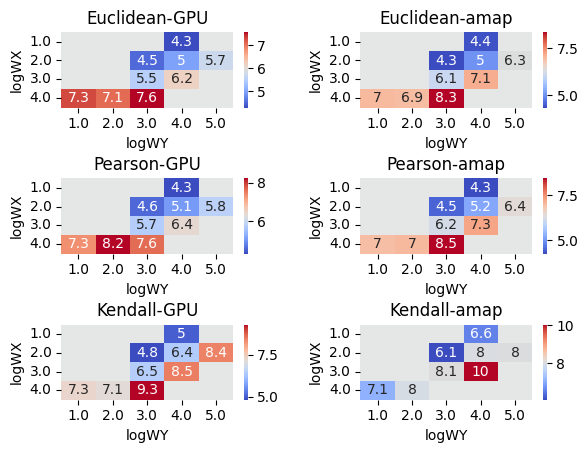

In [11]:
matrix1 = df[df['metric']=="euclidean"]
matrix1 = matrix1[matrix1["method"]=="GPU"].pivot('logWX','logWY','logMeanTime')

matrix2 = df[df['metric']=="euclidean"]
matrix2 = matrix2[matrix2["method"]=="amap"].pivot('logWX','logWY','logMeanTime')
#matrix2.fillna(-1,inplace=True)

matrix3 = df[df['metric']=="pearson"]
matrix3 = matrix3[matrix3["method"]=="GPU"].pivot('logWX','logWY','logMeanTime')
#matrix3.fillna(-1,inplace=True)

matrix4 = df[df['metric']=="pearson"]
matrix4 = matrix4[matrix4["method"]=="amap"].pivot('logWX','logWY','logMeanTime')
#matrix4.fillna(-1,inplace=True)

matrix5 = df[df['metric']=="kendall"]
matrix5 = matrix5[matrix5["method"]=="GPU"].pivot('logWX','logWY','logMeanTime')
#matrix5.fillna(-1,inplace=True)

matrix6 = df[df['metric']=="kendall"]
matrix6 = matrix6[matrix6["method"]=="amap"].pivot('logWX','logWY','logMeanTime')
#matrix6.fillna(-1,inplace=True)

matrix7 = df[df['metric']=="kendall"]
matrix7 = matrix7[matrix7["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')
#matrix7.fillna(-1,inplace=True)

matrix8 = df[df['metric']=="euclidean"]
matrix8 = matrix8[matrix8["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')
#matrix8.fillna(-1,inplace=True)

matrix9 = df[df['metric']=="euclidean"]
matrix9 = matrix9[matrix9["method"]=="factoextra"].pivot('logWX','logWY','logMeanTime')
#matrix9.fillna(-1,inplace=True)

matrix10 = df[df['metric']=="pearson"]
matrix10 = matrix10[matrix10["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')
#matrix10.fillna(-1,inplace=True)

matrix11 = df[df['metric']=="pearson"]
matrix11 = matrix11[matrix11["method"]=="factoextra"].pivot('logWX','logWY','logMeanTime')
#matrix11.fillna(-1,inplace=True)

matrix12 = df[df['metric']=="kendall"]
matrix12 = matrix12[matrix12["method"]=="factoextra"].pivot('logWX','logWY','logMeanTime')

matrix13 = df[df['metric']=="euclidean"]
matrix13 = matrix13[matrix13["method"]=="pythonic"].pivot('logWX','logWY','logMeanTime')
# #matrix9.fillna(-1,inplace=True)

matrix14 = df[df['metric']=="pearson"]
matrix14 = matrix14[matrix14["method"]=="pythonic"].pivot('logWX','logWY','logMeanTime')
#matrix10.fillna(-1,inplace=True)

matrix15 = df[df['metric']=="kendall"]
matrix15 = matrix15[matrix15["method"]=="pythonic"].pivot('logWX','logWY','logMeanTime')
#matrix11.fillna(-1,inplace=True)

matrix16 = df[df['metric']=="euclidean"]
matrix16 = matrix16[matrix16["method"]=="pandas"].pivot('logWX','logWY','logMeanTime')
#matrix9.fillna(-1,inplace=True)

matrix17 = df[df['metric']=="pearson"]
matrix17 = matrix17[matrix17["method"]=="pandas"].pivot('logWX','logWY','logMeanTime')
#matrix10.fillna(-1,inplace=True)

matrix18 = df[df['metric']=="kendall"]
matrix18 = matrix18[matrix18["method"]=="pandas"].pivot('logWX','logWY','logMeanTime')
#matrix11.fillna(-1,inplace=True)



stdmtx = np.full((4, 5), 11)
 #stdmtx.isnull().astype(int)
#matrix2
#matrix1
fig, axs = plt.subplots(nrows=3,ncols=2)
plt.tight_layout(pad=3.0)

axs[0,0].set_facecolor('#E5E7E7')
axs[0,1].set_facecolor('#E5E7E7')
axs[1,0].set_facecolor('#E5E7E7')
axs[1,1].set_facecolor('#E5E7E7')
axs[2,0].set_facecolor('#E5E7E7')
axs[2,1].set_facecolor('#E5E7E7')
sns.heatmap(matrix1, cmap="coolwarm", annot=True,ax=axs[0][0]).set_title("Euclidean-GPU")
sns.heatmap(matrix2, cmap="coolwarm", annot=True,ax=axs[0][1]).set_title("Euclidean-amap")
sns.heatmap(matrix3, cmap="coolwarm", annot=True,ax=axs[1][0]).set_title("Pearson-GPU")
sns.heatmap(matrix4, cmap="coolwarm", annot=True,ax=axs[1][1]).set_title("Pearson-amap")
sns.heatmap(matrix5, cmap="coolwarm", annot=True,ax=axs[2][0]).set_title("Kendall-GPU")
sns.heatmap(matrix6, cmap="coolwarm", annot=True,ax=axs[2][1]).set_title("Kendall-amap")
plt.savefig(f'{IMG_PATH}colmat_bench_generated_t1.png',dpi=200)

In [12]:
# matrix13 = df[df['metric']=="euclidean"]
# matrix13 = matrix13[matrix13["method"]=="pythonic"]
# matrix13

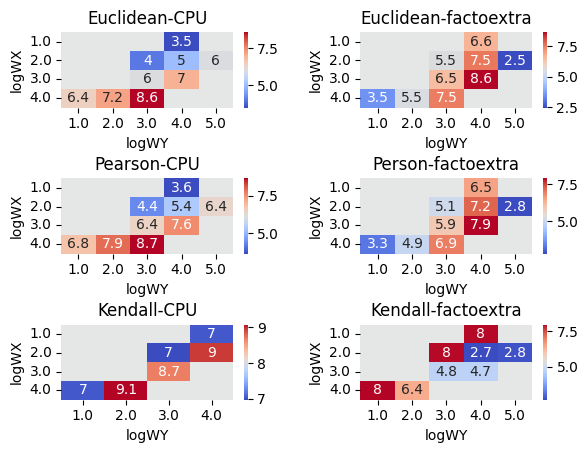

In [13]:
fig, axs = plt.subplots(nrows=3,ncols=2)
plt.tight_layout(pad=3.0)
axs[0,0].set_facecolor('#E5E7E7')
axs[0,1].set_facecolor('#E5E7E7')
axs[1,0].set_facecolor('#E5E7E7')
axs[1,1].set_facecolor('#E5E7E7')
axs[2,0].set_facecolor('#E5E7E7')
axs[2,1].set_facecolor('#E5E7E7')
sns.heatmap(matrix8, cmap="coolwarm", annot=True,ax=axs[0][0]).set_title("Euclidean-CPU")
sns.heatmap(matrix9, cmap="coolwarm", annot=True,ax=axs[0][1]).set_title("Euclidean-factoextra")
sns.heatmap(matrix10, cmap="coolwarm", annot=True,ax=axs[1][0]).set_title("Pearson-CPU")
sns.heatmap(matrix11, cmap="coolwarm", annot=True,ax=axs[1][1]).set_title("Person-factoextra")
sns.heatmap(matrix7, cmap="coolwarm", annot=True,ax=axs[2][0]).set_title("Kendall-CPU")
sns.heatmap(matrix12, cmap="coolwarm", annot=True,ax=axs[2][1]).set_title("Kendall-factoextra")

plt.savefig(f'{IMG_PATH}colmat_bench_generated_t2.png',dpi=200)

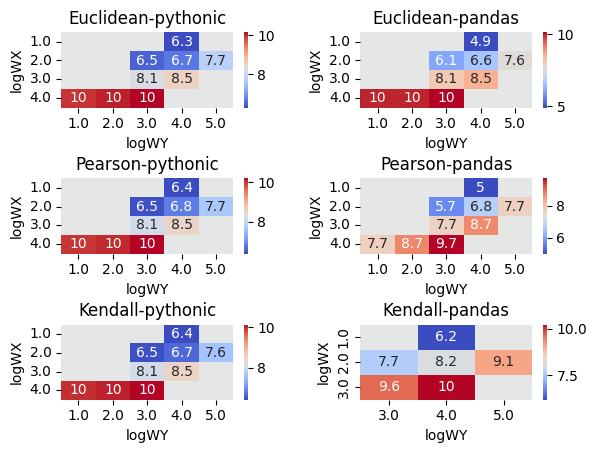

In [14]:


fig, axs = plt.subplots(nrows=3,ncols=2)
plt.tight_layout(pad=3.0)
axs[0,0].set_facecolor('#E5E7E7')
axs[0,1].set_facecolor('#E5E7E7')
axs[1,0].set_facecolor('#E5E7E7')
axs[1,1].set_facecolor('#E5E7E7')
axs[2,0].set_facecolor('#E5E7E7')
axs[2,1].set_facecolor('#E5E7E7')
sns.heatmap(matrix13, cmap="coolwarm", annot=True,ax=axs[0][0]).set_title("Euclidean-pythonic")
sns.heatmap(matrix16, cmap="coolwarm", annot=True,ax=axs[0][1]).set_title("Euclidean-pandas")
sns.heatmap(matrix14, cmap="coolwarm", annot=True,ax=axs[1][0]).set_title("Pearson-pythonic")
sns.heatmap(matrix17, cmap="coolwarm", annot=True,ax=axs[1][1]).set_title("Pearson-pandas")
sns.heatmap(matrix15, cmap="coolwarm", annot=True,ax=axs[2][0]).set_title("Kendall-pythonic")
sns.heatmap(matrix18, cmap="coolwarm", annot=True,ax=axs[2][1]).set_title("Kendall-pandas")

plt.savefig(f'{IMG_PATH}colmat_bench_generated_t3.png',dpi=200)

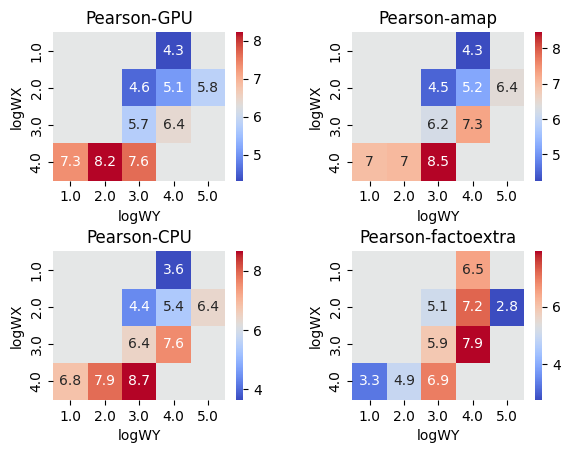

In [15]:
fig, axs = plt.subplots(nrows=2,ncols=2)
plt.tight_layout(pad=3.0)
#sns.set(rc={'axes.facecolor':'#33FFA2'})

axs[0,0].set_facecolor('#E5E7E7')
axs[0,1].set_facecolor('#E5E7E7')
axs[1,0].set_facecolor('#E5E7E7')
axs[1,1].set_facecolor('#E5E7E7')

sns.heatmap(matrix3, cmap="coolwarm", annot=True,ax=axs[0][0]).set_title("Pearson-GPU")
sns.heatmap(matrix4, cmap="coolwarm", annot=True,ax=axs[0][1]).set_title("Pearson-amap")
sns.heatmap(matrix10, cmap="coolwarm", annot=True,ax=axs[1][0]).set_title("Pearson-CPU")
sns.heatmap(matrix11, cmap="coolwarm", annot=True,ax=axs[1][1]).set_title("Pearson-factoextra")

plt.savefig('colmat_bench_generated.png',dpi=200)

In [16]:
#matrix1.fillna('x')

In [17]:
matrix13

logWY       1.0        2.0        3.0       4.0       5.0
logWX                                                    
1.0         NaN        NaN        NaN  6.256641       NaN
2.0         NaN        NaN   6.459197  6.653818  7.741425
3.0         NaN        NaN   8.136347  8.489523       NaN
4.0    9.981548  10.067462  10.166197       NaN       NaN

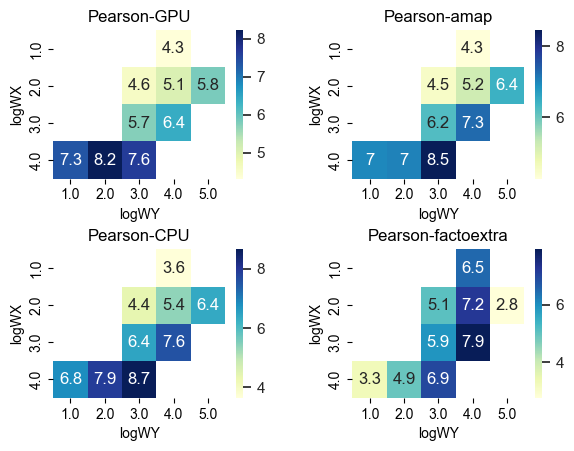

In [18]:
fig, axs = plt.subplots(nrows=2,ncols=2)
plt.tight_layout(pad=3.0)
sns.set(rc={'axes.facecolor':'#ffffff'})
sns.heatmap(matrix3, cmap="YlGnBu", annot=True,ax=axs[0][0]).set_title("Pearson-GPU")
sns.heatmap(matrix4, cmap="YlGnBu", annot=True,ax=axs[0][1]).set_title("Pearson-amap")
sns.heatmap(matrix10, cmap="YlGnBu", annot=True,ax=axs[1][0]).set_title("Pearson-CPU")
sns.heatmap(matrix11, cmap="YlGnBu", annot=True,ax=axs[1][1]).set_title("Pearson-factoextra")
# sns.heatmap(matrix8, cmap="YlGnBu", annot=True,ax=axs[0][0]).set_title("Euclidean-CPU")
# sns.heatmap(matrix9, cmap="YlGnBu", annot=True,ax=axs[0][1]).set_title("Euclidean-factoextra")
# sns.heatmap(matrix10, cmap="YlGnBu", annot=True,ax=axs[1][0]).set_title("Pearson-CPU")
# sns.heatmap(matrix11, cmap="YlGnBu", annot=True,ax=axs[1][1]).set_title("Pearson-factoextra")
# sns.heatmap(matrix7, cmap="YlGnBu", annot=True,ax=axs[2][0]).set_title("Kendall-CPU")
# sns.heatmap(matrix12, cmap="YlGnBu", annot=True,ax=axs[2][1]).set_title("Kendall-factoextra")
plt.savefig('colmat_bench_generated.png',dpi=200)

In [19]:
matrix1.fillna(-1,inplace=True)
matrix2.fillna(-1,inplace=True)
matrix3.fillna(-1,inplace=True)
matrix4.fillna(-1,inplace=True)
matrix5.fillna(-1,inplace=True)
matrix6.fillna(-1,inplace=True)
matrix7.fillna(-1,inplace=True)
matrix8.fillna(-1,inplace=True)
matrix9.fillna(-1,inplace=True)
matrix10.fillna(-1,inplace=True)
matrix11.fillna(-1,inplace=True)
matrix12.fillna(-1,inplace=True)
matrix1

logWY       1.0       2.0       3.0       4.0       5.0
logWX                                                  
1.0   -1.000000 -1.000000 -1.000000  4.290299 -1.000000
2.0   -1.000000 -1.000000  4.508987  4.977272  5.718123
3.0   -1.000000 -1.000000  5.509660  6.151028 -1.000000
4.0    7.271231  7.079642  7.551375 -1.000000 -1.000000

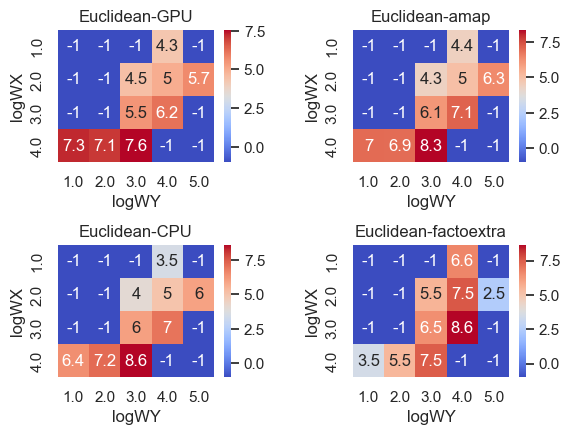

In [20]:
fig, axs = plt.subplots(nrows=2,ncols=2)
plt.tight_layout(pad=3.0)
sns.heatmap(matrix1, cmap="coolwarm", annot=True,ax=axs[0][0]).set_title("Euclidean-GPU")
sns.heatmap(matrix2, cmap="coolwarm", annot=True,ax=axs[0][1]).set_title("Euclidean-amap")
sns.heatmap(matrix8, cmap="coolwarm", annot=True,ax=axs[1][0]).set_title("Euclidean-CPU")
sns.heatmap(matrix9, cmap="coolwarm", annot=True,ax=axs[1][1]).set_title("Euclidean-factoextra")


plt.savefig('colmat_bench_generated.png',dpi=200)

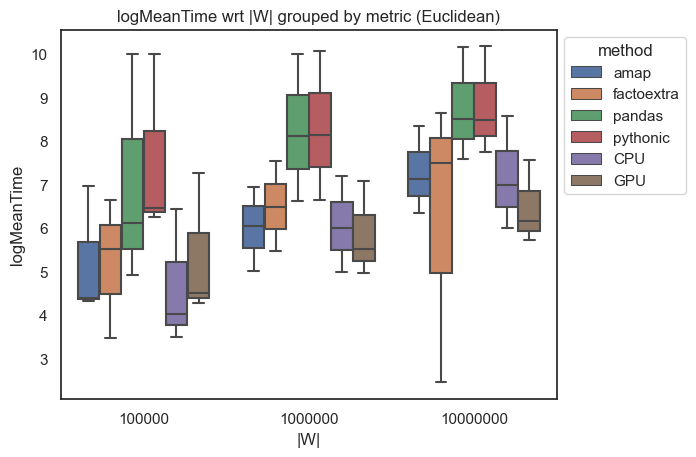

In [21]:
# unF = df.DataFile.unique()
# print(unF)
# df1 = df[df['DataFile']==unF[0]]
# df2 = df[df['DataFile']==unF[1]]
# df3 = df[df['DataFile']==unF[2]]
# df4 = df[df['DataFile']==unF[3]]
# df5 = df[df['DataFile']==unF[4]]
# #df6 = df[df['DataFile']==unF[5]]
# df7 = df[df['DataFile']==unF[6]]
# df8 = df[df['DataFile']==unF[7]]
# df9 = df[df['DataFile']==unF[8]]
# df10 = df[df['DataFile']==unF[9]]

# fig, axes = plt.subplots(nrows=1,ncols=9)
# #for name, ax in zip(names, axes.flatten()):
# for i in axes:
#     i.tick_params(axis='x', rotation=90)
# sns.boxplot(data=df1, x="metric", y="logMeanTime",ax=axes[0])
# sns.boxplot(data=df2, x="metric", y="logMeanTime",ax=axes[1])
# sns.boxplot(data=df3, x="metric", y="logMeanTime",ax=axes[2])
# sns.boxplot(data=df4, x="metric", y="logMeanTime",ax=axes[3])
# sns.boxplot(data=df5, x="metric", y="logMeanTime",ax=axes[4])
# #sns.boxplot(data=df6, x="metric", y="logMeanTime",ax=axes[5])
# sns.boxplot(data=df7, x="metric", y="logMeanTime",ax=axes[5])
# sns.boxplot(data=df8, x="metric", y="logMeanTime",ax=axes[6])
# sns.boxplot(data=df9, x="metric", y="logMeanTime",ax=axes[7])
# sns.boxplot(data=df10, x="metric", y="logMeanTime",ax=axes[8])

euc_data_filtered = df[df['metric'].isin(['euclidean'])]
sns.set(style='white')
hue_order = ['amap', 'factoextra', 'pandas','pythonic','CPU','GPU']
ax = sns.boxplot(data=euc_data_filtered,x='|W|',hue="method",hue_order=hue_order,y='logMeanTime')
new_labels = ['amap', 'factoextra', 'pandas','pythonic','GPUDist-GPU','GPUDist-CPU']
#ax.set_text(l)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.legend(labels = ['amap', 'factoextra', 'pandas','pythonic','GPUDist-CPU','GPUDist-GPU'])
plt.title('logMeanTime wrt |W| grouped by metric (Euclidean)')
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_W.png',dpi=200)

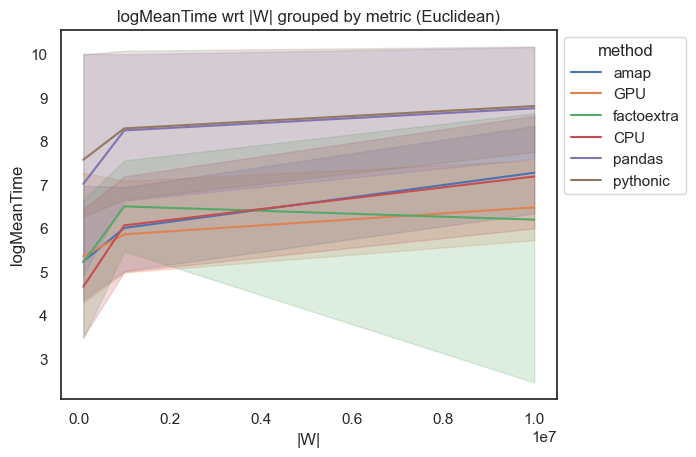

In [22]:
ax = sns.lineplot(data=euc_data_filtered,x='|W|',hue="method",y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logMeanTime wrt |W| grouped by metric (Euclidean)')
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_euc_on_W.png',dpi=200)

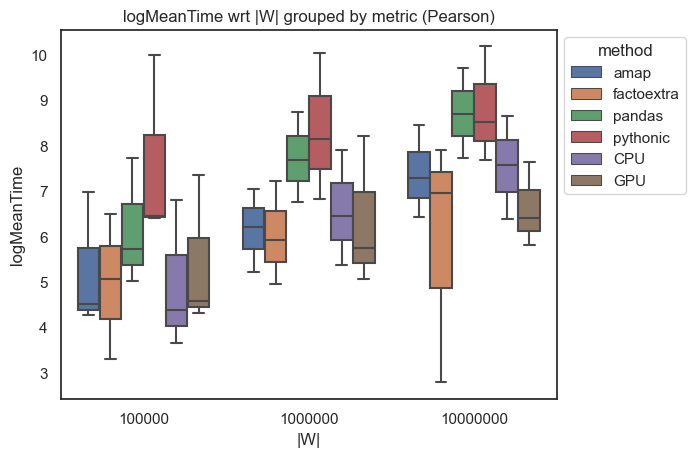

In [23]:
pearson_data_filtered = df[df['metric'].isin(['pearson'])]
ax= sns.boxplot(data=pearson_data_filtered,x='|W|',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logMeanTime wrt |W| grouped by metric (Pearson)')

plt.savefig(f'{IMG_PATH}boxplot_bench_generated_pear_on_W.png',dpi=200)

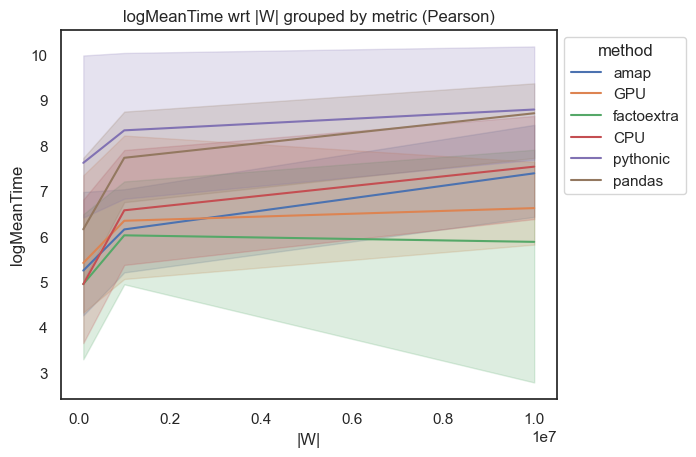

In [24]:
ax= sns.lineplot(data=pearson_data_filtered,x='|W|',hue="method",y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logMeanTime wrt |W| grouped by metric (Pearson)')
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_pear_on_W.png',dpi=200)

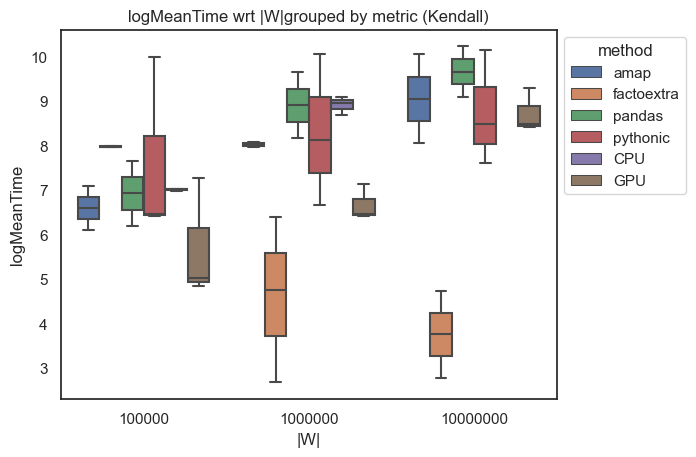

In [25]:
kendall_data_filtered = df[df['metric'].isin(['kendall'])]
ax = sns.boxplot(data=kendall_data_filtered,x='|W|',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logMeanTime wrt |W|grouped by metric (Kendall)')
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_ken_on_W.png',dpi=200)

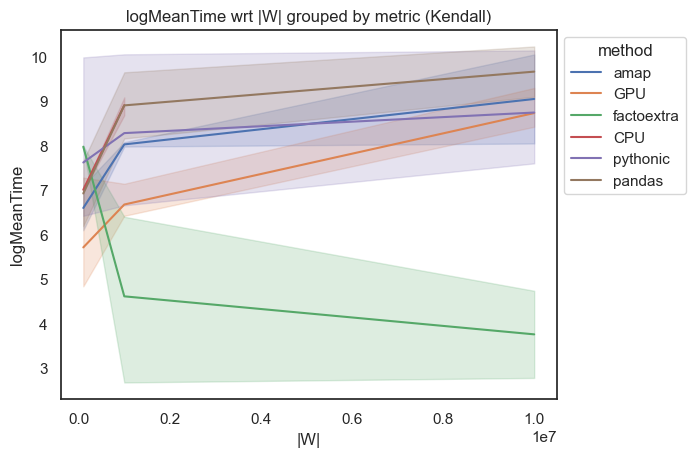

In [26]:
ax = sns.lineplot(data=kendall_data_filtered,x='|W|',hue="method",y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logMeanTime wrt |W| grouped by metric (Kendall)')
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_ken_on_W.png',dpi=200)

In [27]:
# # List of column names for values
# value_columns = ['val_{}'.format(i) for i in range(1, 26)]

# #create a new dataframe with all the values
# new_df = pd.melt(
#     df,
#     id_vars=['DataFile', 'method', 'metric', 'mean', 'sd', 
#              'minTime', 'maxTime', 'wX', 'wY',
#              'logWX', 'logWY', 'logMeanTime', 'logMinTime', 'logMaxTime', '|W|', 'Method'],
#     value_vars=value_columns,
#     value_name='all_values'
# )

# # Sort the DataFrame if needed
# new_df = new_df.sort_values(['DataFile', 'method', 'metric', 'variable'])

# # Drop the 'variable' column
# new_df = new_df.drop('variable', axis=1)

# new_df['logAllIter'] = np.log10(new_df['all_values']*1000000)
# new_df.to_csv('R_acc.csv')
# new_df
new_df = pd.read_csv('R_acc.csv')
df_py = pd.read_csv('python_acc.csv')
new_df = new_df.append(df_py,ignore_index = True)
new_df

Unnamed: 0                                           DataFile    method  \
0             51  ../../DistanceBenchmarking/Generated/10000_cel...       GPU   
1            942  ../../DistanceBenchmarking/Generated/10000_cel...       GPU   
2           1041  ../../DistanceBenchmarking/Generated/10000_cel...       GPU   
3           1140  ../../DistanceBenchmarking/Generated/10000_cel...       GPU   
4           1239  ../../DistanceBenchmarking/Generated/10000_cel...       GPU   
...          ...                                                ...       ...   
3745         222  ../../DistanceBenchmarking/Generated/10_cells_...  pythonic   
3746         273  ../../DistanceBenchmarking/Generated/10_cells_...  pythonic   
3747         324  ../../DistanceBenchmarking/Generated/10_cells_...  pythonic   
3748         375  ../../DistanceBenchmarking/Generated/10_cells_...  pythonic   
3749         426  ../../DistanceBenchmarking/Generated/10_cells_...  pythonic   

         metric          mean             sd       minTime       maxTime  \
0     euclidean  1.201273e+07  904597.407700  1.178999e+07  1.635321e+07   
1     euclidean  1.201273e+07  904597.407700  1.178999e+07  1.635321e+07   
2     euclidean  1.201273e+07  904597.407700  1.178999e+07  1.635321e+07   
3     euclidean  1.201273e+07  904597.407700  1.178999e+07  1.635321e+07   
4     euclidean  1.201273e+07  904597.407700  1.178999e+07  1.635321e+07   
...         ...           ...            ...           ...           ...   
3745    pearson  1.077248e+05       0.006818  1.018100e+05  1.402280e+05   
3746    pearson  1.077248e+05       0.006818  1.018100e+05  1.402280e+05   
3747    pearson  1.077248e+05       0.006818  1.018100e+05  1.402280e+05   
3748    pearson  1.077248e+05       0.006818  1.018100e+05  1.402280e+05   
3749    pearson  1.077248e+05       0.006818  1.018100e+05  1.402280e+05   

         wX     wY  logWX  logWY  logMeanTime  logMinTime  logMaxTime  \
0     10000    100    4.0    2.0     7.079642    7.071513    7.213603   
1     10000    100    4.0    2.0     7.079642    7.071513    7.213603   
2     10000    100    4.0    2.0     7.079642    7.071513    7.213603   
3     10000    100    4.0    2.0     7.079642    7.071513    7.213603   
4     10000    100    4.0    2.0     7.079642    7.071513    7.213603   
...     ...    ...    ...    ...          ...         ...         ...   
3745     10  10000    1.0    4.0     5.032316    5.007790    5.146835   
3746     10  10000    1.0    4.0     5.032316    5.007790    5.146835   
3747     10  10000    1.0    4.0     5.032316    5.007790    5.146835   
3748     10  10000    1.0    4.0     5.032316    5.007790    5.146835   
3749     10  10000    1.0    4.0     5.032316    5.007790    5.146835   

          |W|            Method    all_values  logAllIter  
0     1000000     euclidean_GPU  1.635321e+07    7.213603  
1     1000000     euclidean_GPU  1.178999e+07    7.071513  
2     1000000     euclidean_GPU  1.186585e+07    7.074299  
3     1000000     euclidean_GPU  1.184574e+07    7.073562  
4     1000000     euclidean_GPU  1.179957e+07    7.071866  
...       ...               ...           ...         ...  
3745   100000  pearson_pythonic  1.045434e-01    5.019297  
3746   100000  pearson_pythonic  1.018100e-01    5.007790  
3747   100000  pearson_pythonic  1.050313e-01    5.021319  
3748   100000  pearson_pythonic  1.055129e-01    5.023305  
3749   100000  pearson_pythonic  1.078198e-01    5.032699  

[3750 rows x 19 columns]

In [28]:
df['ID2'] = df['ID']+'_'+df['metric']
# df2['mean_method_GPU'] = df.groupby('DataFile')['mean'].transform(lambda x: x.mean() / x.mean() == 'GPU')
df

Column1                                           DataFile    method  \
0          0  ../DistanceBenchmarking/Generated/100_cells_10...      amap   
1          1  ../DistanceBenchmarking/Generated/100_cells_10...      amap   
2          2  ../DistanceBenchmarking/Generated/100_cells_10...      amap   
3          3  ../DistanceBenchmarking/Generated/100_cells_10...       GPU   
4          4  ../DistanceBenchmarking/Generated/100_cells_10...       GPU   
..       ...                                                ...       ...   
152       46  ../../DistanceBenchmarking/Generated/10000_cel...    pandas   
153       47  ../../DistanceBenchmarking/Generated/10000_cel...    pandas   
154       48  ../../DistanceBenchmarking/Generated/10000_cel...  pythonic   
155       49  ../../DistanceBenchmarking/Generated/10000_cel...  pythonic   
156       50  ../../DistanceBenchmarking/Generated/10000_cel...  pythonic   

        metric          mean            sd         val_1         val_2  \
0    euclidean  2.158145e+06  8.162644e+04  2.085170e+06  2.132396e+06   
1      pearson  2.671846e+06  1.222369e+05  2.632823e+06  2.381265e+06   
2      kendall  1.112856e+08  7.693236e+06  1.149370e+08  1.163666e+08   
3    euclidean  5.225445e+05  1.141719e+05  1.341176e+06  2.334318e+05   
4      pearson  6.541106e+05  1.741764e+05  2.170022e+06  3.595390e+05   
..         ...           ...           ...           ...           ...   
152    pearson  5.588343e+08  1.196841e+01  2.096014e+01  2.083718e+01   
153  euclidean  9.751447e+09  1.190330e+01  4.635915e+02  4.007578e+02   
154  euclidean  1.168051e+10  1.100212e+01  4.778856e+02  4.743786e+02   
155    pearson  1.095543e+10  6.024167e+00  4.572028e+02  4.667656e+02   
156    kendall  1.130743e+10  1.417987e+01  4.911681e+02  5.021102e+02   

            val_3         val_4  ...      wY          ID  logWX  logWY  \
0    2.296944e+06  2.088194e+06  ...  100000  100_100000    2.0    5.0   
1    2.944571e+06  2.667706e+06  ...  100000  100_100000    2.0    5.0   
2    1.173964e+08  1.188970e+08  ...  100000  100_100000    2.0    5.0   
3    2.941690e+05  5.634625e+05  ...  100000  100_100000    2.0    5.0   
4    3.204490e+05  7.300850e+05  ...  100000  100_100000    2.0    5.0   
..            ...           ...  ...     ...         ...    ...    ...   
152  2.085056e+01  2.073748e+01  ...     100   10000_100    4.0    2.0   
153  4.047602e+02  4.064229e+02  ...     100   10000_100    4.0    2.0   
154  4.834001e+02  4.840493e+02  ...     100   10000_100    4.0    2.0   
155  4.714878e+02  4.741481e+02  ...     100   10000_100    4.0    2.0   
156  4.904388e+02  4.803964e+02  ...     100   10000_100    4.0    2.0   

     logMeanTime  logMinTime  logMaxTime       |W|              Method  \
0       6.334081    6.311747    6.361150  10000000      euclidean_amap   
1       6.426811    6.373163    6.479848  10000000        pearson_amap   
2       8.046439    8.042531    8.077545  10000000        kendall_amap   
3       5.718123    5.171549    6.127486  10000000       euclidean_GPU   
4       5.815651    5.434602    6.336464  10000000         pearson_GPU   
..           ...         ...         ...       ...                 ...   
152     8.747283    8.696967    9.293568   1000000      pearson_pandas   
153     9.989069    9.982739   10.046347   1000000    euclidean_pandas   
154    10.067462   10.056336   10.086813   1000000  euclidean_pythonic   
155    10.039629   10.033818   10.056125   1000000    pearson_pythonic   
156    10.053364   10.029518   10.081010   1000000    kendall_pythonic   

                      ID2  
0    100_100000_euclidean  
1      100_100000_pearson  
2      100_100000_kendall  
3    100_100000_euclidean  
4      100_100000_pearson  
..                    ...  
152     10000_100_pearson  
153   10000_100_euclidean  
154   10000_100_euclidean  
155     10000_100_pearson  
156     10000_100_kendall  

[155 rows x 44 columns]

In [29]:
df_grouped = df.groupby(['method'])
acc = df_grouped.get_group(("GPU"))
v1 =  df_grouped.get_group(("CPU"))
v1.head()
v1["Ratio"] = acc['mean']/v1['mean']
print(acc['mean']*v1['mean'])
d3 = pd.DataFrame
for dat in acc.index:
    for ind in df.index:
        if acc["ID2"][dat] == df['ID2'][ind]:
            print(df['DataFile'][ind],df['method'][ind],df['metric'][ind],acc['mean'][dat]/df['mean'][ind])
        
#v1.head()
# df_grouped['Mean(GPU)'] = df_grouped['GPU'].mean()
#df_grouped['Mean(Method)'] = df_grouped['method'].mean()

3    NaN
4    NaN
5    NaN
9    NaN
10   NaN
11   NaN
15   NaN
16   NaN
17   NaN
21   NaN
22   NaN
23   NaN
27   NaN
28   NaN
29   NaN
33   NaN
34   NaN
35   NaN
39   NaN
40   NaN
41   NaN
45   NaN
46   NaN
47   NaN
51   NaN
52   NaN
53   NaN
75   NaN
76   NaN
77   NaN
78   NaN
79   NaN
80   NaN
81   NaN
82   NaN
83   NaN
84   NaN
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
90   NaN
91   NaN
92   NaN
93   NaN
94   NaN
95   NaN
96   NaN
97   NaN
98   NaN
Name: mean, dtype: float64
../DistanceBenchmarking/Generated/100_cells_100000_genes.csv amap euclidean 0.2421267045638929
../DistanceBenchmarking/Generated/100_cells_100000_genes.csv GPU euclidean 1.0
../DistanceBenchmarking/Generated/100_cells_100000_genes.csv CPU euclidean 0.5336909273963193
../../DistanceBenchmarking/Generated/100_cells_100000_genes.csv factoextra euclidean 1829.2105394598352
../../DistanceBenchmarking/Generated/100_cells_100000_genes.csv pandas euclidean 0.01355684130590573
../../DistanceBenchmarking/Generated/100_

d:\ai-ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [30]:
df_acc = pd.read_csv('Acceleration2.csv')
df_acc

DataFile      method     metric  \
0    ../DistanceBenchmarking/Generated/100_cells_10...        amap  euclidean   
1    ../DistanceBenchmarking/Generated/100_cells_10...         GPU  euclidean   
2    ../DistanceBenchmarking/Generated/100_cells_10...         CPU  euclidean   
3    ../../DistanceBenchmarking/Generated/100_cells...  factoextra  euclidean   
4    ../../DistanceBenchmarking/Generated/100_cells...      pandas  euclidean   
..                                                 ...         ...        ...   
149  ../../DistanceBenchmarking/Generated/10000_cel...         GPU    pearson   
150  ../DistanceBenchmarking/Generated/10000_cells_...  factoextra    pearson   
151  ../DistanceBenchmarking/Generated/10000_cells_...         CPU    pearson   
152  ../../DistanceBenchmarking/Generated/10000_cel...      pandas    pearson   
153  ../../DistanceBenchmarking/Generated/10000_cel...    pythonic    pearson   

     acceleration  
0        0.242127  
1        1.000000  
2        0.533691  
3     1829.210539  
4        0.013557  
..            ...  
149      1.000000  
150   1900.736039  
151      2.084238  
152      0.296494  
153      0.015124  

[154 rows x 4 columns]

In [31]:
weight=[]
unID=[]
w1=[]
w2=[]
w3=[]
# This is for Matrix.bench file Real Dataset
# for i in df_acc['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df_acc['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))
    w3.append(k[0]+'_'+k[2])
    

df_acc['wX'] = w1
df_acc['wY'] = w2
df_acc['ID'] = w3
df_acc['logWX'] = np.log10(df_acc['wX'])
df_acc['logWY'] = np.log10(df_acc['wY'])
# df_acc['weight'] = weight
# #df_acc['minTime'] = df_acc[['val_1':'val_25']].min(axis=1)
# df_acc['logW'] = np.log10(df_acc['weight'])
df_acc['logAcceleration'] = np.log10(df_acc['acceleration'])
# df_acc['logMinTime']=np.log10(df_acc['minTime'])
# df_acc['logMaxTime']=np.log10(df_acc['maxTime'])
df_acc['|W|'] = df_acc['wX']*df_acc['wY']
df_acc['Method'] = df_acc['metric']+'_'+df_acc['method']

In [32]:
df_acc

DataFile      method     metric  \
0    ../DistanceBenchmarking/Generated/100_cells_10...        amap  euclidean   
1    ../DistanceBenchmarking/Generated/100_cells_10...         GPU  euclidean   
2    ../DistanceBenchmarking/Generated/100_cells_10...         CPU  euclidean   
3    ../../DistanceBenchmarking/Generated/100_cells...  factoextra  euclidean   
4    ../../DistanceBenchmarking/Generated/100_cells...      pandas  euclidean   
..                                                 ...         ...        ...   
149  ../../DistanceBenchmarking/Generated/10000_cel...         GPU    pearson   
150  ../DistanceBenchmarking/Generated/10000_cells_...  factoextra    pearson   
151  ../DistanceBenchmarking/Generated/10000_cells_...         CPU    pearson   
152  ../../DistanceBenchmarking/Generated/10000_cel...      pandas    pearson   
153  ../../DistanceBenchmarking/Generated/10000_cel...    pythonic    pearson   

     acceleration     wX      wY          ID  logWX  logWY  logAcceleration  \
0        0.242127    100  100000  100_100000    2.0    5.0        -0.615957   
1        1.000000    100  100000  100_100000    2.0    5.0         0.000000   
2        0.533691    100  100000  100_100000    2.0    5.0        -0.272710   
3     1829.210539    100  100000  100_100000    2.0    5.0         3.262264   
4        0.013557    100  100000  100_100000    2.0    5.0        -1.867841   
..            ...    ...     ...         ...    ...    ...              ...   
149      1.000000  10000     100   10000_100    4.0    2.0         0.000000   
150   1900.736039  10000     100   10000_100    4.0    2.0         3.278922   
151      2.084238  10000     100   10000_100    4.0    2.0         0.318947   
152      0.296494  10000     100   10000_100    4.0    2.0        -0.527983   
153      0.015124  10000     100   10000_100    4.0    2.0        -1.820330   

          |W|                Method  
0    10000000        euclidean_amap  
1    10000000         euclidean_GPU  
2    10000000         euclidean_CPU  
3    10000000  euclidean_factoextra  
4    10000000      euclidean_pandas  
..        ...                   ...  
149   1000000           pearson_GPU  
150   1000000    pearson_factoextra  
151   1000000           pearson_CPU  
152   1000000        pearson_pandas  
153   1000000      pearson_pythonic  

[154 rows x 12 columns]

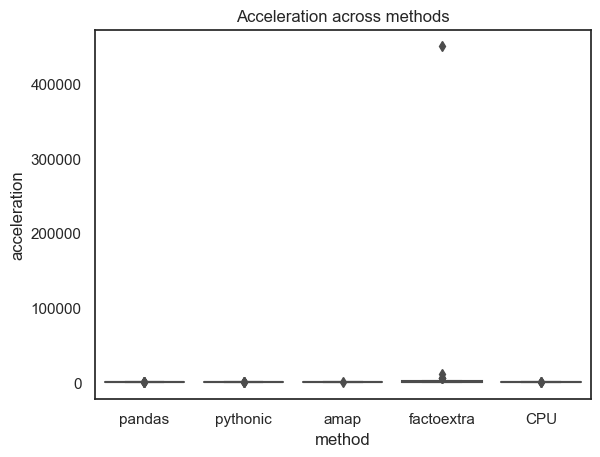

In [33]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

#ax = sns.boxplot(data=size_data_filtered,x='method',hue="metric",y='acceleration')
ax = sns.boxplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Acceleration across methods')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

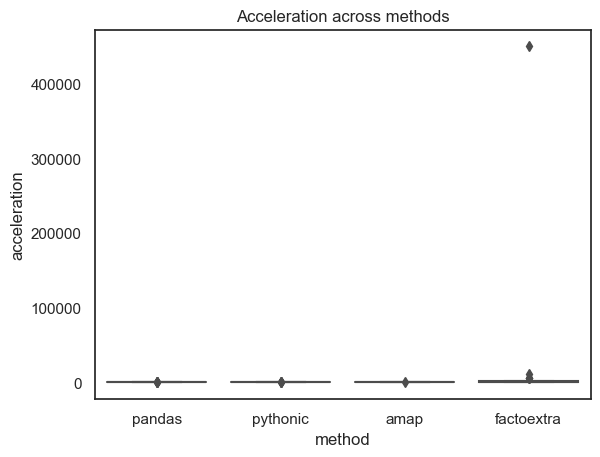

In [34]:
size_data_filtered = df_acc[df_acc['method'].isin(["pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

#ax = sns.boxplot(data=size_data_filtered,x='method',hue="metric",y='acceleration')
ax = sns.boxplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Acceleration across methods')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

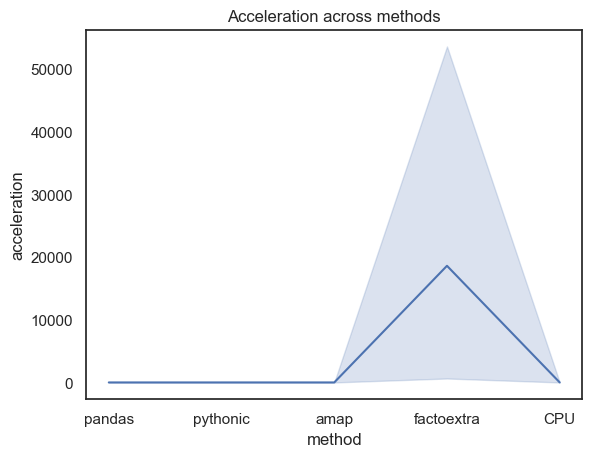

In [35]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

#ax = sns.boxplot(data=size_data_filtered,x='method',hue="metric",y='acceleration')
ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Acceleration across methods')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

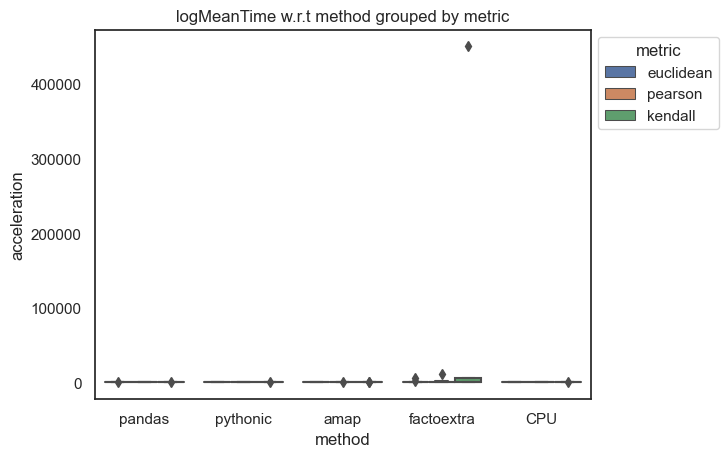

In [36]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',hue="metric",y='acceleration')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logMeanTime w.r.t method grouped by metric')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

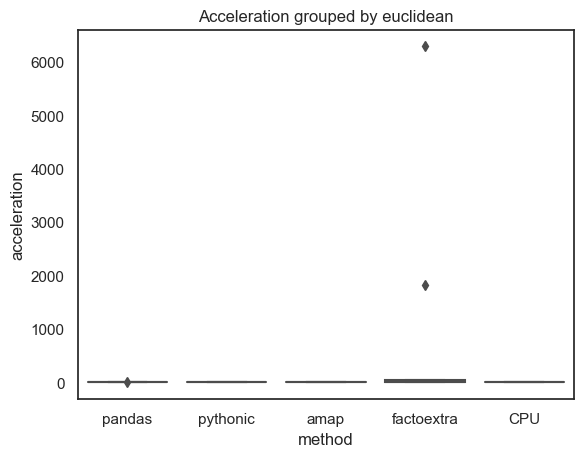

In [37]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["euclidean"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='acceleration')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Acceleration grouped by euclidean')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

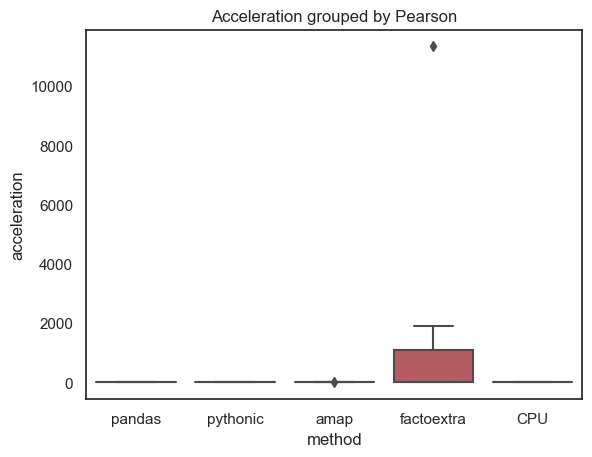

In [38]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='acceleration')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Acceleration grouped by Pearson')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

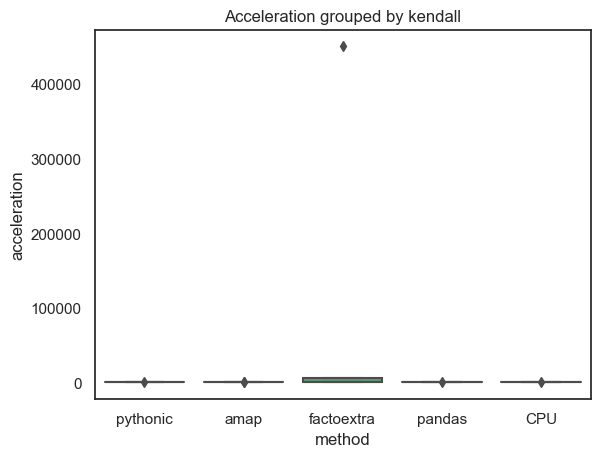

In [39]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["kendall"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='acceleration')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Acceleration grouped by kendall')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

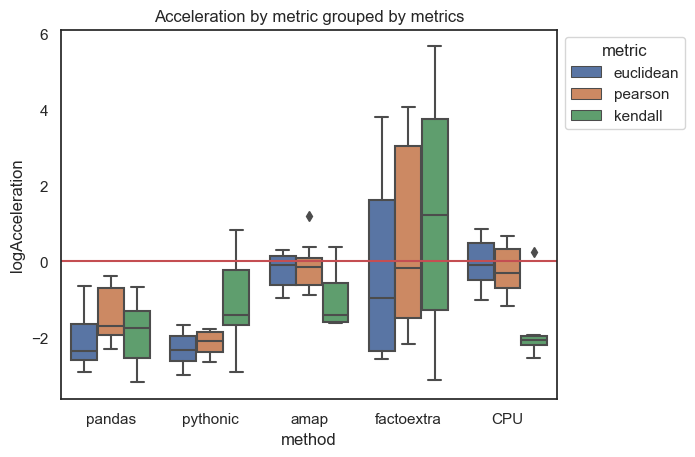

In [49]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',hue="metric",y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-',label="GPU line")
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Acceleration by metric grouped by metrics')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

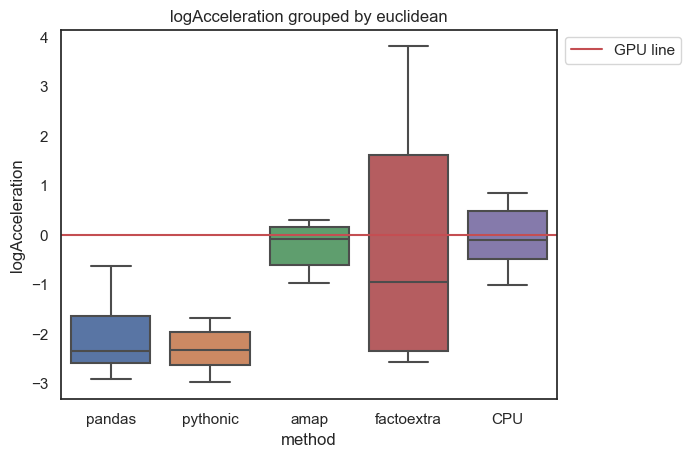

In [50]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["euclidean"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-',label="GPU line")
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration grouped by euclidean')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

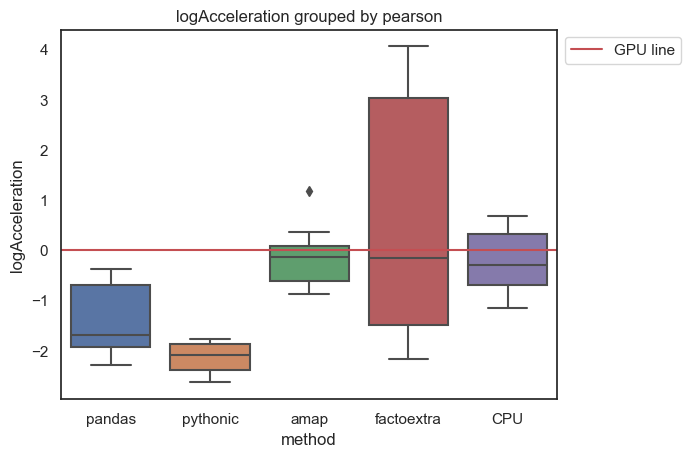

In [46]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-',label="GPU line")
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration grouped by pearson')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

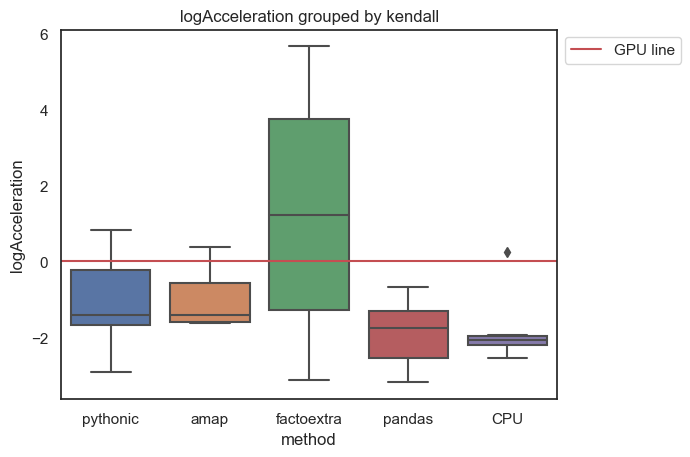

In [51]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["kendall"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-',label="GPU line")
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration grouped by kendall')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

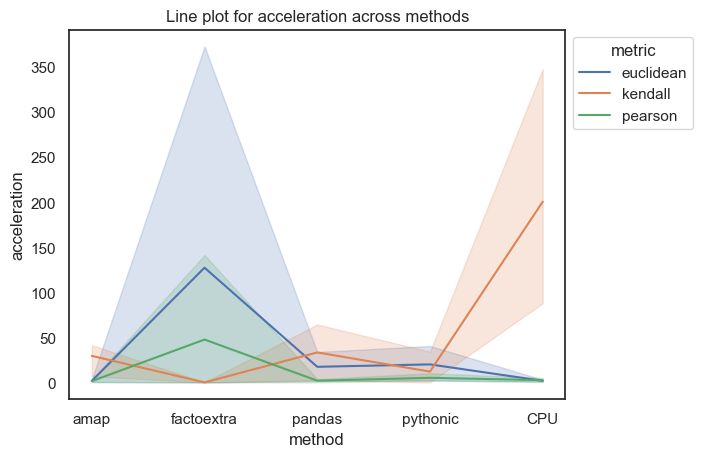

In [43]:
size_data_filtered = df_acc[df_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.lineplot(data=size_data_filtered,x='method',hue="metric",y='acceleration')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Acceleration across methods')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

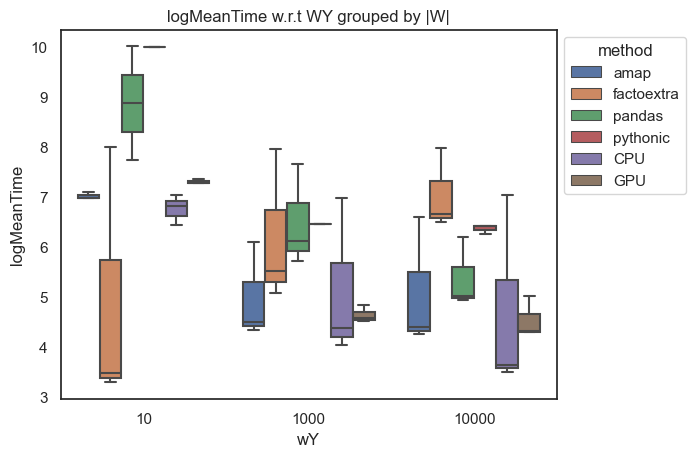

In [52]:
size_data_filtered = df[df['|W|'].isin([100000])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='wY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logMeanTime w.r.t WY grouped by |W|')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

Text(0.5, 1.0, 'logMeanTime w.r.t WY grouped by methods for |W|')

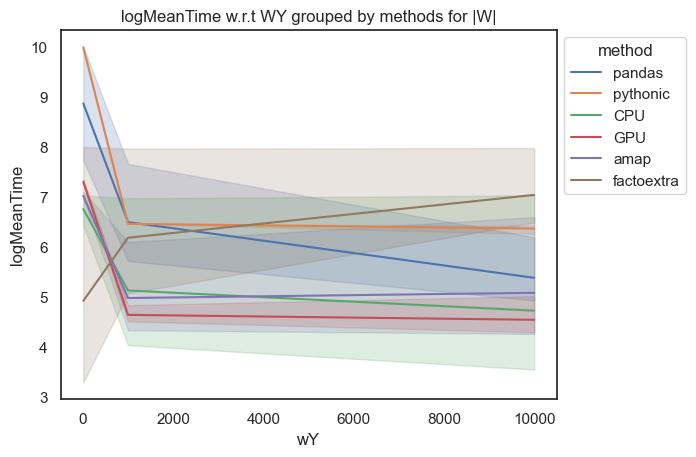

In [53]:
ax = sns.lineplot(data=size_data_filtered,x='wY',hue="method",y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logMeanTime w.r.t WY grouped by methods for |W|')

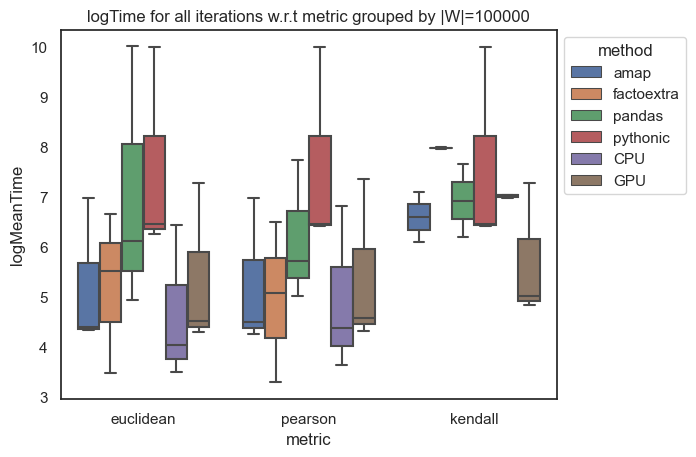

In [54]:
size_data_filtered = df[df['|W|'].isin([100000])]
ax = sns.boxplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by |W|=100000')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_all_on_fixW.png',dpi=200)

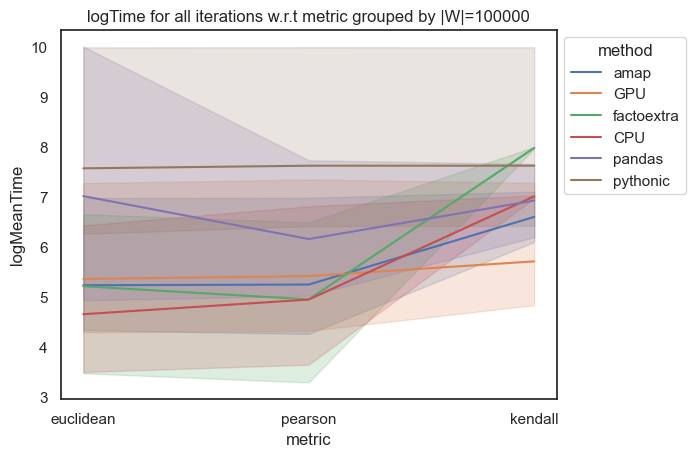

In [55]:
ax = sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by |W|=100000')
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_fixW.png',dpi=200)

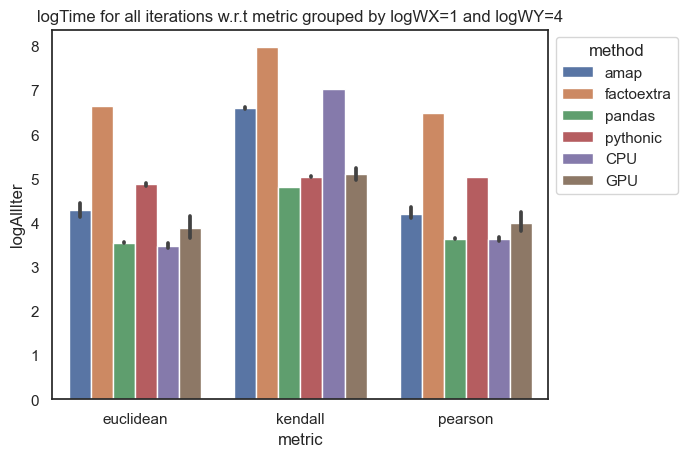

In [56]:
size1_data_filtered = new_df[new_df['logWX'].isin([1])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([4])]
ax=sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=1 and logWY=4')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X1_y4.png',dpi=200)

Text(0.5, 1.0, 'logTime for all iterations w.r.t metric grouped by logWX=1 and logWY=4')

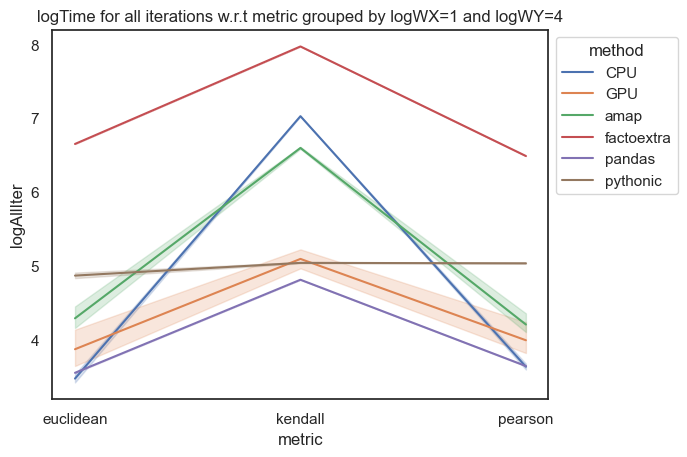

In [57]:
ax=sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=1 and logWY=4')
#kendall_data_filtered 


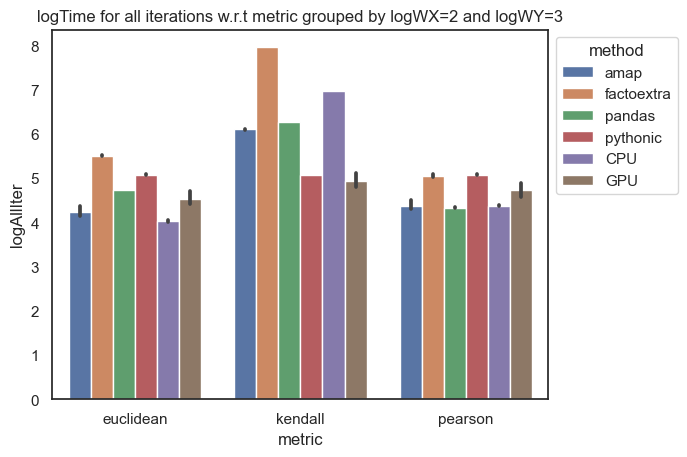

In [58]:
size1_data_filtered = new_df[new_df['logWX'].isin([2])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([3])]
ax=sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=2 and logWY=3')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X2_y3.png',dpi=200)

Text(0.5, 1.0, 'logTime for all iterations w.r.t metric grouped by logWX=2 and logWY=3')

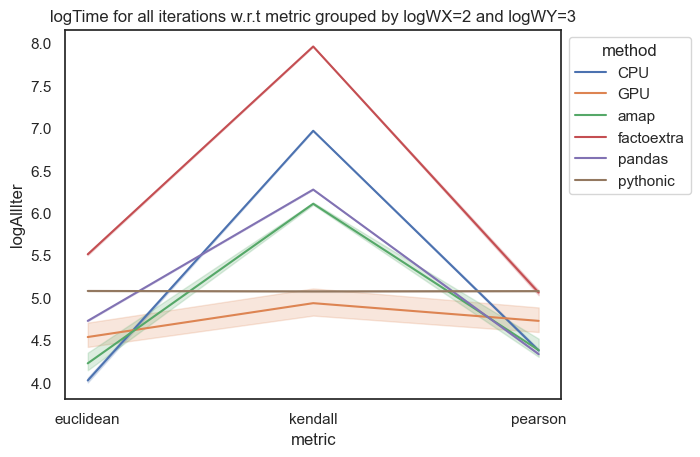

In [59]:
ax=sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=2 and logWY=3')

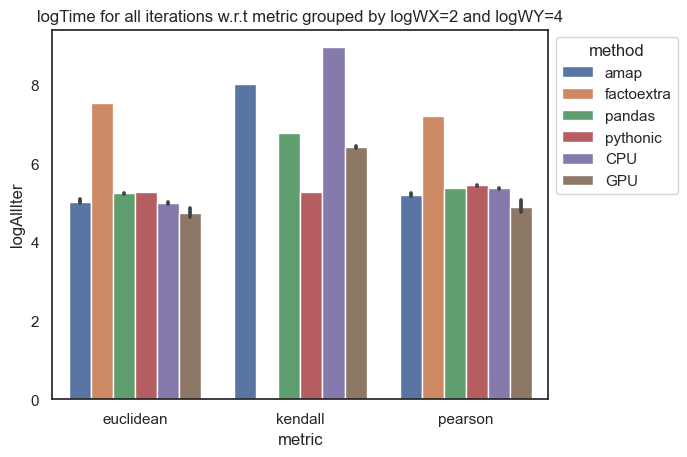

In [60]:
size1_data_filtered = new_df[new_df['logWX'].isin([2])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([4])]
ax=sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=2 and logWY=4')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X2_y4.png',dpi=200)

Text(0.5, 1.0, 'logTime for all iterations w.r.t metric grouped by logWX=2 and logWY=4')

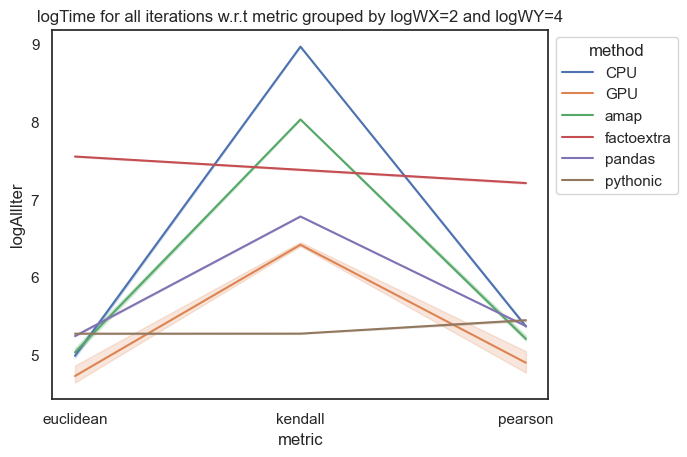

In [61]:
ax=sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=2 and logWY=4')

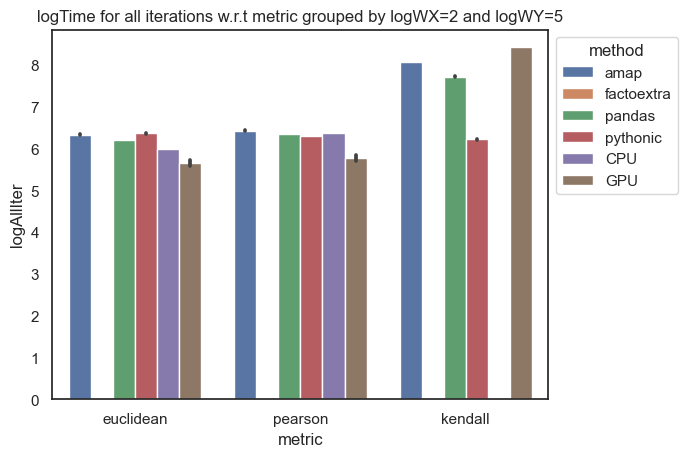

In [62]:
size1_data_filtered = new_df[new_df['logWX'].isin([2])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([5])]
ax=sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=2 and logWY=5')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X1_y5png',dpi=200)

Text(0.5, 1.0, 'logTime for all iterations w.r.t metric grouped by logWX=2 and logWY=5')

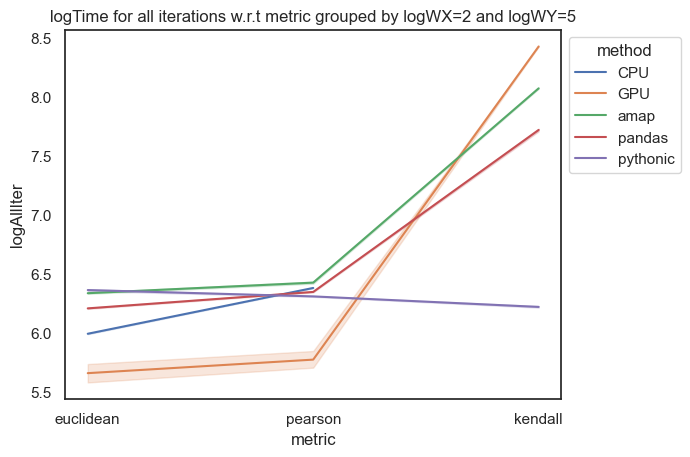

In [63]:
ax=sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=2 and logWY=5')

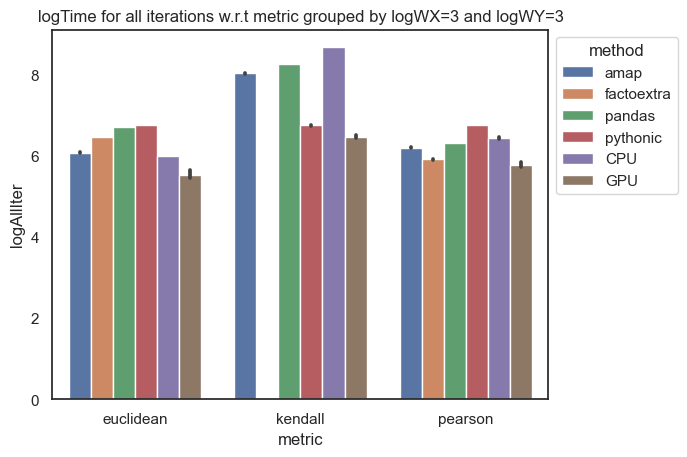

In [64]:
size1_data_filtered = new_df[new_df['logWX'].isin([3])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([3])]
ax=sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=3 and logWY=3')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X1_y5png',dpi=200)

Text(0.5, 1.0, 'logTime for all iterations w.r.t metric grouped by logWX=3 and logWY=3')

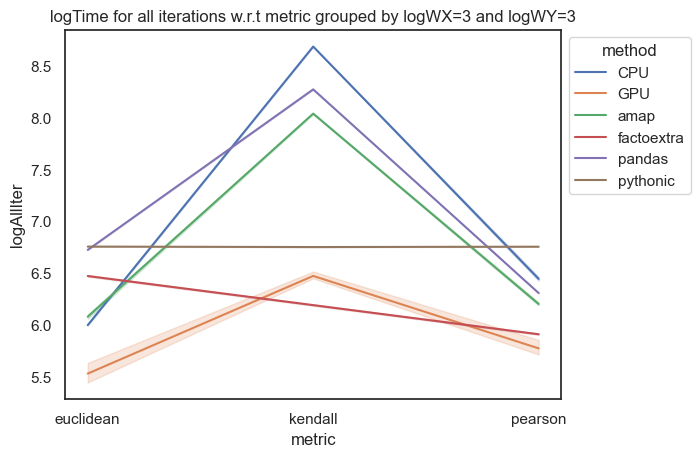

In [65]:
ax=sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=3 and logWY=3')

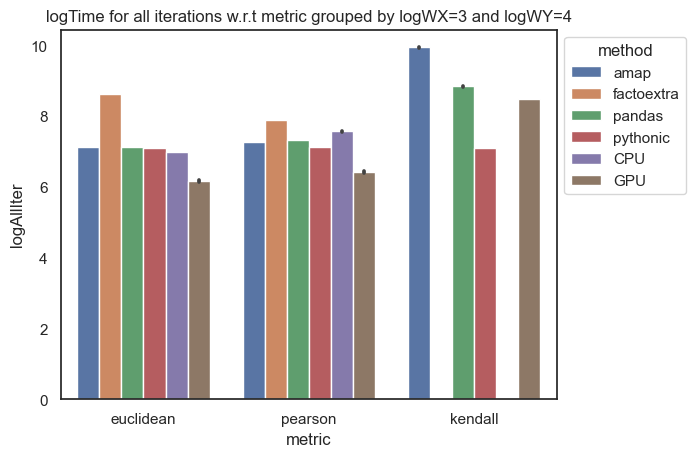

In [66]:
size1_data_filtered = new_df[new_df['logWX'].isin([3])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([4])]
ax=sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=3 and logWY=4')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X1_y5png',dpi=200)

Text(0.5, 1.0, 'logTime for all iterations w.r.t metric grouped by logWX=3 and logWY=4')

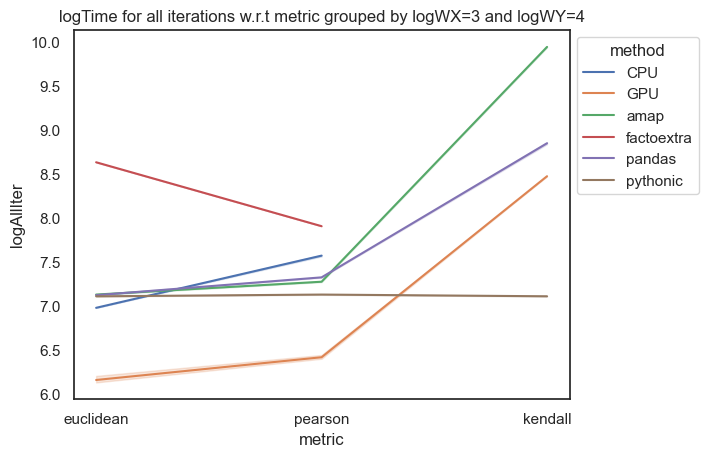

In [67]:
ax=sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=3 and logWY=4')

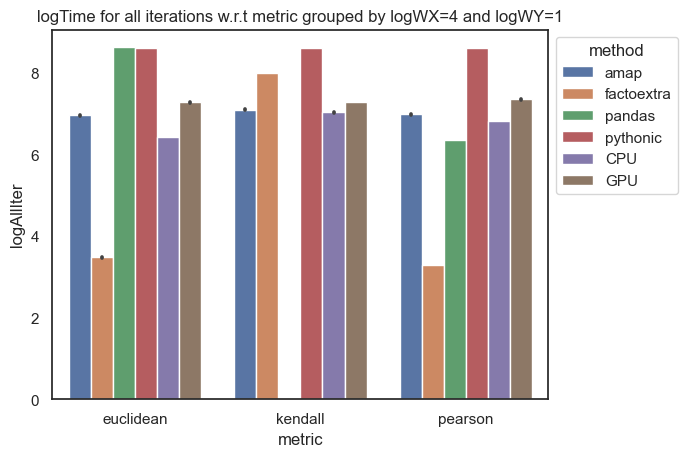

In [68]:
size1_data_filtered = new_df[new_df['logWX'].isin([4])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([1])]
ax=sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=4 and logWY=1')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X1_y5png',dpi=200)

Text(0.5, 1.0, 'logTime for all iterations w.r.t metric grouped by logWX=4 and logWY=1')

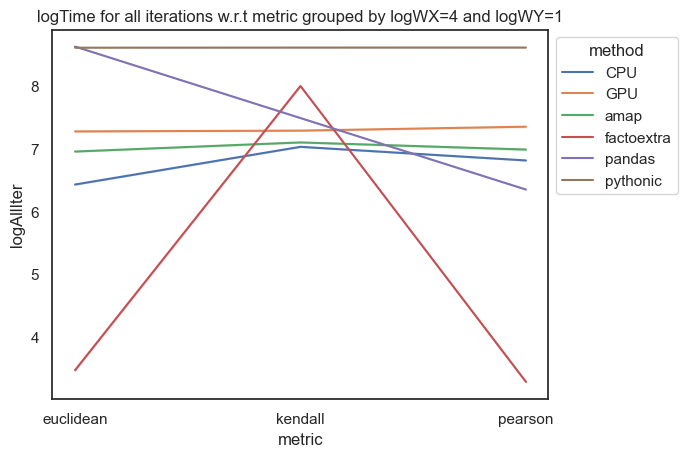

In [69]:
ax=sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=4 and logWY=1')

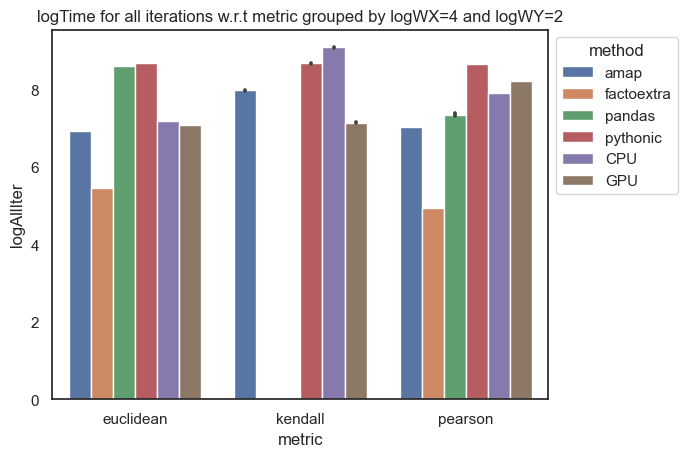

In [70]:
size1_data_filtered = new_df[new_df['logWX'].isin([4])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([2])]
ax=sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=4 and logWY=2')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X1_y5png',dpi=200)

Text(0.5, 1.0, 'logTime for all iterations w.r.t metric grouped by logWX=4 and logWY=2')

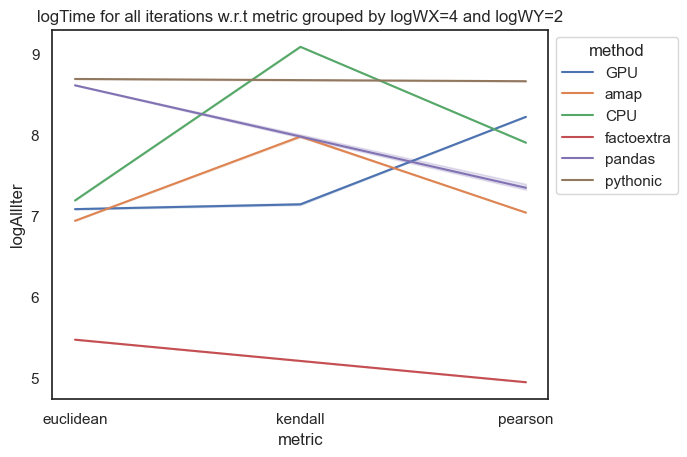

In [71]:
ax=sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=4 and logWY=2')

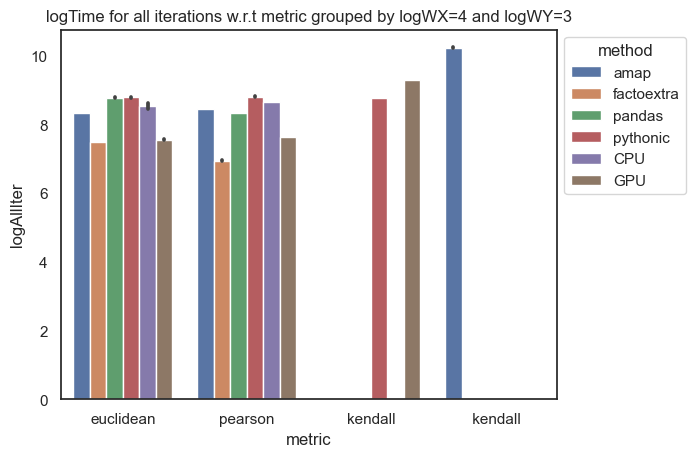

In [72]:
size1_data_filtered = new_df[new_df['logWX'].isin([4])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([3])]
ax=sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=4 and logWY=3')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X1_y5png',dpi=200)

Text(0.5, 1.0, 'logTime for all iterations w.r.t metric grouped by logWX=4 and logWY=3')

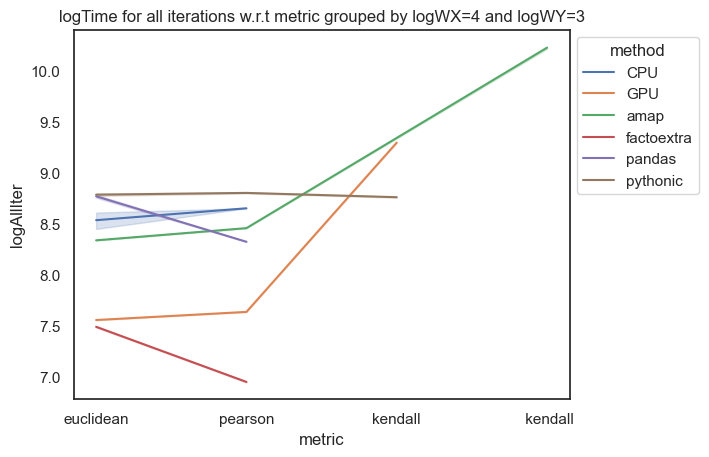

In [73]:
ax=sns.lineplot(data=size_data_filtered,x='metric',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t metric grouped by logWX=4 and logWY=3')

Text(0.5, 1.0, 'logTime for all iterations w.r.t |W| grouped by metric (Euclidean)')

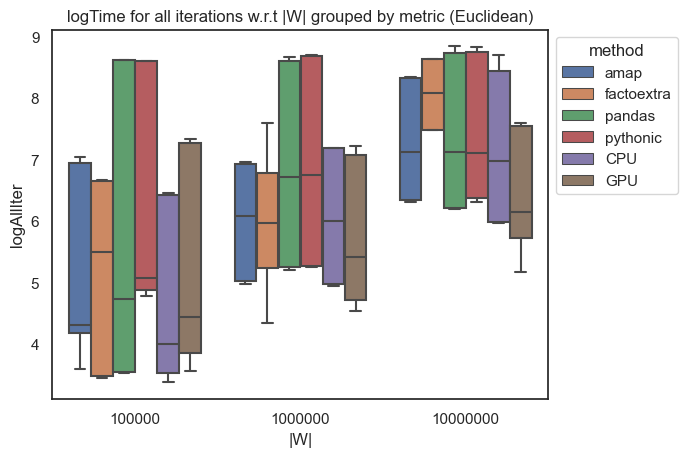

In [74]:
kendall_data_filtered = new_df[new_df['metric'].isin(['euclidean'])]
ax= sns.boxplot(data=kendall_data_filtered,x='|W|',hue="method",hue_order=hue_order,y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t |W| grouped by metric (Euclidean)')

Text(0.5, 1.0, 'logTime for all iterations w.r.t |W| grouped by metric (Euclidean)')

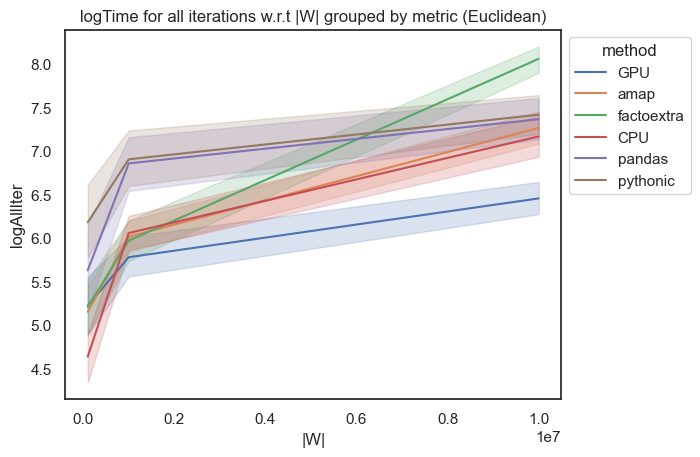

In [75]:
ax= sns.lineplot(data=kendall_data_filtered,x='|W|',hue="method",y='logAllIter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logTime for all iterations w.r.t |W| grouped by metric (Euclidean)')

d:\ai-ml\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
d:\ai-ml\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
d:\ai-ml\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

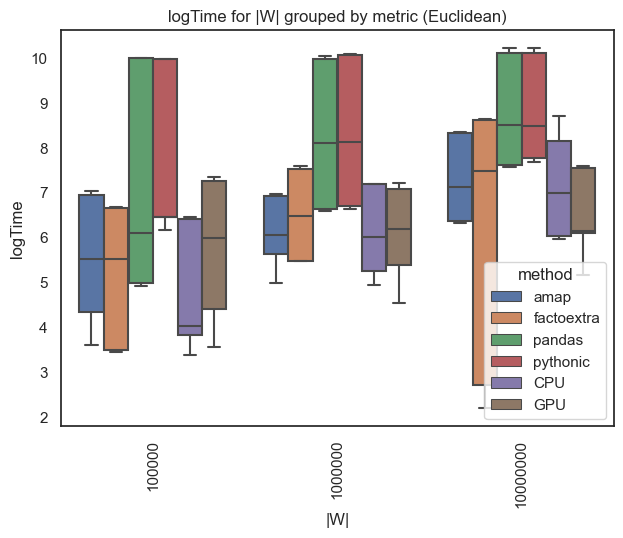

In [76]:
unF = df.DataFile.unique()
#print(unF)
df1 = df[df['metric']=='euclidean']
df2 = df[df['metric']=='kendall']
df3 = df[df['metric']=='pearson']
df4 = df[df['metric']=='euclidean']
df5 = df[df['metric']=='kendall']
df6 = df[df['metric']=='pearson']
df7 = df[df['metric']=='euclidean']
df8 = df[df['metric']=='kendall']
df9 = df[df['metric']=='pearson']
df1['logTime'],df2['logTime'],df3['logTime'] = df1['logMeanTime'],df2['logMeanTime'],df3['logMeanTime']
df4['logTime'],df5['logTime'],df6['logTime'] = df4['logMinTime'],df5['logMinTime'],df6['logMinTime']
df7['logTime'],df8['logTime'],df9['logTime'] = df7['logMaxTime'],df8['logMaxTime'],df9['logMaxTime']
df_e = pd.concat([df1,df4,df7])

df_euc = pd.read_csv('box_euc.csv')
#df1.boxplot(column=['logMeanTime'],by=["W","method"])
sns.boxplot(data=df_e,x='|W|',hue="method",hue_order=hue_order,y='logTime')
plt.tight_layout()
plt.title('logTime for |W| grouped by metric (Euclidean)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_W__on_euc.png',dpi=200)

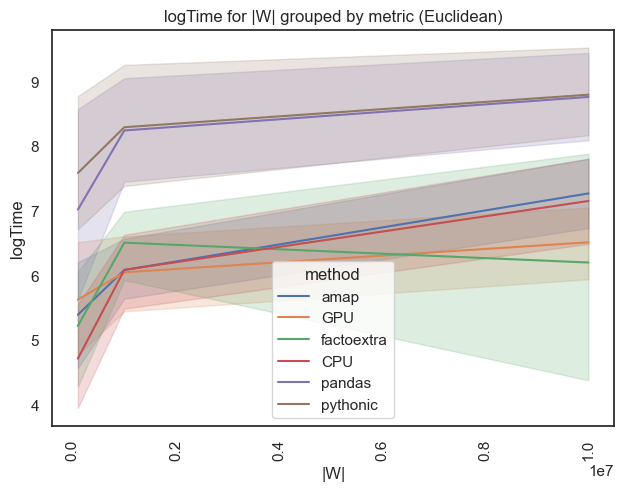

In [77]:
sns.lineplot(data=df_e,x='|W|',hue="method",y='logTime')
plt.tight_layout()
plt.title('logTime for |W| grouped by metric (Euclidean)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_W__on_euc.png',dpi=200)

In [78]:
df_k = pd.concat([df2,df5,df8])
df_p = pd.concat([df3,df6,df9])

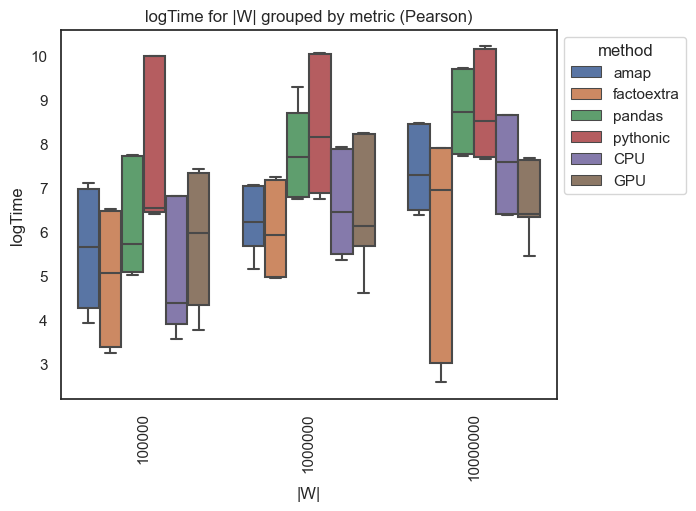

In [79]:
# df2.boxplot(column='logMeanTime',by="W")
# plt.tight_layout()
# plt.title('BoxPlot grouped by metric (Kendall)')
# plt.xticks(rotation=90)

df_pear = pd.read_csv('box_pear.csv')
#df1.boxplot(column=['logMeanTime'],by=["W","method"])
ax = sns.boxplot(data=df_p,x='|W|',hue="method",hue_order=hue_order,y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logTime for |W| grouped by metric (Pearson)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_W__on_pear.png',dpi=200)

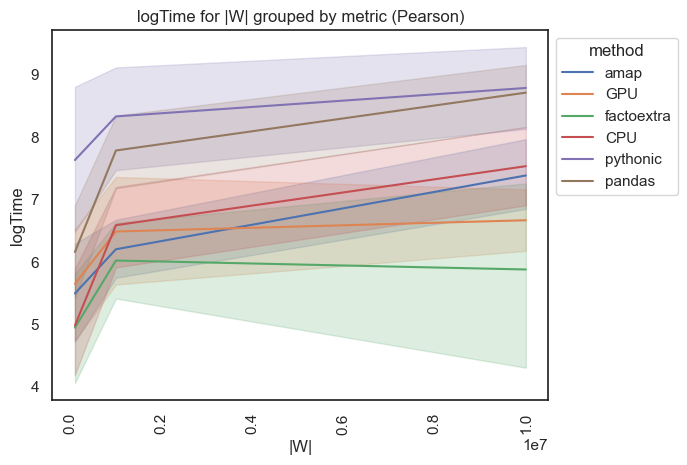

In [80]:
ax = sns.lineplot(data=df_p,x='|W|',hue="method",y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logTime for |W| grouped by metric (Pearson)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_W__on_pear.png',dpi=200)

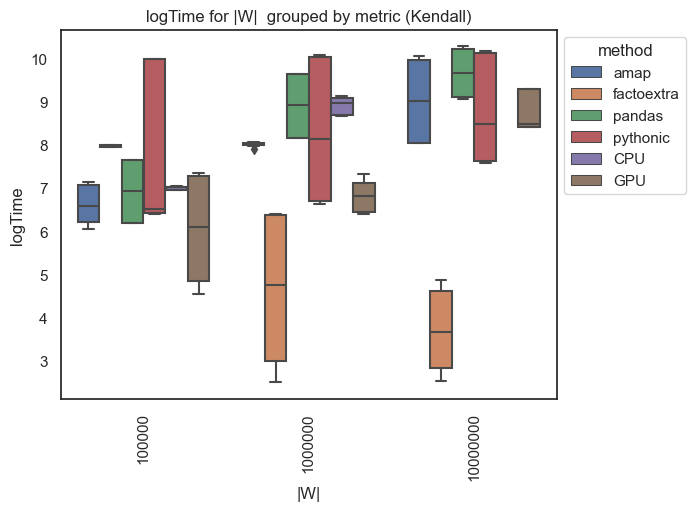

In [81]:
# df1.boxplot(column='logMeanTime',by="W")
# plt.tight_layout()
# plt.title('BoxPlot grouped by metric (Pearson)')
# plt.xticks(rotation=90)

df_kend = pd.read_csv('box_kend.csv')
#df1.boxplot(column=['logMeanTime'],by=["W","method"])
ax=sns.boxplot(data=df_k,x='|W|',hue="method",hue_order=hue_order,y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logTime for |W|  grouped by metric (Kendall)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_W__on_ken.png',dpi=200)

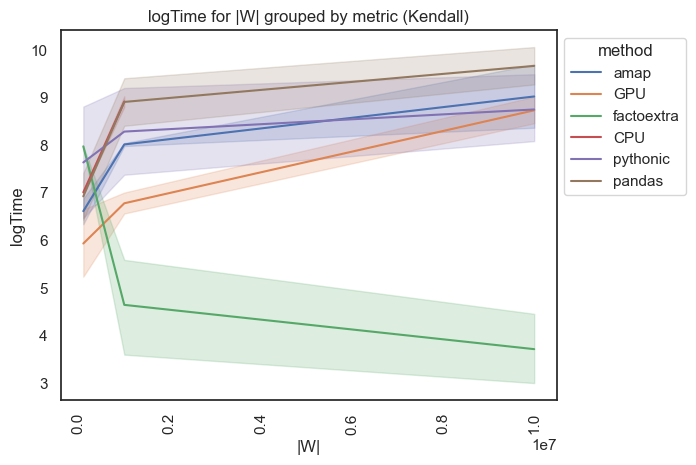

In [82]:
ax=sns.lineplot(data=df_k,x='|W|',hue="method",y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logTime for |W| grouped by metric (Kendall)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated__X_on_ken.png',dpi=200)

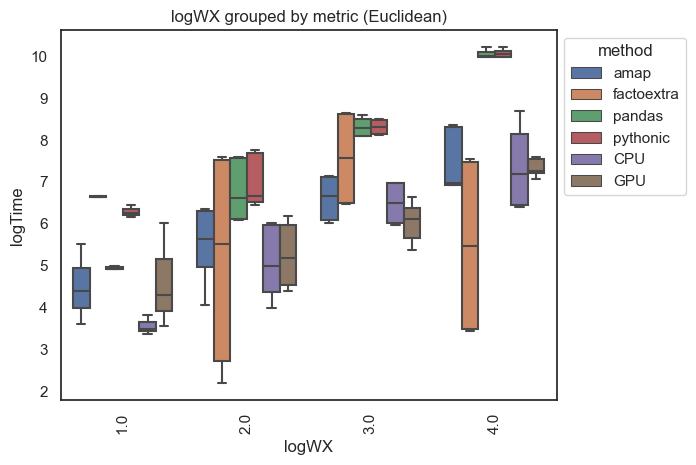

In [83]:
ax=sns.boxplot(data=df_e,x='logWX',hue="method",hue_order=hue_order,y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWX grouped by metric (Euclidean)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_X_on_euc.png',dpi=200)

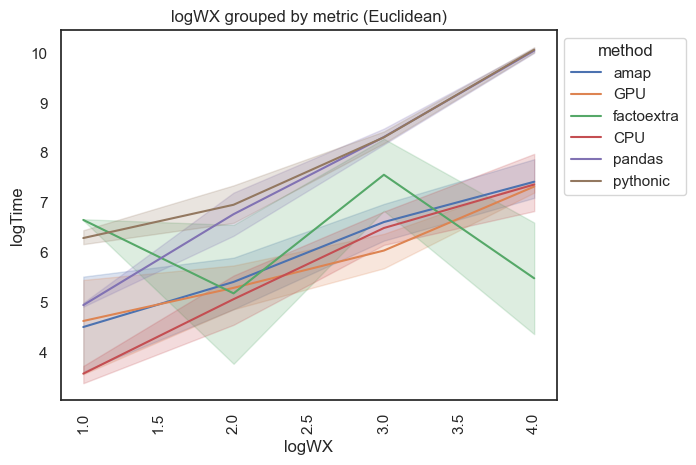

In [84]:
ax=sns.lineplot(data=df_e,x='logWX',hue="method",y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWX grouped by metric (Euclidean)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_X_on_euc.png',dpi=200)

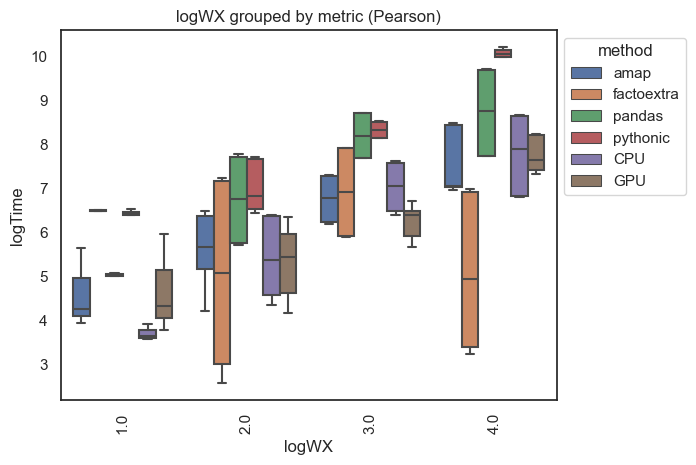

In [85]:
ax=sns.boxplot(data=df_p,x='logWX',hue="method",hue_order=hue_order,y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWX grouped by metric (Pearson)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_X_on_pear.png',dpi=200)

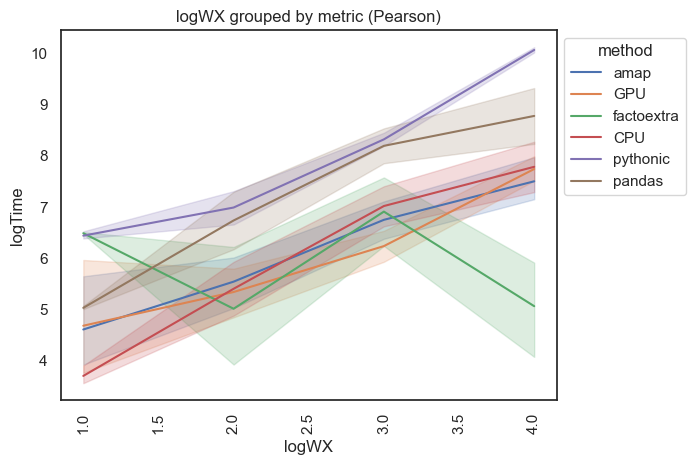

In [86]:
ax=sns.lineplot(data=df_p,x='logWX',hue="method",y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWX grouped by metric (Pearson)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_X_on_pear.png',dpi=200)

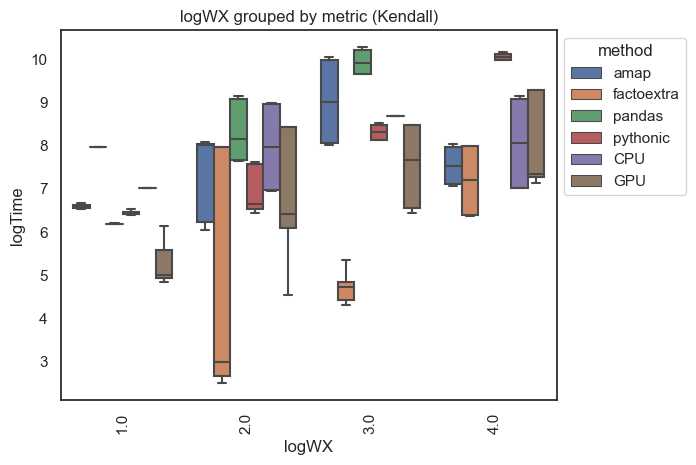

In [87]:
ax=sns.boxplot(data=df_k,x='logWX',hue="method",hue_order=hue_order,y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWX grouped by metric (Kendall)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_X_on_ken.png',dpi=200)

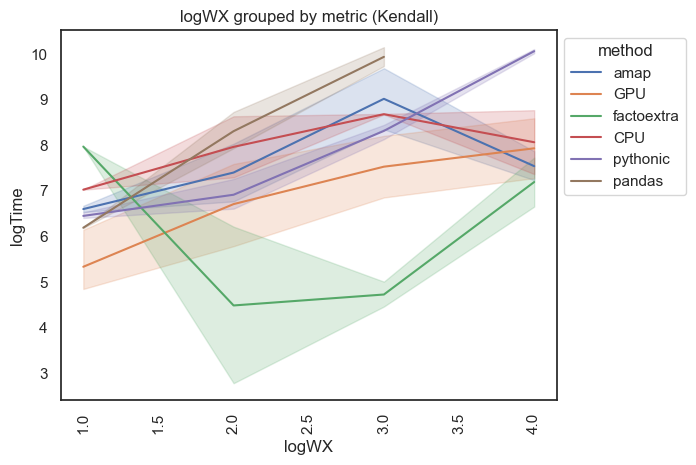

In [88]:
ax=sns.lineplot(data=df_k,x='logWX',hue="method",y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWX grouped by metric (Kendall)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_X_on_ken.png',dpi=200)

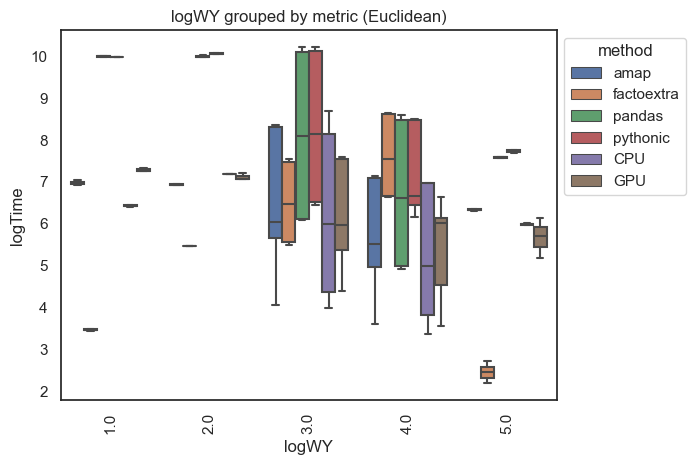

In [89]:
ax=sns.boxplot(data=df_e,x='logWY',hue="method",hue_order=hue_order,y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY grouped by metric (Euclidean)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_W_on_euc.png',dpi=200)

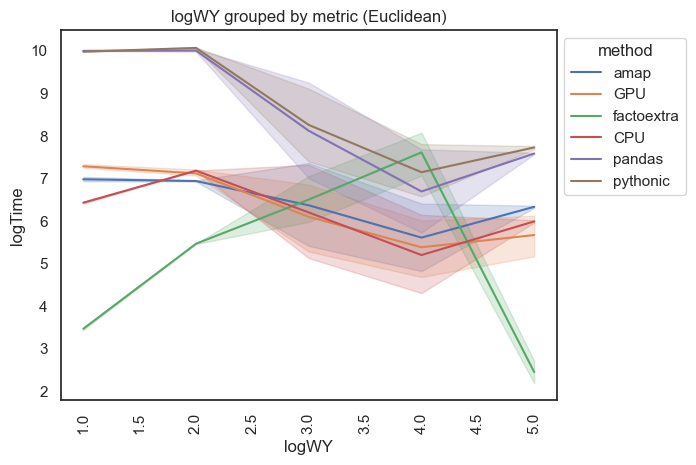

In [90]:
ax=sns.lineplot(data=df_e,x='logWY',hue="method",y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY grouped by metric (Euclidean)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_W_on_euc.png',dpi=200)

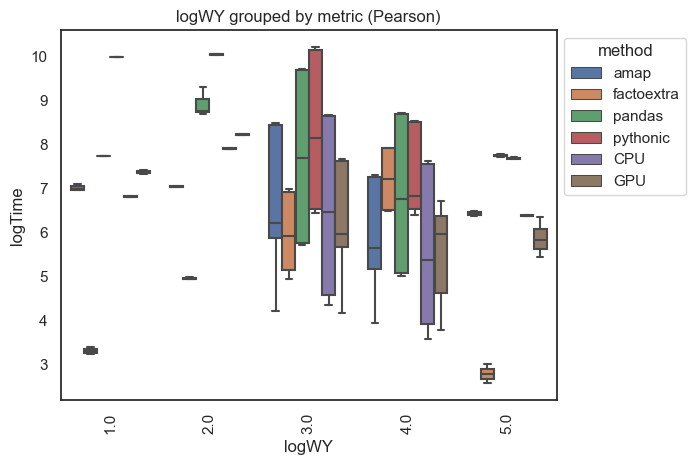

In [91]:
ax=sns.boxplot(data=df_p,x='logWY',hue="method",hue_order=hue_order,y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY grouped by metric (Pearson)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_W_on_pearson.png',dpi=200)

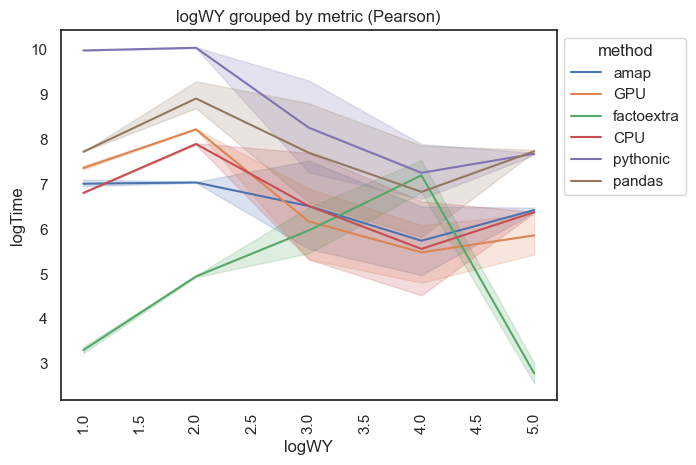

In [92]:
ax=sns.lineplot(data=df_p,x='logWY',hue="method",y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY grouped by metric (Pearson)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_W_on_pearson.png',dpi=200)

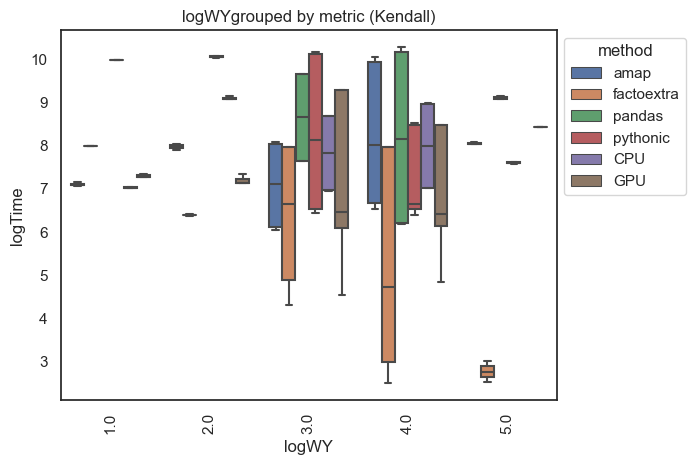

In [93]:
ax=sns.boxplot(data=df_k,x='logWY',hue="method",hue_order=hue_order,y='logTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWYgrouped by metric (Kendall)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_W_on_kendall.png',dpi=200)

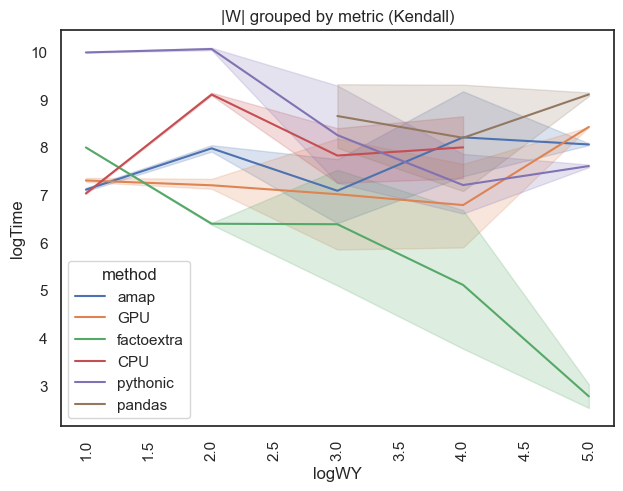

In [94]:
ax=sns.lineplot(x="logWY", y="logTime",
             hue="method", #style="event",
             data=df_k)

plt.tight_layout()
plt.title('|W| grouped by metric (Kendall)')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_W_on_kendall.png',dpi=200)

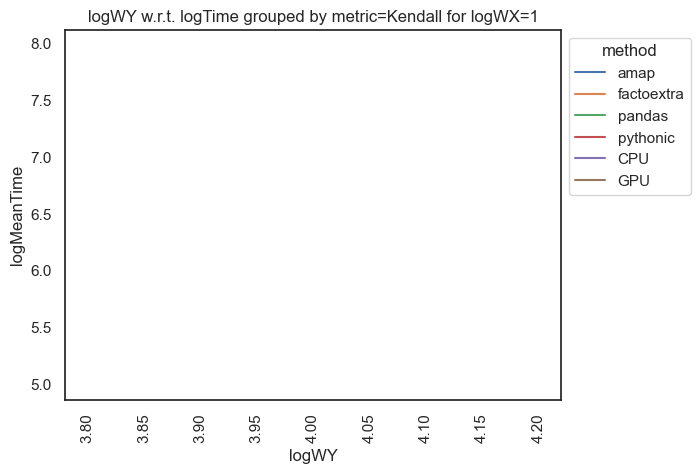

In [95]:
X_filtered_2= df_k[df_k['logWX'].isin([1])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Kendall for logWX=1')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X1_kendall.png',dpi=200)

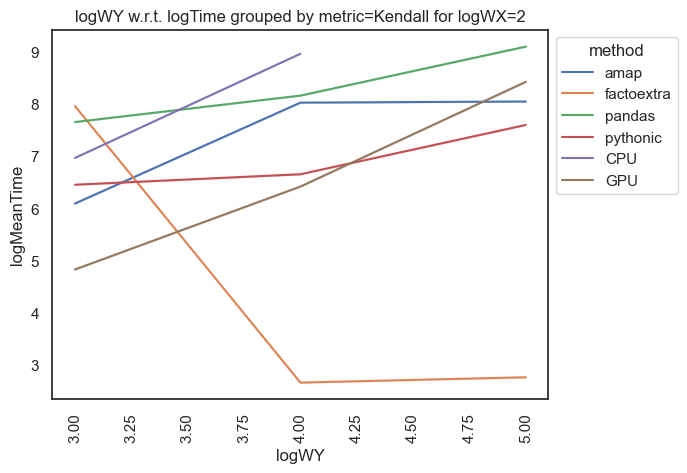

In [96]:
X_filtered_2= df_k[df_k['logWX'].isin([2])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Kendall for logWX=2')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X2_kendall.png',dpi=200)

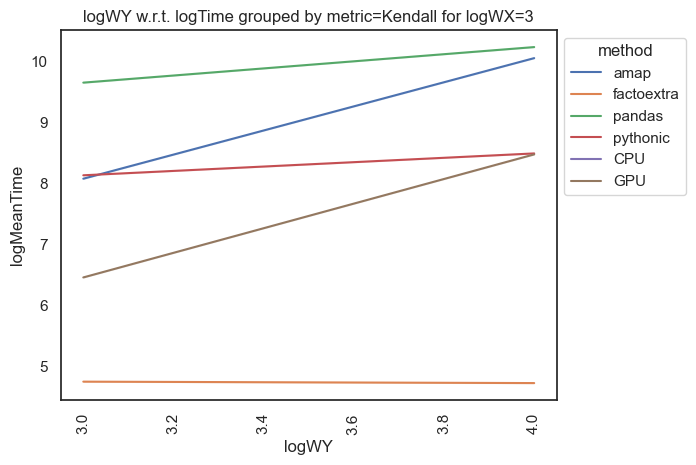

In [97]:
X_filtered_2= df_k[df_k['logWX'].isin([3])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Kendall for logWX=3')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X3_kendall.png',dpi=200)

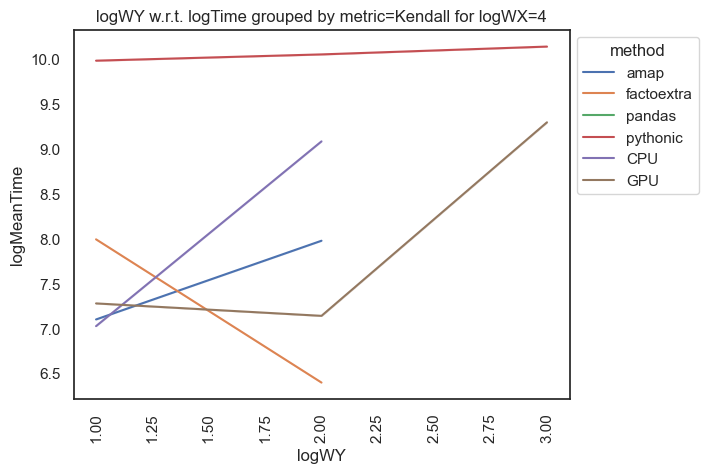

In [98]:
X_filtered_2= df_k[df_k['logWX'].isin([4])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Kendall for logWX=4')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X4_kendall.png',dpi=200)

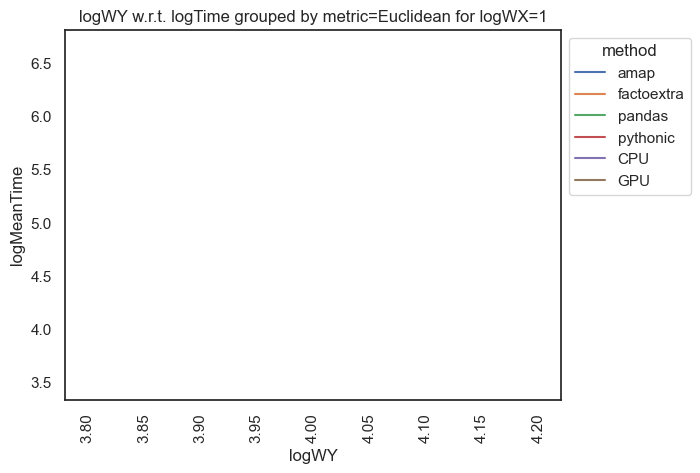

In [99]:
X_filtered_2= df_e[df_e['logWX'].isin([1])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Euclidean for logWX=1')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X4_kendall.png',dpi=200)

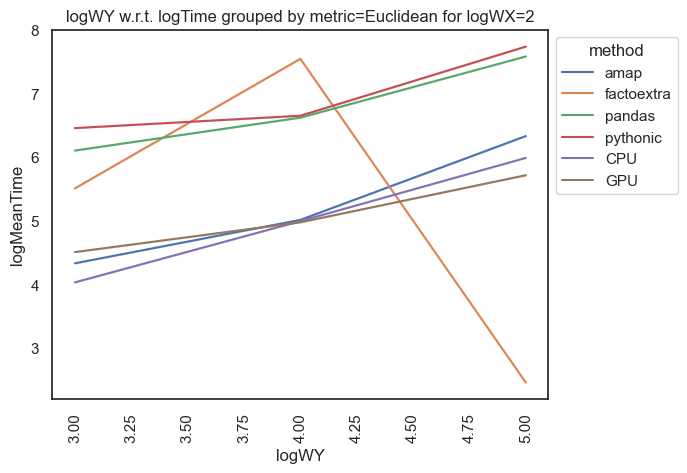

In [100]:
X_filtered_2= df_e[df_e['logWX'].isin([2])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Euclidean for logWX=2')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X4_kendall.png',dpi=200)

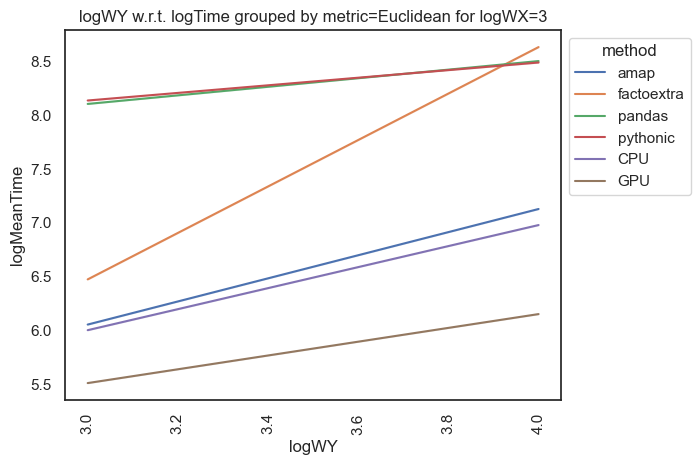

In [101]:
X_filtered_2= df_e[df_e['logWX'].isin([3])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Euclidean for logWX=3')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X4_kendall.png',dpi=200)

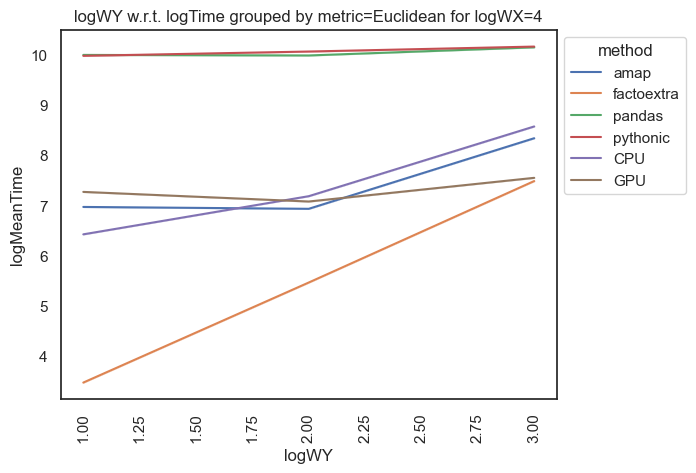

In [102]:
X_filtered_2= df_e[df_e['logWX'].isin([4])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Euclidean for logWX=4')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X4_kendall.png',dpi=200)

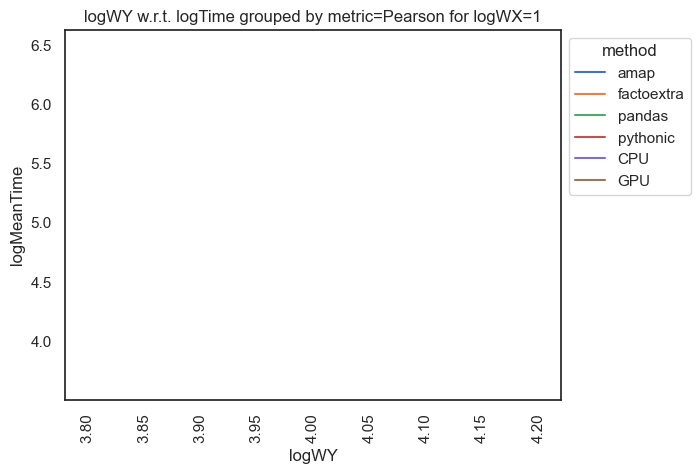

In [103]:
X_filtered_2= df_p[df_p['logWX'].isin([1])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Pearson for logWX=1')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X4_kendall.png',dpi=200)

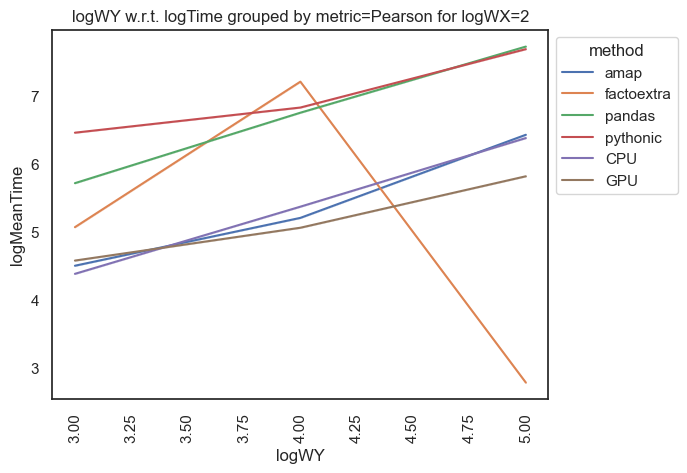

In [104]:
X_filtered_2= df_p[df_p['logWX'].isin([2])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Pearson for logWX=2')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X4_kendall.png',dpi=200)

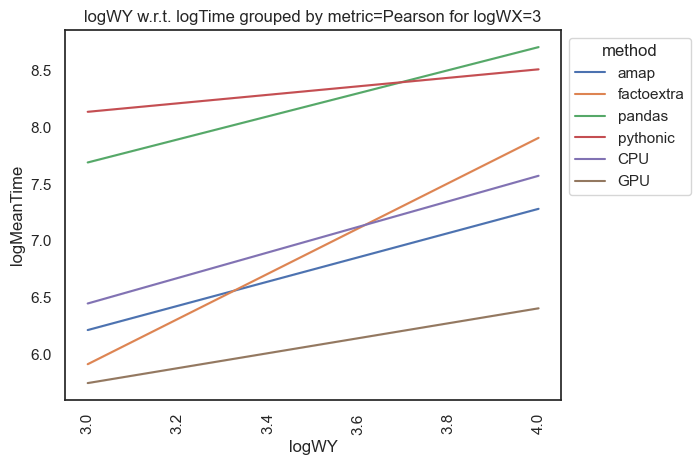

In [105]:
X_filtered_2= df_p[df_p['logWX'].isin([3])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Pearson for logWX=3')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X4_kendall.png',dpi=200)

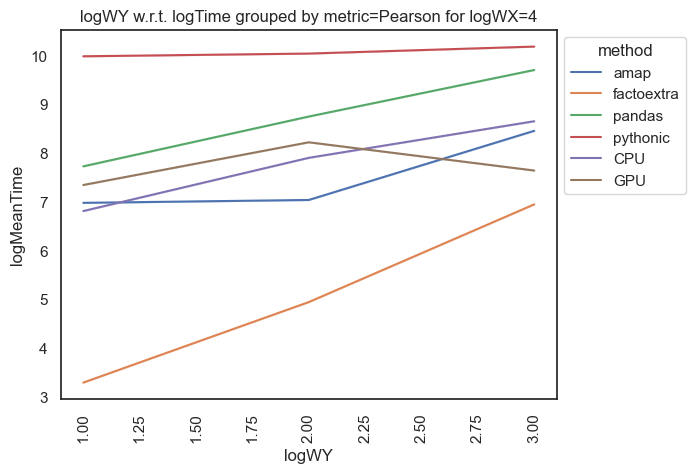

In [106]:
X_filtered_2= df_p[df_p['logWX'].isin([4])]
ax=sns.lineplot(data=X_filtered_2,x='logWY',hue="method",hue_order=hue_order,y='logMeanTime')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.title('logWY w.r.t. logTime grouped by metric=Pearson for logWX=4')
plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}lineplot_bench_generated_all_on_X4_kendall.png',dpi=200)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]),
 [Text(-2000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

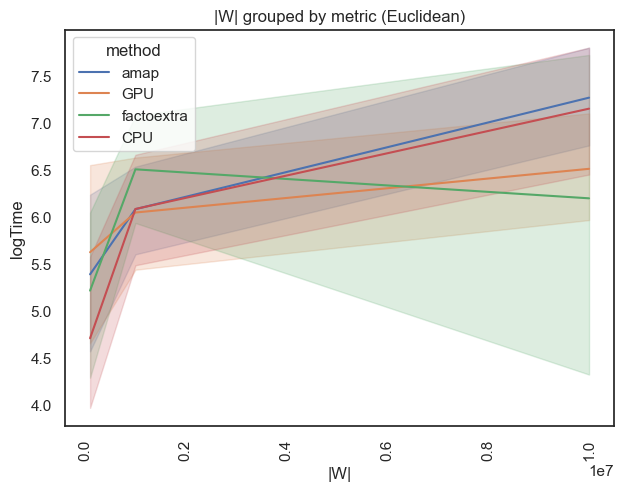

In [107]:
filtered_df_e = df_e[df_e['method'].isin(['CPU', 'GPU','amap','factoextra'])]
#error comes if using with pythonic pacakges to look into
sns.lineplot(x="|W|", y="logTime",
             hue="method", #style="event",
             data=filtered_df_e)

plt.tight_layout()
plt.title('|W| grouped by metric (Euclidean)')
plt.xticks(rotation=90)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]),
 [Text(-2000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

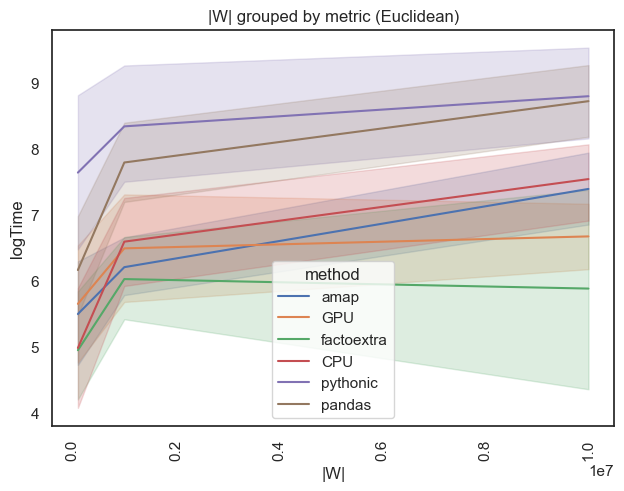

In [108]:
sns.lineplot(x="|W|", y="logTime",
             hue="method", #style="event",
             data=df_p)

plt.tight_layout()
plt.title('|W| grouped by metric (Euclidean)')
plt.xticks(rotation=90)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]),
 [Text(-2000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

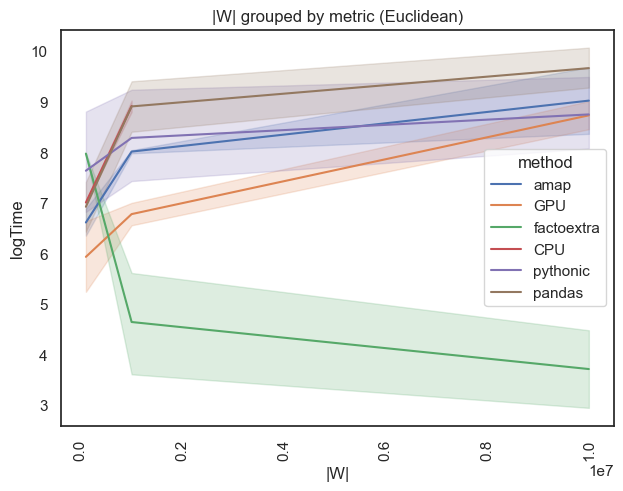

In [109]:
sns.lineplot(x="|W|", y="logTime",
             hue="method", #style="event",
             data=df_k)

plt.tight_layout()
plt.title('|W| grouped by metric (Euclidean)')
plt.xticks(rotation=90)

In [110]:
# FOR PLOTTING RESULTS FOR REAL DATASETS

# plotData = df[df['IDtag']=="B_CD8_T_count_matrix"]
# sns.relplot(x="weight", y="logMinTime",hue='method',
#     size="metric", col="metric",
#     kind="line",data=plotData)

In [111]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math

# #log_val  type  metric  mean
# df = pd.read_csv('random.csv',delimiter='\t',header=None)
# print(df)

# def GenerateRandomData():
# 	pass

# def logScaleConvert(data):
#   data['logarithm_base10_W'] = np.log10(data[0])
#   data['logarithm_base10_M'] = np.log10(data[3])
#   return data

# log_scaled_df = logScaleConvert(df)
# print(log_scaled_df)
# #log_scaled_df=log_scaled_df.pivot('logarithm_base10_W')

# def plotLogScaleValues(log_data):
#   sns.set_style('whitegrid')
#   sample_count = np.around(np.logspace(math.log10(5),math.log10(10),6))
#   g_results=sns.lineplot(data=log_data['logarithm_base10_W'],dashes=0,markers=['o','o','o'])
#   g_results.set(xscale='log')
#   g_results.set(xticks=sample_count)
#   g_results.set(xticklabels=sample_count)

# #plotLogScaleValues(log_scaled_df)
# def plotCorrelationMatrix(data):
#   f, ax = plt.subplots(figsize=(9, 6))
#   sns.heatmap(data, annot=True, fmt="d", linewidths=.5, ax=ax)
# #log_scaled_d
# log_scaled_d = log_scaled_df['logarithm_base10_W']
# #log_scaled_d = log_scaled_df['logarithm_base10_M']

# plotCorrelationMatrix(log_scaled_d)

# plt.show()

# import pandas as pd 
# df = pd.read_csv('unt.csv',sep=" ")
# import matplotlib.pyplot as mp
# import pandas as pd
# import seaborn as sb
  
# data = df.pivot("metric","method","mean")
# dataplot = sb.heatmap(data, cmap="YlGnBu", annot=True)
  
# # displaying heatmap
# mp.show()
# df.to_csv('cleaned.csv')
# print(df)

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

#df = pd.read_csv('matrix_real1.bench',sep=" ")
df = pd.read_csv(GENERATED_PATH)
cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)

weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))

df['wX'] = w1
df['wY'] = w2
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
#df['IDtag'] = unID
#print(df[df['DataFile']])

ma=[]
for i in df['DataFile']:
    m=i.split('/')[-1].split('.')
    ma.append(m[0])
c=0
#for j in df['method']:
#    ma[c]= ma[c]+'_'+j
#    c+=1
#c=0
#for k in df['metric']:
#    ma[c]= ma[c]+'_'+k
#    c+=1

df['|W|']=ma

unF = df.DataFile.unique()
print(unF)
df1 = df[df['metric']=='euclidean']
df2 = df[df['metric']=='kendall']
df3 = df[df['metric']=='pearson']

['../DistanceBenchmarking/Generated/100_cells_100000_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv '
 '../DistanceBenchmarking/Generated/10000_cells_10_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_1000_genes.csv'
 '../../DistanceBenchmarking/Generated/10000_cells_100_genes.csv'
 '../DistanceBenchmarking/Generated/100000_cells_10_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_100_genes.csv'
 '../../DistanceBenchmarking/Generated/100_cells_100000_genes.csv'
 '../../DistanceBenchmarking/Generated/1000_cells_1000_genes.csv'
 '../../DistanceBenchmarking/Generated/100_cells_10000_genes.csv'
 '../../DistanceBenchmarking/Generated/1

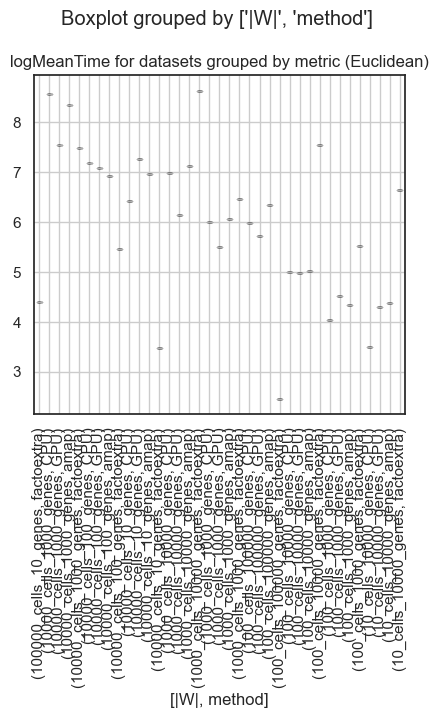

In [113]:
df1.boxplot(column='logMeanTime',by=["|W|","method"])
plt.tight_layout()
plt.title('logMeanTime for datasets grouped by metric (Euclidean)')
plt.xticks(rotation=90)
plt.show()

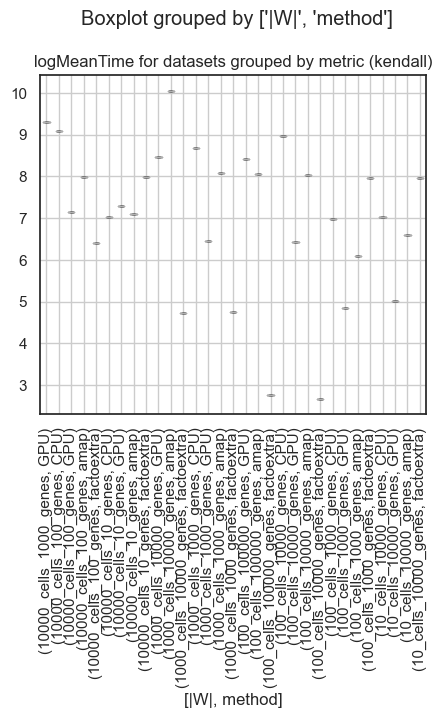

In [114]:
df2.boxplot(column='logMeanTime',by=["|W|","method"])
plt.tight_layout()
plt.title('logMeanTime for datasets grouped by metric (kendall)')
plt.xticks(rotation=90)
plt.show()

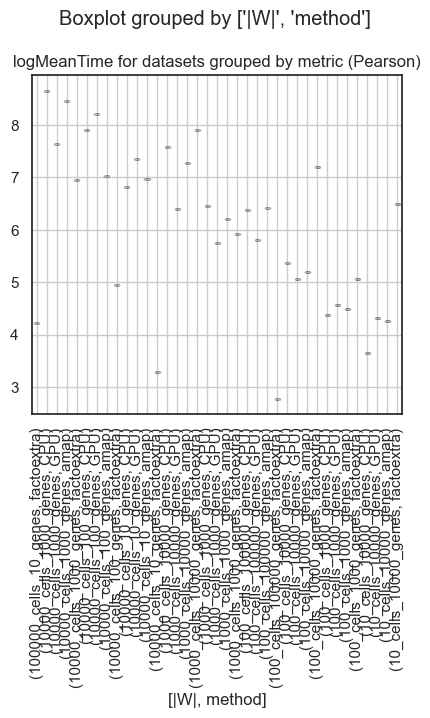

In [115]:
df3.boxplot(column='logMeanTime',by=["|W|","method"])
plt.tight_layout()
plt.title('logMeanTime for datasets grouped by metric (Pearson)')
plt.xticks(rotation=90)
plt.show()

In [116]:
# unF = df.DataFile.unique()
# print(unF)
# df1 = df[df['DataFile']==unF[0]]
# df2 = df[df['DataFile']==unF[1]]
# df3 = df[df['DataFile']==unF[2]]
# df4 = df[df['DataFile']==unF[3]]
# df5 = df[df['DataFile']==unF[4]]
# #df6 = df[df['DataFile']==unF[5]]
# df7 = df[df['DataFile']==unF[6]]
# df8 = df[df['DataFile']==unF[7]]
# df9 = df[df['DataFile']==unF[8]]
# df10 = df[df['DataFile']==unF[9]]

# fig, axes = plt.subplots(nrows=1,ncols=9)
# #for name, ax in zip(names, axes.flatten()):
# for i in axes:
#     i.tick_params(axis='x', rotation=90)
# sns.boxplot(data=df1, x="metric", y="logMeanTime",ax=axes[0])
# sns.boxplot(data=df2, x="metric", y="logMeanTime",ax=axes[1])
# sns.boxplot(data=df3, x="metric", y="logMeanTime",ax=axes[2])
# sns.boxplot(data=df4, x="metric", y="logMeanTime",ax=axes[3])
# sns.boxplot(data=df5, x="metric", y="logMeanTime",ax=axes[4])
# #sns.boxplot(data=df6, x="metric", y="logMeanTime",ax=axes[5])
# sns.boxplot(data=df7, x="metric", y="logMeanTime",ax=axes[5])
# sns.boxplot(data=df8, x="metric", y="logMeanTime",ax=axes[6])
# sns.boxplot(data=df9, x="metric", y="logMeanTime",ax=axes[7])
# sns.boxplot(data=df10, x="metric", y="logMeanTime",ax=axes[8])
# plt.tight_layout()
# plt.show()


## Generated Sparse Visualization

In [117]:
df = pd.read_csv(GENERATED_SPARSE_PATH,sep=" ")
#df = pd.read_csv('generatedData_bench_100iter.csv')

cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
df

DataFile      method  size  \
0    ../../DistanceBenchmarking/GeneratedSparse/100...         GPU   100   
1    ../../DistanceBenchmarking/GeneratedSparse/100...         GPU   100   
2    ../../DistanceBenchmarking/GeneratedSparse/100...         GPU   100   
3    ../../DistanceBenchmarking/GeneratedSparse/100...         GPU   100   
4    ../../DistanceBenchmarking/GeneratedSparse/100...         GPU   100   
..                                                 ...         ...   ...   
366  ../../DistanceBenchmarking/GeneratedSparse/100...  factoextra   100   
367  ../../DistanceBenchmarking/GeneratedSparse/100...  factoextra   100   
368  ../../DistanceBenchmarking/GeneratedSparse/100...  factoextra   100   
369  ../../DistanceBenchmarking/GeneratedSparse/100...  factoextra   100   
370  ../../DistanceBenchmarking/GeneratedSparse/100...  factoextra   100   

        metric          mean            sd         val_1         val_2  \
0      kendall  7.621185e+06  1.448788e+06  1.454826e+07  7.146085e+06   
1    euclidean  1.107941e+06  1.498401e+06  8.300060e+06  8.431038e+05   
2      pearson  4.610702e+06  1.501138e+06  1.181592e+07  4.346568e+06   
3      kendall  6.784365e+06  1.524808e+06  1.409411e+07  6.623970e+06   
4    euclidean  1.120901e+06  1.510871e+06  8.371800e+06  8.565832e+05   
..         ...           ...           ...           ...           ...   
366  euclidean  2.983176e+06  4.091300e+03  2.994803e+06  2.989524e+06   
367  euclidean  3.005050e+06  1.098391e+04  3.045682e+06  3.011877e+06   
368    kendall  5.488770e+09  1.466998e+06  5.492590e+09  5.488601e+09   
369    kendall  5.968095e+09  1.381117e+06  5.968258e+09  5.968749e+09   
370    kendall  6.540620e+09  1.836910e+06  6.540456e+09  6.542990e+09   

            val_3         val_4  ...        val_18        val_19  \
0    7.471550e+06  7.480540e+06  ...  7.322697e+06  7.360821e+06   
1    8.089358e+05  8.124740e+05  ...  8.063292e+05  8.058725e+05   
2    4.312414e+06  4.337095e+06  ...  4.308699e+06  4.302000e+06   
3    6.440376e+06  6.510551e+06  ...  6.526530e+06  6.426783e+06   
4    8.111990e+05  8.175290e+05  ...  8.244268e+05  8.269188e+05   
..            ...           ...  ...           ...           ...   
366  2.985112e+06  2.983812e+06  ...  2.980404e+06  2.979734e+06   
367  3.010239e+06  3.004377e+06  ...  2.999304e+06  2.999581e+06   
368  5.487905e+09  5.487932e+09  ...  5.487244e+09  5.488047e+09   
369  5.968837e+09  5.969087e+09  ...  5.967933e+09  5.968225e+09   
370  6.543320e+09  6.541242e+09  ...  6.537788e+09  6.539133e+09   

           val_20        val_21        val_22        val_23        val_24  \
0    7.138419e+06  7.328314e+06  7.352950e+06  7.291513e+06  7.263948e+06   
1    8.299372e+05  8.088935e+05  8.062985e+05  7.965802e+05  7.957758e+05   
2    4.301722e+06  4.300442e+06  4.299258e+06  4.305750e+06  4.300314e+06   
3    6.513444e+06  6.453994e+06  6.478086e+06  6.494686e+06  6.352268e+06   
4    8.116280e+05  8.502525e+05  8.106332e+05  8.216972e+05  6.971195e+05   
..            ...           ...           ...           ...           ...   
366  2.980191e+06  2.980322e+06  2.980432e+06  2.980612e+06  2.980344e+06   
367  3.000606e+06  2.999703e+06  2.999968e+06  2.999623e+06  2.999200e+06   
368  5.487239e+09  5.487015e+09  5.487073e+09  5.489022e+09  5.489483e+09   
369  5.969513e+09  5.967735e+09  5.967151e+09  5.968302e+09  5.971056e+09   
370  6.539878e+09  6.539522e+09  6.541720e+09  6.541593e+09  6.541466e+09   

           val_25       minTime       maxTime  
0    7.390584e+06  7.128458e+06  1.454826e+07  
1    8.003650e+05  7.957758e+05  8.300060e+06  
2    4.302512e+06  4.299258e+06  1.181592e+07  
3    6.458438e+06  6.352268e+06  1.409411e+07  
4    8.209502e+05  6.971195e+05  8.371800e+06  
..            ...           ...           ...  
366  2.980402e+06  2.979734e+06  2.994803e+06  
367  3.000372e+06  2.999141e+06  3.045682e+06  
368  5.488489e+09  5.487015e+09  5.492590e+09  
369  5.971609e+09  5.9

In [118]:
df_python_sp = pd.read_csv("sparse_pythonic.csv")
df_python_sp['mean'] = df_python_sp['mean']*1000000 * 24
df = df.append(df_python_sp,ignore_index = True)
df

DataFile  method   size  \
0    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
1    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
2    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
3    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
4    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
..                                                 ...     ...    ...   
568  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   
569  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   
570  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   
571  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   
572  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   

        metric          mean            sd         val_1         val_2  \
0      kendall  7.621185e+06  1.448788e+06  1.454826e+07  7.146085e+06   
1    euclidean  1.107941e+06  1.498401e+06  8.300060e+06  8.431038e+05   
2      pearson  4.610702e+06  1.501138e+06  1.181592e+07  4.346568e+06   
3      kendall  6.784365e+06  1.524808e+06  1.409411e+07  6.623970e+06   
4    euclidean  1.120901e+06  1.510871e+06  8.371800e+06  8.565832e+05   
..         ...           ...           ...           ...           ...   
568    kendall  8.346360e+08  3.026287e+00  3.692665e+01  3.612213e+01   
569    kendall  1.030117e+09  6.963292e+00  6.229515e+01  4.407548e+01   
570    kendall  1.438290e+09  7.367698e+00  8.735348e+01  6.265125e+01   
571  euclidean  2.011771e+07  1.036142e-02  8.239768e-01  8.208919e-01   
572    kendall  2.161794e+09  1.817807e+01  1.687955e+02  1.029264e+02   

            val_3         val_4  ...        val_18        val_19  \
0    7.471550e+06  7.480540e+06  ...  7.322697e+06  7.360821e+06   
1    8.089358e+05  8.124740e+05  ...  8.063292e+05  8.058725e+05   
2    4.312414e+06  4.337095e+06  ...  4.308699e+06  4.302000e+06   
3    6.440376e+06  6.510551e+06  ...  6.526530e+06  6.426783e+06   
4    8.111990e+05  8.175290e+05  ...  8.244268e+05  8.269188e+05   
..            ...           ...  ...           ...           ...   
568  3.440402e+01  3.787644e+01  ...  3.338848e+01  3.336182e+01   
569  4.125941e+01  6.575089e+01  ...  3.967833e+01  3.967675e+01   
570  5.964853e+01  6.616245e+01  ...  5.690125e+01  5.693093e+01   
571  8.349075e-01  8.253005e-01  ...  8.448775e-01  8.509610e-01   
572  8.480036e+01  1.243994e+02  ...  8.427360e+01  8.428768e+01   

           val_20        val_21        val_22        val_23        val_24  \
0    7.138419e+06  7.328314e+06  7.352950e+06  7.291513e+06  7.263948e+06   
1    8.299372e+05  8.088935e+05  8.062985e+05  7.965802e+05  7.957758e+05   
2    4.301722e+06  4.300442e+06  4.299258e+06  4.305750e+06  4.300314e+06   
3    6.513444e+06  6.453994e+06  6.478086e+06  6.494686e+06  6.352268e+06   
4    8.116280e+05  8.502525e+05  8.106332e+05  8.216972e+05  6.971195e+05   
..            ...           ...           ...           ...           ...   
568  3.339146e+01  3.337999e+01  3.335585e+01  3.333041e+01  3.334929e+01   
569  3.966559e+01  3.966484e+01  3.966199e+01  3.968169e+01  3.968352e+01   
570  5.696137e+01  5.695079e+01  5.693745e+01  5.694740e+01  5.695071e+01   
571  8.338792e-01  8.398697e-01  8.551562e-01  8.479917e-01  8.464255e-01   
572  8.429656e+01  8.429767e+01  8.428034e+01  8.441905e+01  8.448665e+01   

           val_25       minTime       maxTime  
0    7.390584e+06  7.128458e+06  1.454826e+07  
1    8.003650e+05  7.957758e+05  8.300060e+06  
2    4.302512e+06  4.299258e+06  1.181592e+07  
3    6.458438e+06  6.352268e+06  1.409411e+07  
4    8.209502e+05  6.971195e+05  8.371800e+06  
..            ...           ...           ...  
568  3.334375e+01  3.333041e+01  4.715982e+01  
569  3.969148e+01  3.966199e+01  6.575089e+01  
570  5.694291e+01  5.690125e+01  8.735348e+01  
571  8.502684e-01  8.208919e-01  8.583980e-01  
572  8.448

In [119]:
weight=[]
unID=[]
w1=[]
w2=[]
w3 = []
w4= []
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-3].split('_')
    l = (i.split('/')[-3])
    j=i.split('/')[-1][:-4]
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))
    w3.append(float(j))
    w4.append(l)

df['wX'] = w1
df['wY'] = w2
df['sparsity'] = w3
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
df['id'] = w4
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
df_full = df
df


DataFile  method   size  \
0    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
1    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
2    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
3    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
4    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
..                                                 ...     ...    ...   
568  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   
569  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   
570  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   
571  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   
572  ../../DistanceBenchmarking/GeneratedSparse/100...  pandas    NaN   

        metric          mean            sd         val_1         val_2  \
0      kendall  7.621185e+06  1.448788e+06  1.454826e+07  7.146085e+06   
1    euclidean  1.107941e+06  1.498401e+06  8.300060e+06  8.431038e+05   
2      pearson  4.610702e+06  1.501138e+06  1.181592e+07  4.346568e+06   
3      kendall  6.784365e+06  1.524808e+06  1.409411e+07  6.623970e+06   
4    euclidean  1.120901e+06  1.510871e+06  8.371800e+06  8.565832e+05   
..         ...           ...           ...           ...           ...   
568    kendall  8.346360e+08  3.026287e+00  3.692665e+01  3.612213e+01   
569    kendall  1.030117e+09  6.963292e+00  6.229515e+01  4.407548e+01   
570    kendall  1.438290e+09  7.367698e+00  8.735348e+01  6.265125e+01   
571  euclidean  2.011771e+07  1.036142e-02  8.239768e-01  8.208919e-01   
572    kendall  2.161794e+09  1.817807e+01  1.687955e+02  1.029264e+02   

            val_3         val_4  ...    wY  sparsity  logWX  logWY  \
0    7.471550e+06  7.480540e+06  ...  1000      0.50    3.0    3.0   
1    8.089358e+05  8.124740e+05  ...  1000      0.50    3.0    3.0   
2    4.312414e+06  4.337095e+06  ...  1000      0.50    3.0    3.0   
3    6.440376e+06  6.510551e+06  ...  1000      0.75    3.0    3.0   
4    8.111990e+05  8.175290e+05  ...  1000      0.75    3.0    3.0   
..            ...           ...  ...   ...       ...    ...    ...   
568  3.440402e+01  3.787644e+01  ...   100      0.95    5.0    2.0   
569  4.125941e+01  6.575089e+01  ...   100      0.90    5.0    2.0   
570  5.964853e+01  6.616245e+01  ...   100      0.75    5.0    2.0   
571  8.349075e-01  8.253005e-01  ...   100      0.75    5.0    2.0   
572  8.480036e+01  1.243994e+02  ...   100      0.50    5.0    2.0   

                         id  logMeanTime  logMinTime  logMaxTime       |W|  \
0     1000_cells_1000_genes     6.882022    6.852996    7.162811   1000000   
1     1000_cells_1000_genes     6.044517    5.900791    6.919081   1000000   
2     1000_cells_1000_genes     6.663767    6.633393    7.072468   1000000   
3     1000_cells_1000_genes     6.831509    6.802929    7.149038   1000000   
4     1000_cells_1000_genes     6.049567    5.843307    6.922819   1000000   
..                      ...          ...         ...         ...       ...   
568  100000_cells_100_genes     8.921497    1.522841    1.673572  10000000   
569  100000_cells_100_genes     9.012887    1.598375    1.817902  10000000   
570  100000_cells_100_genes     9.157846    1.755122    1.941280  10000000   
571  100000_cells_100_genes     7.303578   -0.085714   -0.066311  10000000   
572  100000_cells_100_genes     9.334814    1.925692    2.227361  10000000   

               Method  
0         kendall_GPU  
1       euclidean_GPU  
2         pearson_GPU  
3         kendall_GPU  
4       euclidean_GPU  
..                ...  
568    kendall_pandas  
569    kendall_pandas  
570    kendall_pandas  
571  euclidean_pandas  
572    kendall_pandas  

[573 rows x 44 columns]

In [120]:
#df.to_csv('generated_without_sparsity.csv')
df2 = df.dropna()
dfr = pd.DataFrame()
dfr['method'] = df2['Method'] #df2['metric']+'_'+df2['method']
dfr['cells'] = df2['logWX']
dfr['peaks'] = df2['logWY']
dfr['logW'] = np.log10(df2['|W|'])
dfr['time'] = df2['logMeanTime']
dfr['sparsity'] = df2['sparsity']
dfr

method = 'euclidean'
method_lower = method.lower()

<AxesSubplot:xlabel='sparsity', ylabel='logMeanTime'>

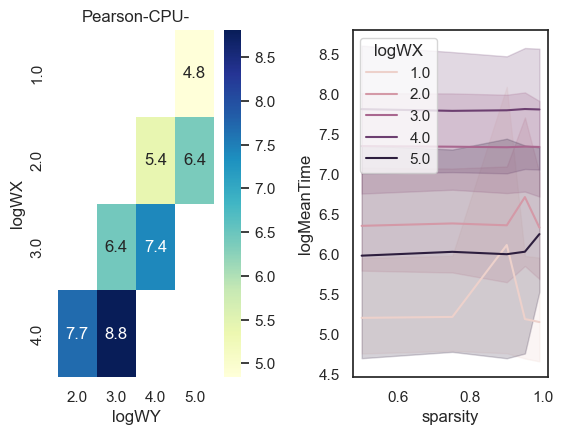

In [121]:
matrix = df[df['metric']=="pearson"]
matrix1= matrix[matrix["sparsity"]==0.50]
matrix1 = matrix1[matrix1["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')


fig, axs = plt.subplots(nrows=1,ncols=2)
plt.tight_layout(pad=3.0)
sns.heatmap(matrix1, cmap="YlGnBu", annot=True,ax=axs[0]).set_title("Pearson-CPU-")
#sns.lineplot(x="sparsity", y="logMeanTime",
#             hue="logWX", #style="event",
#             data=matrix,ax=axs[0][1])
sns.lineplot(x="sparsity", y="logMeanTime",
             hue="logWX", #style="event",
             data=matrix)

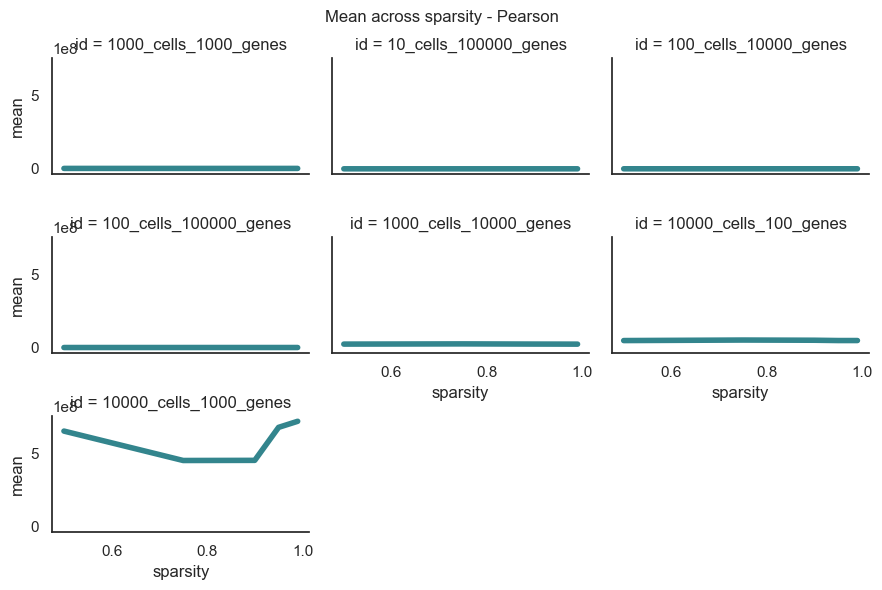

In [122]:
matrix = df[df['metric']=="pearson"]
matrix = matrix[matrix['method']=='CPU']

# g = sns.relplot(
#     data=matrix,
#     x="sparsity", y="mean", col="id", hue="method",
#     kind="line", palette="crest", linewidth=4, zorder=5,
#     col_wrap=3, height=2, aspect=1.5, legend=False,
# )
# g.fig.suptitle('Mean across sparsity - Pearson', fontsize=12)

g = sns.relplot(
    data=matrix,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
g.fig.suptitle('Mean across sparsity - Pearson', fontsize=12)
g.fig.subplots_adjust(top=0.9);

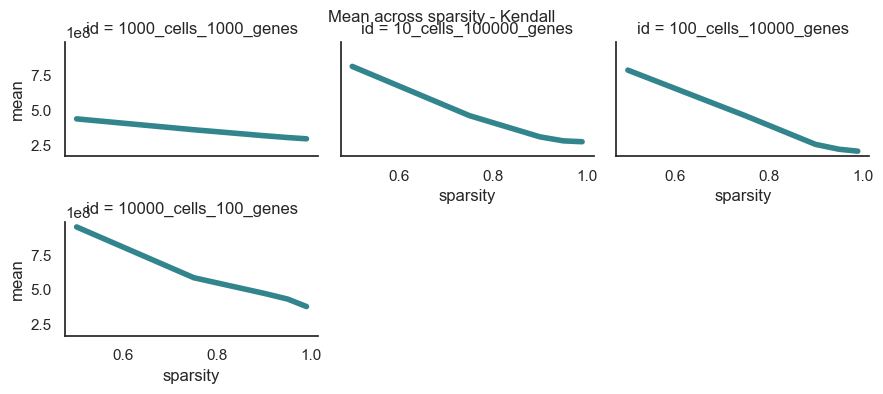

In [123]:
matrix = df[df['metric']=="kendall"]
matrix = matrix[matrix['method']=='CPU']

g = sns.relplot(
    data=matrix,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
g.fig.suptitle('Mean across sparsity - Kendall', fontsize=12)
g.fig.subplots_adjust(top=0.9);

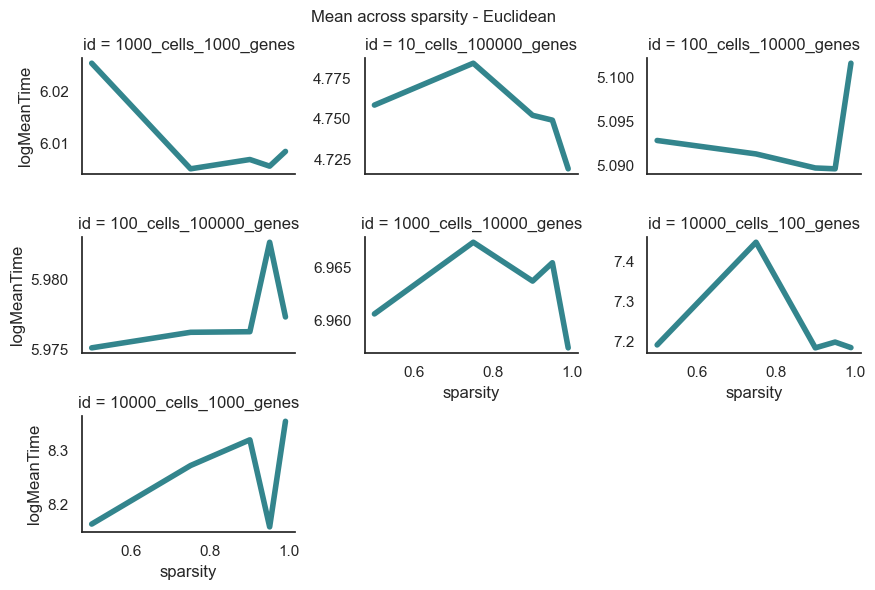

In [124]:
matrix = df[df['metric']=="euclidean"]
matrix = matrix[matrix['method']=='CPU']

matrix_2 = df[df['metric']=="pearson"]
matrix_2 = matrix_2[matrix_2['method']=='CPU']

matrix_3 = df[df['metric']=="kendall"]
matrix_3 = matrix_3[matrix_3['method']=='CPU']

df_matrix = df

# g = sns.relplot(
#     data=matrix,
#     x="sparsity", y="mean", col="id", hue="method",
#     kind="line", palette="crest", linewidth=4, zorder=5,
#     col_wrap=3, height=2, aspect=1.5, legend=False,
# )
# g.fig.suptitle('Mean across sparsity - Pearson', fontsize=12)

g = sns.relplot(
    data=matrix,
    x="sparsity", y="logMeanTime", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False, facet_kws=dict(sharey=False)
)
#g.axes[0].set_ylim(0,1)
g.fig.suptitle('Mean across sparsity - Euclidean', fontsize=12)
g.fig.subplots_adjust(top=0.9);

In [125]:
df = pd.read_csv(GENERATED_SPARSE_2_PATH,sep=" ")
#df = pd.read_csv('generatedData_bench_100iter.csv')

cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
weight=[]
unID=[]
w1=[]
w2=[]
w3 = []
w4= []
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-3].split('_')
    j=i.split('/')[-1][:-4]
    l = (i.split('/')[-2])
    i= i.split("_")

    w1.append(int(k[0]))
    w2.append(int(k[2]))
    w3.append(float(j))
    w4.append(l)

df['wX'] = w1
df['wY'] = w2
df['sparsity'] = w3
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
df['id'] = w4
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['invSparsity']=np.log10(1-df['sparsity'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
df

DataFile      method  size  \
0    ../../DistanceBenchmarking/GeneratedSparse/100...      CPU_Sp   100   
1    ../../DistanceBenchmarking/GeneratedSparse/100...      CPU_Sp   100   
2    ../../DistanceBenchmarking/GeneratedSparse/100...      CPU_Sp   100   
3    ../../DistanceBenchmarking/GeneratedSparse/100...      CPU_Sp   100   
4    ../../DistanceBenchmarking/GeneratedSparse/100...      CPU_Sp   100   
..                                                 ...         ...   ...   
118  ../../DistanceBenchmarking/GeneratedSparse/100...      GPU_Sp   100   
119  ../../DistanceBenchmarking/GeneratedSparse/100...      GPU_Sp   100   
120  ../../DistanceBenchmarking/GeneratedSparse/100...  factoextra   100   
121  ../../DistanceBenchmarking/GeneratedSparse/100...  factoextra   100   
122  ../../DistanceBenchmarking/GeneratedSparse/100...  factoextra   100   

        metric          mean            sd         val_1         val_2  \
0      pearson  6.373376e+04  7.106440e+04  4.827575e+04  1.114865e+05   
1      pearson  6.995854e+04  6.876221e+04  5.212450e+04  1.058560e+05   
2    euclidean  7.861751e+04  8.368728e+04  5.944550e+04  1.202570e+05   
3      pearson  9.448525e+04  7.781663e+04  6.888225e+04  1.050982e+05   
4    euclidean  1.385290e+05  7.370320e+04  1.308148e+05  2.398278e+05   
..         ...           ...           ...           ...           ...   
118    kendall  1.042161e+08  2.086044e+05  1.049130e+08  1.039161e+08   
119    kendall  1.091141e+08  3.031913e+05  1.102991e+08  1.090519e+08   
120    kendall  5.530680e+09  1.386208e+07  5.529435e+09  5.529609e+09   
121    kendall  5.056731e+09  4.443334e+06  5.059291e+09  5.061104e+09   
122    kendall  6.084106e+09  7.097297e+06  6.091487e+09  6.089856e+09   

            val_3         val_4  ...  sparsity  logWX  logWY  id  logMeanTime  \
0    2.322845e+05  2.547625e+04  ...      0.99    3.0    3.0         4.804370   
1    1.830938e+05  3.089800e+04  ...      0.95    3.0    3.0         4.844841   
2    2.277360e+05  3.619075e+04  ...      0.99    3.0    3.0         4.895519   
3    2.055892e+05  5.563100e+04  ...      0.90    3.0    3.0         4.975364   
4    2.858022e+05  9.634875e+04  ...      0.95    3.0    3.0         5.141541   
..            ...           ...  ...       ...    ...    ...  ..          ...   
118  1.041693e+08  1.041819e+08  ...      0.99    4.0    3.0         8.017935   
119  1.090141e+08  1.092113e+08  ...      0.90    4.0    3.0         8.037881   
120  5.531209e+09  5.555733e+09  ...      0.95    2.0    4.0         9.742778   
121  5.061325e+09  5.065894e+09  ...      0.99    2.0    4.0         9.703870   
122  6.094590e+09  6.097079e+09  ...      0.90    2.0    4.0         9.784197   

     logMinTime  logMaxTime  invSparsity       |W|              Method  
0      4.283256    5.366020     -2.00000   1000000      pearson_CPU_Sp  
1      4.424502    5.340164     -1.30103   1000000      pearson_CPU_Sp  
2      4.443693    5.435588     -2.00000   1000000    euclidean_CPU_Sp  
3      4.554625    5.398681     -1.00000   1000000      pearson_CPU_Sp  
4      4.946840    5.456802     -1.30103   1000000    euclidean_CPU_Sp  
..          ...         ...          ...       ...                 ...  
118    8.016683    8.020829     -2.00000  10000000      kendall_GPU_Sp  
119    8.036590    8.042572     -1.00000  10000000      kendall_GPU_Sp  
120    9.741852    9.745228     -1.30103   1000000  kendall_factoextra  
121    9.703399    9.704676     -2.00000   1000000  kendall_factoextra  
122    9.783657    9.785122     -1.00000   1000000  kendall_factoextra  

[123 rows x 45 columns]

In [126]:
matrix_sp = df
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']
df_full = df_full.append(matrix_sp)

df_full

DataFile  method   size  \
0    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
1    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
2    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
3    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
4    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
..                                                 ...     ...    ...   
110  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
111  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
112  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
113  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
114  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   

        metric        mean            sd        val_1       val_2       val_3  \
0      kendall  7621184.88  1.448788e+06  14548260.25  7146084.75  7471550.50   
1    euclidean  1107940.69  1.498401e+06   8300060.25   843103.75   808935.75   
2      pearson  4610701.78  1.501138e+06  11815922.75  4346568.50  4312413.50   
3      kendall  6784364.62  1.524808e+06  14094113.75  6623969.50  6440376.25   
4    euclidean  1120901.48  1.510871e+06   8371800.00   856583.25   811199.00   
..         ...         ...           ...          ...         ...         ...   
110    kendall    48658.71  4.714571e+04     43797.50    62226.25   125355.00   
111    kendall   120971.24  7.306413e+04    338462.25   170273.50   168756.00   
112    kendall   173755.70  9.921557e+04    508599.50   333263.25    99434.50   
113    kendall   358822.79  8.237999e+04    716335.50   465950.25   359270.75   
114    kendall   560306.96  1.333262e+05   1137354.75   717632.25   573993.25   

          val_4  ...  sparsity  logWX  logWY                     id  \
0    7480540.50  ...      0.50    3.0    3.0  1000_cells_1000_genes   
1     812474.00  ...      0.50    3.0    3.0  1000_cells_1000_genes   
2    4337095.00  ...      0.50    3.0    3.0  1000_cells_1000_genes   
3    6510551.00  ...      0.75    3.0    3.0  1000_cells_1000_genes   
4     817529.00  ...      0.75    3.0    3.0  1000_cells_1000_genes   
..          ...  ...       ...    ...    ...                    ...   
110    23468.50  ...      0.99    4.0    3.0                          
111    52821.75  ...      0.95    4.0    3.0                          
112   221112.00  ...      0.90    4.0    3.0                          
113   364167.50  ...      0.75    4.0    3.0                          
114   563003.50  ...      0.50    4.0    3.0                          

     logMeanTime  logMinTime  logMaxTime       |W|          Method  \
0       6.882022    6.852996    7.162811   1000000     kendall_GPU   
1       6.044517    5.900791    6.919081   1000000   euclidean_GPU   
2       6.663767    6.633393    7.072468   1000000     pearson_GPU   
3       6.831509    6.802929    7.149038   1000000     kendall_GPU   
4       6.049567    5.843307    6.922819   1000000   euclidean_GPU   
..           ...         ...         ...       ...             ...   
110     4.687161    4.177580    5.127028  10000000  kendall_CPU_Sp   
111     5.082682    4.695545    5.529510  10000000  kendall_CPU_Sp   
112     5.239939    4.973211    5.706376  10000000  kendall_CPU_Sp   
113     5.554880    5.362326    5.855116  10000000  kendall_CPU_Sp   
114     5.748426    5.633498    6.055896  10000000  kendall_CPU_Sp   

     invSparsity  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
110     -2.00000  
111     -1.30103  
112     -1.00000  
113     -0.60206  
114     -0.30103  

[683 rows x 45 columns]

In [127]:
matrix_sp = df[df['metric']=="pearson"]
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']
#matrix1= matrix[matrix["sparsity"]==0.50]
matrix_sp
#matrix1 = matrix1[matrix1["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')


# fig, axs = plt.subplots(nrows=2,ncols=2)
# plt.tight_layout(pad=3.0)
# sns.heatmap(matrix1, cmap="YlGnBu", annot=True,ax=axs[0][0]).set_title("Euclidean-CPU-")
# #sns.lineplot(x="sparsity", y="logMeanTime",
# #             hue="logWX", #style="event",
# #             data=matrix,ax=axs[0][1])
# sns.lineplot(x="sparsity", y="logMeanTime",
#              hue="logWX", #style="event",
#              data=matrix)

DataFile  method  size   metric  \
0   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
1   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
3   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
5   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
7   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
11  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
12  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
13  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
15  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
17  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
20  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
21  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
22  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
24  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
27  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
30  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
31  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
33  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
34  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
35  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
37  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
40  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
42  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
44  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
45  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
46  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
47  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
49  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
50  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
52  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
54  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
55  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
59  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
61  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
62  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
64  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
66  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
67  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
69  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
71  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
73  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
75  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
79  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
84  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   
87  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp   100  pearson   

           mean            sd        val_1        val_2        val_3  \
0      63733.76  7.106440e+04     48275.75    111486.50    232284.50   
1      69958.54  6.876221e+04     52124.50    105856.00    183093.75   
3      94485.25  7.781663e+04     68882.25    105098.25    205589.25   
5     161324.75  9.704279e+04    414857.25    311513.50    312786.25   
7   

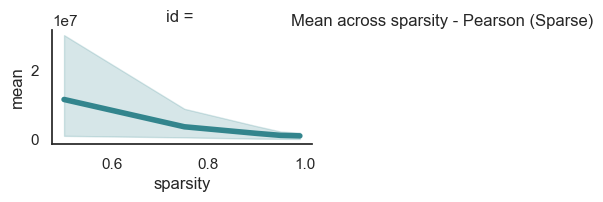

In [128]:
g = sns.relplot(
    data=matrix_sp,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False, facet_kws=dict(sharey=False)
)
g.fig.suptitle('Mean across sparsity - Pearson (Sparse)', fontsize=12)
g.fig.subplots_adjust(top=0.9);

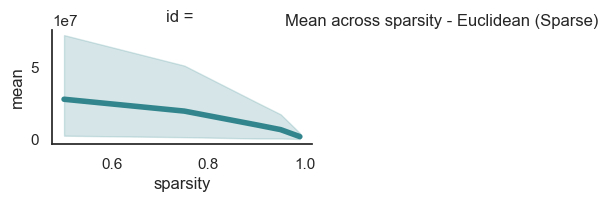

In [129]:
matrix_sp = df[df['metric']=="euclidean"]
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']

g = sns.relplot(
    data=matrix_sp,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False, facet_kws=dict(sharey=False)
)
g.fig.suptitle('Mean across sparsity - Euclidean (Sparse)', fontsize=12)
g.fig.subplots_adjust(top=0.9);

In [130]:
df2 = df.dropna()
dfl = pd.DataFrame()
dfl['method'] = df2['Method'] #df2['metric']+'_'+df2['method']
dfl['cells'] = df2['logWX']
dfl['peaks'] = df2['logWY']
dfl['logW'] = np.log10(df2['|W|'])
dfl['time'] = df2['logMeanTime']
dfl['sparsity'] = df2['sparsity']


method = 'euclidean'
method_lower = method.lower()
dfl

method  cells  peaks  logW      time  sparsity
0        pearson_CPU_Sp    3.0    3.0   6.0  4.804370      0.99
1        pearson_CPU_Sp    3.0    3.0   6.0  4.844841      0.95
2      euclidean_CPU_Sp    3.0    3.0   6.0  4.895519      0.99
3        pearson_CPU_Sp    3.0    3.0   6.0  4.975364      0.90
4      euclidean_CPU_Sp    3.0    3.0   6.0  5.141541      0.95
..                  ...    ...    ...   ...       ...       ...
118      kendall_GPU_Sp    4.0    3.0   7.0  8.017935      0.99
119      kendall_GPU_Sp    4.0    3.0   7.0  8.037881      0.90
120  kendall_factoextra    2.0    4.0   6.0  9.742778      0.95
121  kendall_factoextra    2.0    4.0   6.0  9.703870      0.99
122  kendall_factoextra    2.0    4.0   6.0  9.784197      0.90

[123 rows x 6 columns]

In [131]:
from matplotlib.colors import BoundaryNorm
cmap = plt.get_cmap()
cmap.N
norm_p      = BoundaryNorm(np.linspace(3, 11.0, 19), ncolors=cmap.N, clip=True)
norm_s      = BoundaryNorm(np.linspace(0, 1.0, 19), ncolors=cmap.N, clip=True)

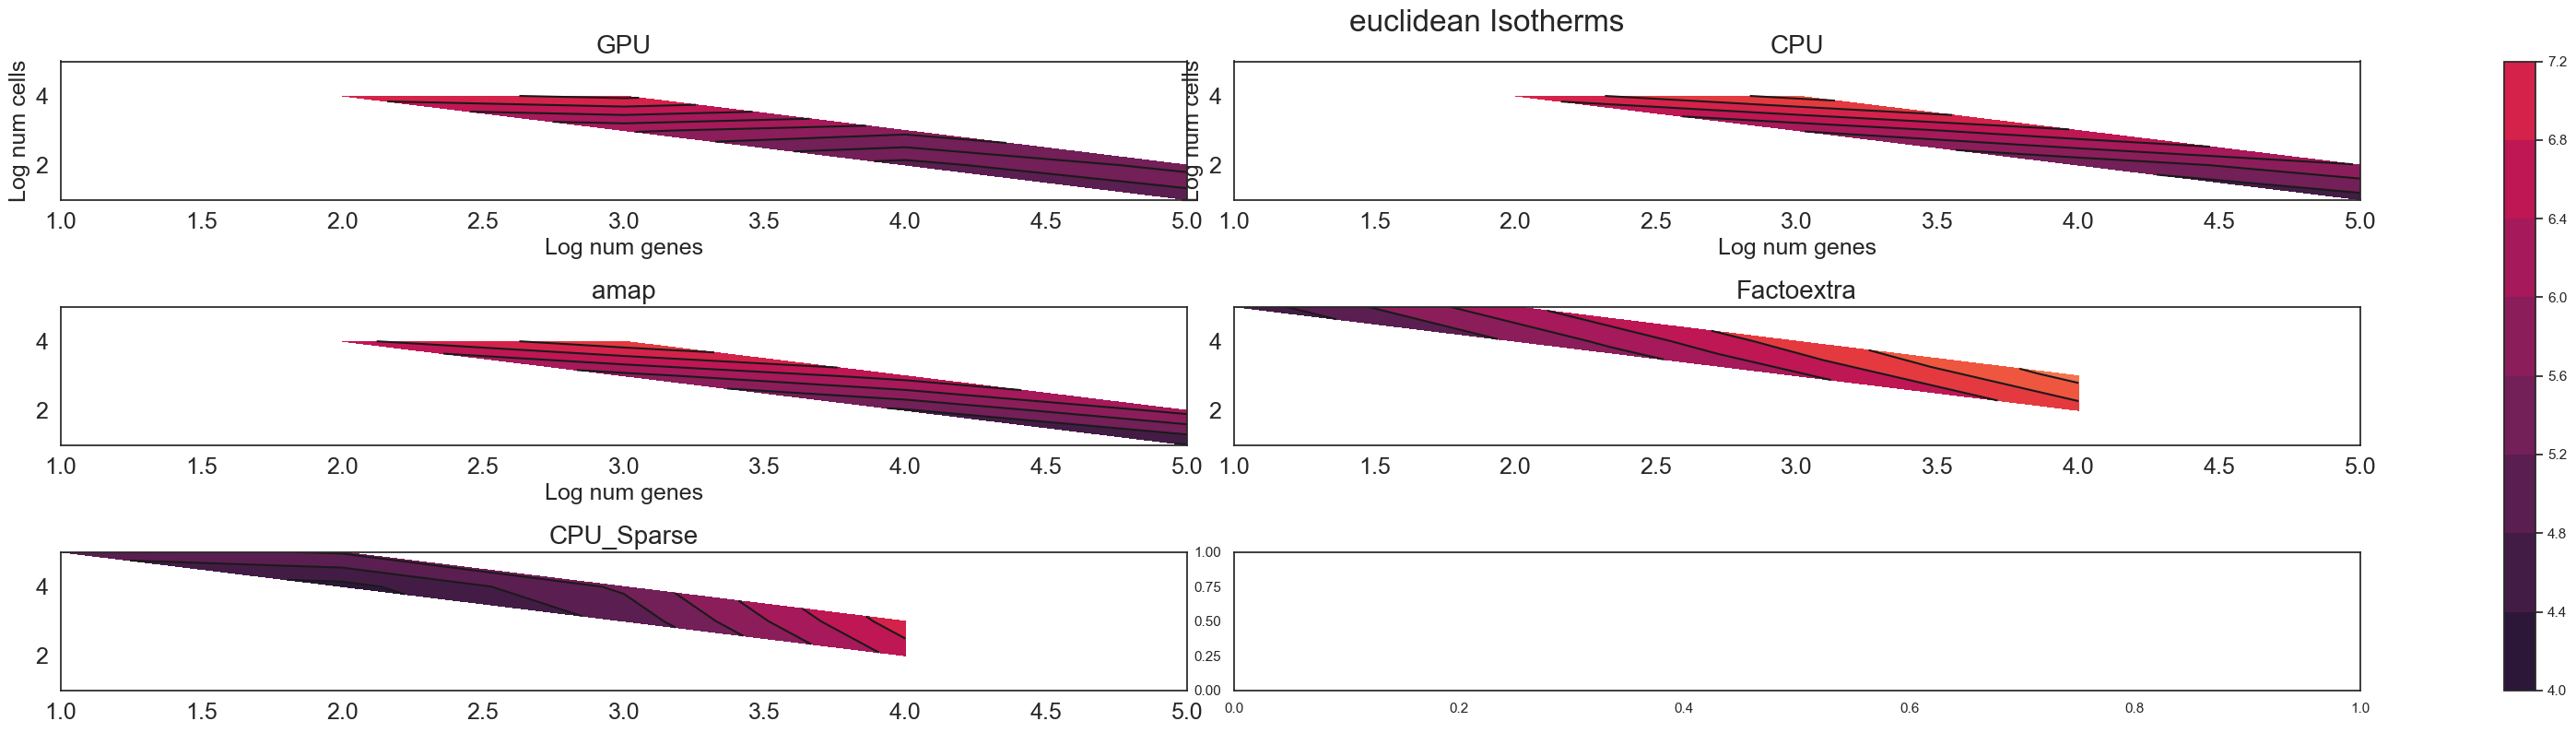

In [132]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)
fig.tight_layout(h_pad=5)
current_dfr = dfr[dfr.method == f'{method_lower}_GPU']

current_axis = ax[0][0]
current_axis.set_title('GPU', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('Log num genes', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)
contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0][1]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('Log num genes', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_amap']
current_axis = ax[1][0]
current_axis.set_title(f'amap', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('Log num genes', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)
contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_factoextra']
#print(current_dfr)
current_axis = ax[1][1]
current_axis.set_title('Factoextra', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[2][0]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)


fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

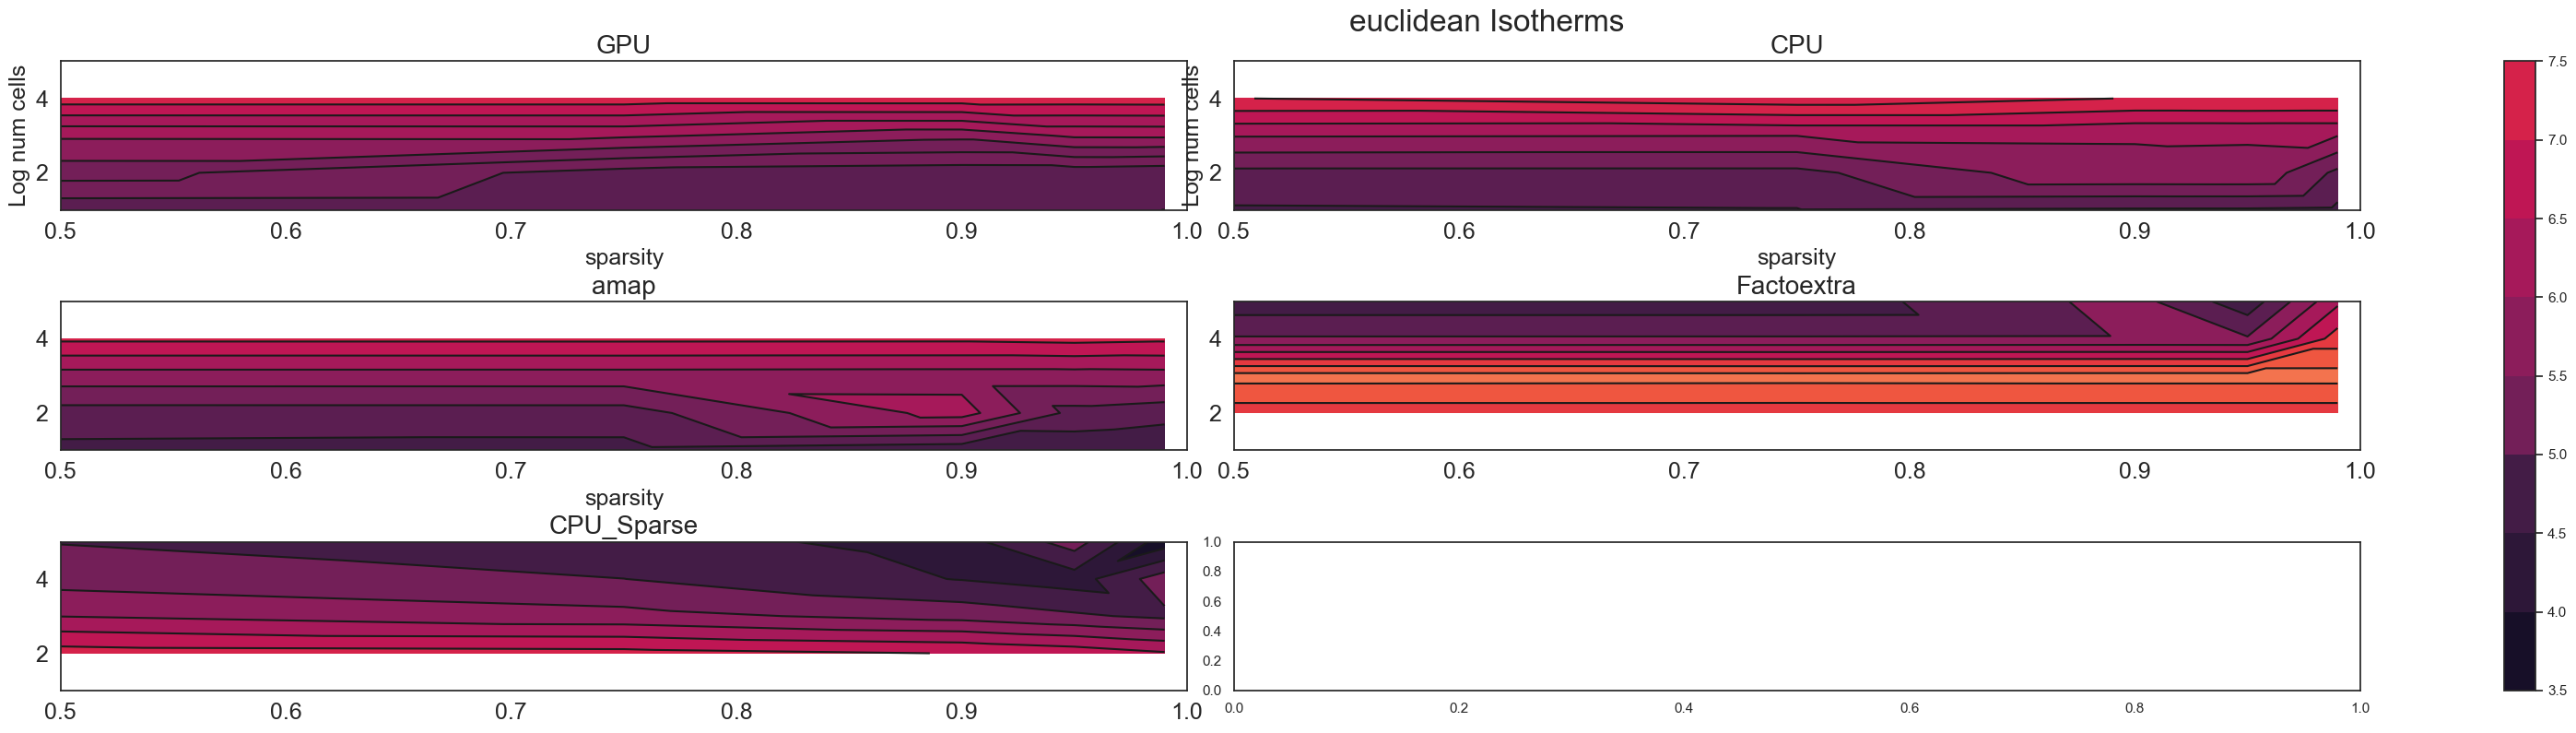

In [133]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)
fig.tight_layout(h_pad=4)
current_dfr = dfr[dfr.method == f'{method_lower}_GPU']

current_axis = ax[0][0]
current_axis.set_title('GPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0][1]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_amap']
current_axis = ax[1][0]
current_axis.set_title(f'amap', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_factoextra']
#print(current_dfr)
current_axis = ax[1][1]
current_axis.set_title('Factoextra', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[2][0]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

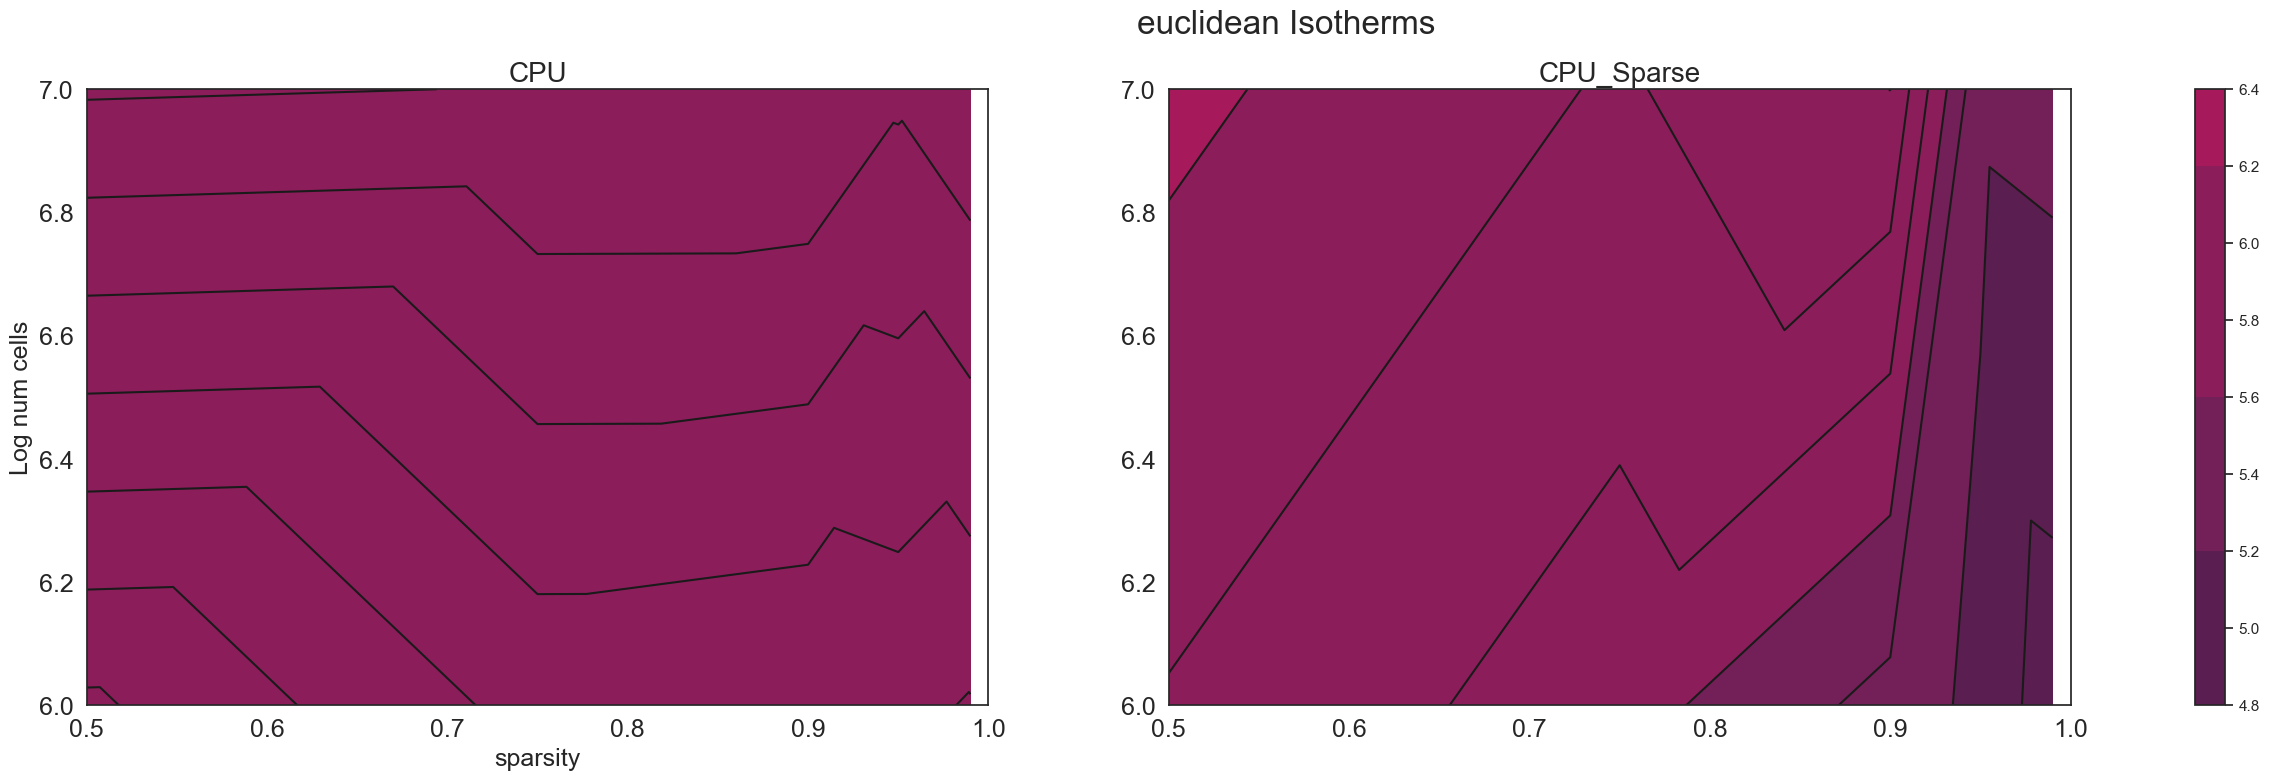

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[1]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

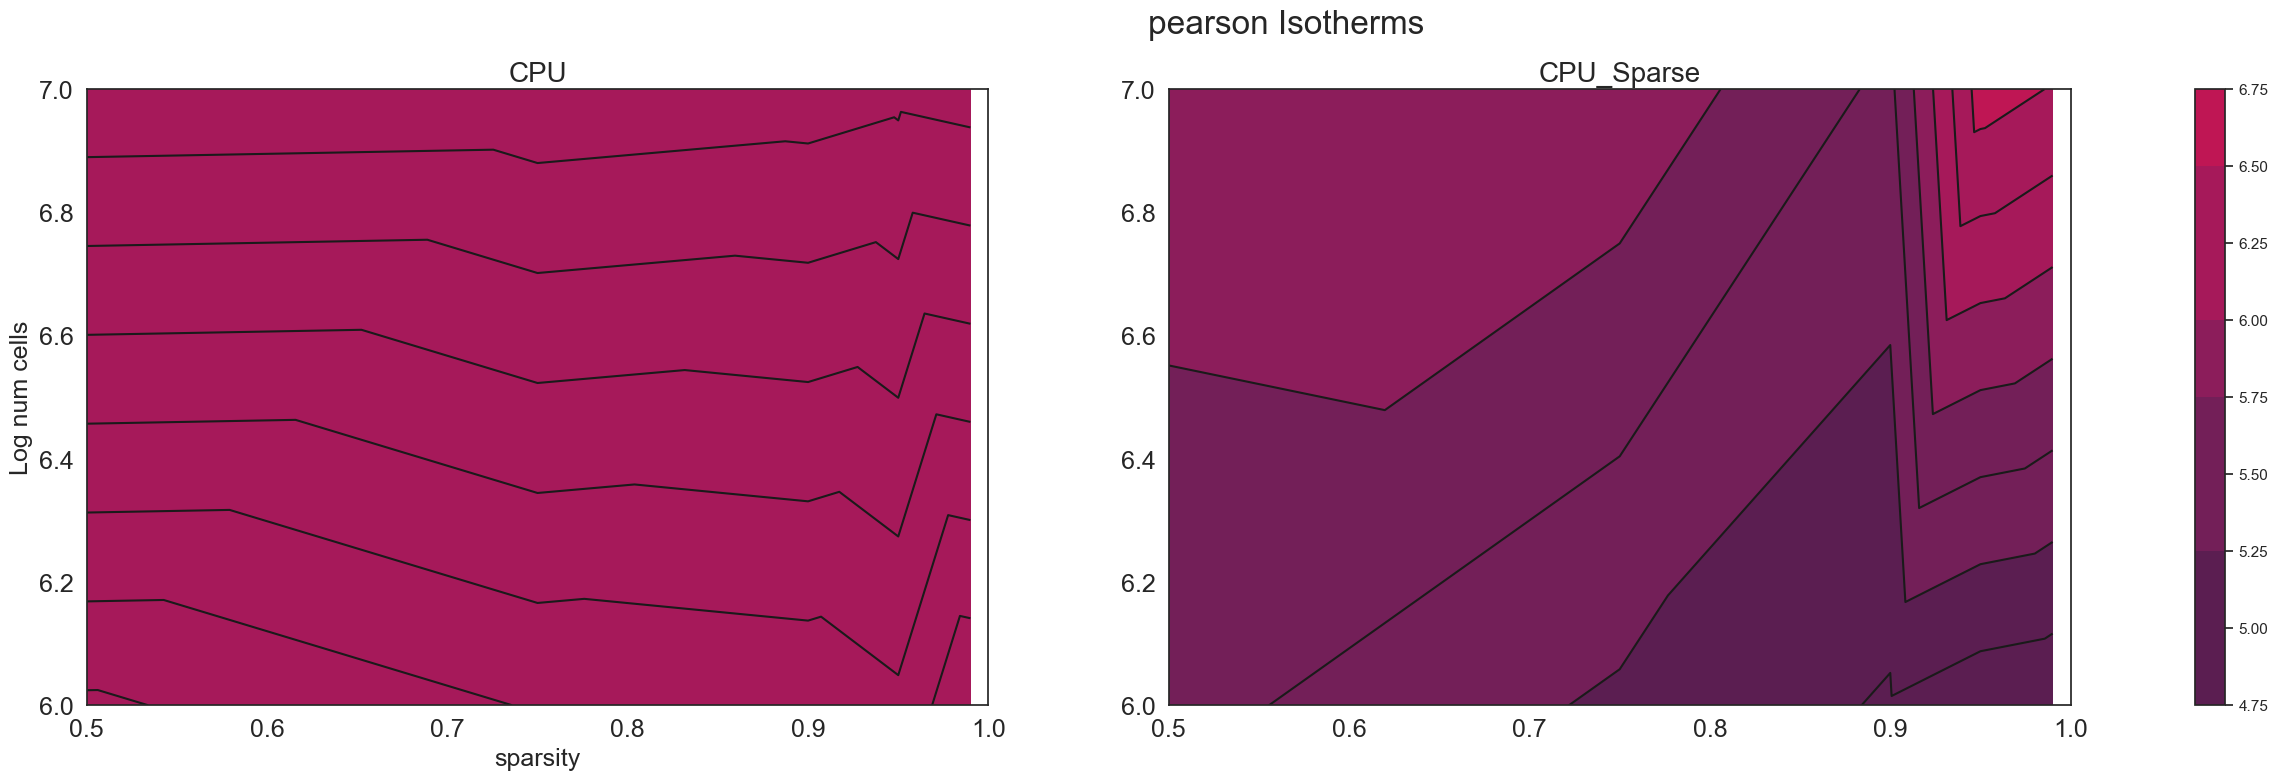

In [135]:
method = 'pearson'
method_lower = method.lower()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[1]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

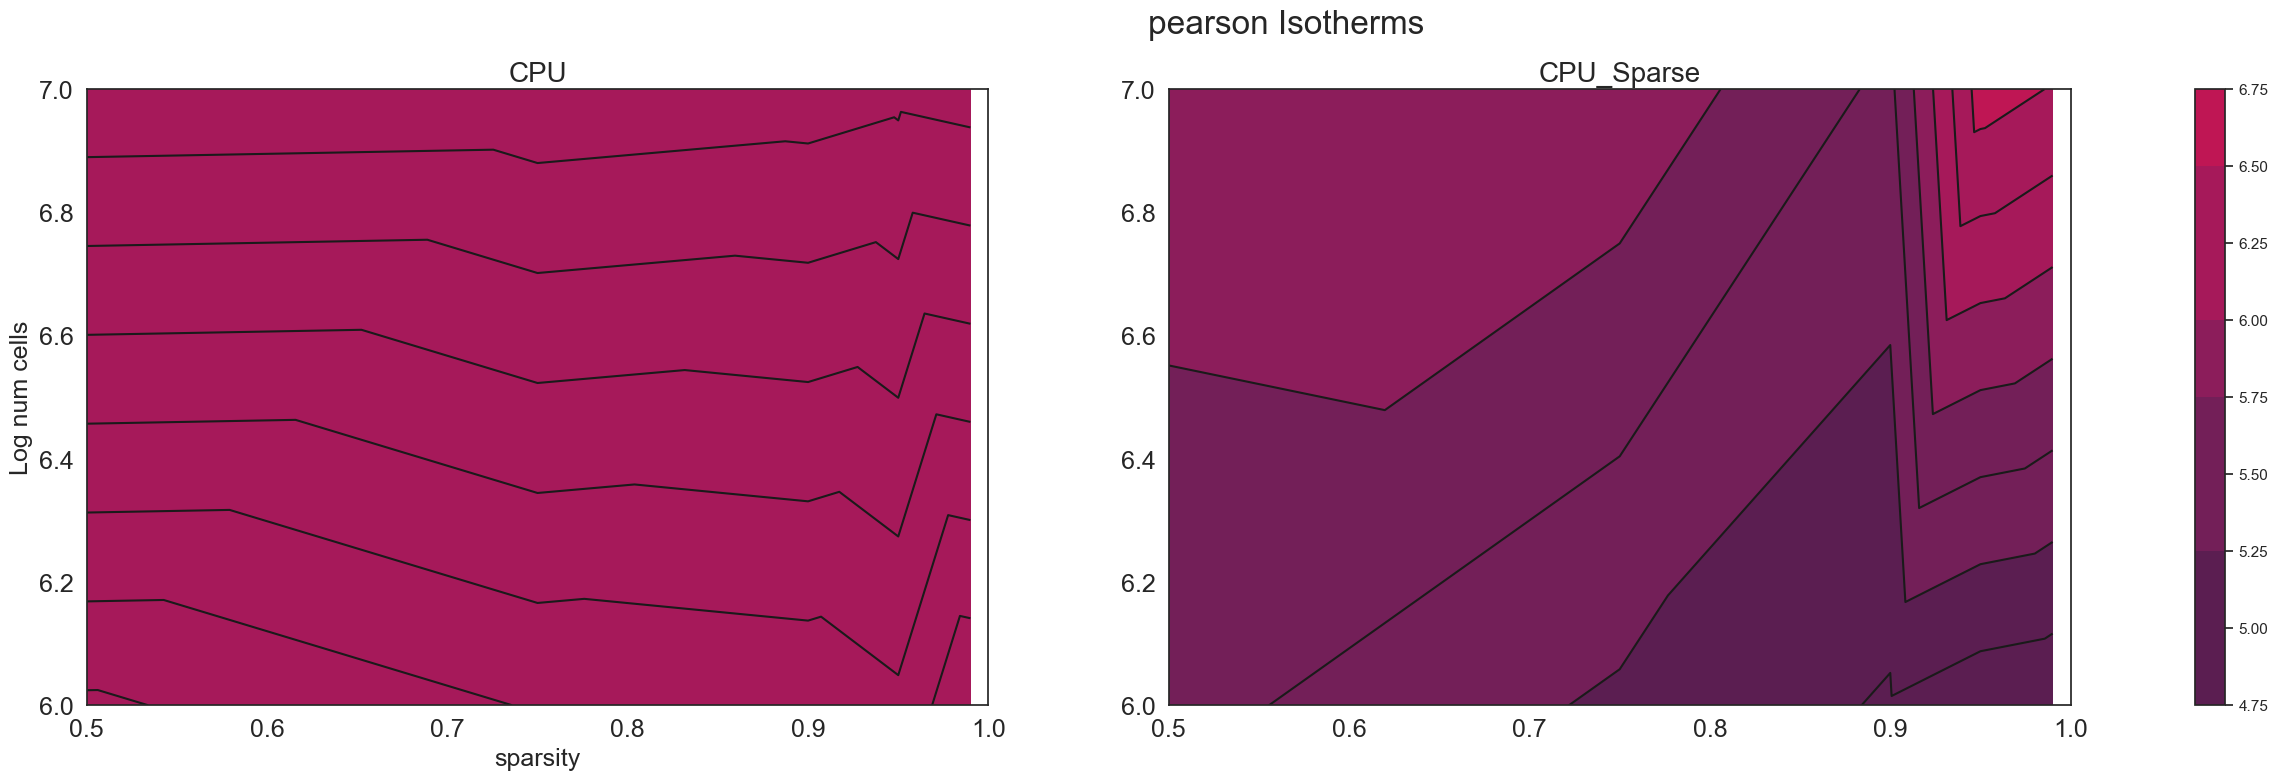

In [136]:
method = 'pearson'
method_lower = method.lower()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[1]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

In [137]:
matrix_sp = df[df['metric']=="euclidean"]
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']
matrix = matrix.append(matrix_sp)
matrix

DataFile  method   size  \
31  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
34  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
37  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
40  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
43  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
..                                                ...     ...    ...   
83  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
85  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
86  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
88  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
89  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   

       metric          mean            sd         val_1         val_2  \
31  euclidean  1.060338e+06  4.459567e+04  1.257269e+06  1.053345e+06   
34  euclidean  1.012111e+06  4.056709e+04  1.165730e+06  1.006538e+06   
37  euclidean  1.013288e+06  4.063239e+04  1.186202e+06  1.007016e+06   
40  euclidean  1.019900e+06  3.850973e+04  1.187693e+06  1.002184e+06   
43  euclidean  1.016266e+06  4.012844e+04  1.161683e+06  9.867658e+05   
..        ...           ...           ...           ...           ...   
83  euclidean  1.692883e+07  1.011958e+06  1.929502e+07  1.883440e+07   
85  euclidean  4.817599e+07  8.554826e+06  4.598121e+07  4.191384e+07   
86  euclidean  7.134775e+07  9.993926e+06  9.768541e+07  1.017334e+08   
88  euclidean  1.436580e+08  1.815745e+07  1.544098e+08  2.137308e+08   
89  euclidean  1.984455e+08  1.089220e+07  2.139871e+08  2.375272e+08   

           val_3         val_4  ...  sparsity  logWX  logWY  \
31  1.069194e+06  1.048710e+06  ...      0.50    3.0    3.0   
34  1.005963e+06  1.023877e+06  ...      0.75    3.0    3.0   
37  1.005248e+06  1.017146e+06  ...      0.95    3.0    3.0   
40  1.008278e+06  1.011074e+06  ...      0.99    3.0    3.0   
43  9.899312e+05  1.025038e+06  ...      0.90    3.0    3.0   
..           ...           ...  ...       ...    ...    ...   
83  1.860579e+07  1.861929e+07  ...      0.50    2.0    4.0   
85  5.285951e+07  5.130624e+07  ...      0.95    3.0    4.0   
86  8.965481e+07  7.300138e+07  ...      0.90    3.0    4.0   
88  1.403733e+08  1.808756e+08  ...      0.75    3.0    4.0   
89  1.951034e+08  2.022133e+08  ...      0.50    3.0    4.0   

                       id  logMeanTime  logMinTime  logMaxTime       |W|  \
31  1000_cells_1000_genes     6.025445    6.011221    6.099428   1000000   
34  1000_cells_1000_genes     6.005228    5.957877    6.066598   1000000   
37  1000_cells_1000_genes     6.005733    5.972622    6.074159   1000000   
40  1000_cells_1000_genes     6.008557    5.994771    6.074704   1000000   
43  1000_cells_1000_genes     6.007008    5.961623    6.065088   1000000   
..                    ...          ...         ...         ...       ...   
83                            7.228627    7.208142    7.285445   1000000   
85                            7.682831    7.615695    7.872543  10000000   
86                            7.853380    7.817621    8.007464  10000000   
88                            8.157330    8.119248    8.329867  10000000   
89                            8.297641    8.278701    8.375713  10000000   

              Method  invSparsity  
31     euclidean_CPU          NaN  
34     euclidean_CPU          NaN  
37     euclidean_CPU          NaN  
40     euclidean_CPU          NaN  
43     euclidean_CPU          NaN  
..               ...          ...  
83  euclidean_CPU_Sp     -0.30103  
85  euclidean_CPU_Sp     -1.30103  
86  euclidean_CPU_Sp     -1.00000  
88  euclidean_CPU_Sp     -0.60206  
89  euclidean_CPU_Sp     -0.30103  

[80 rows x 45 columns]

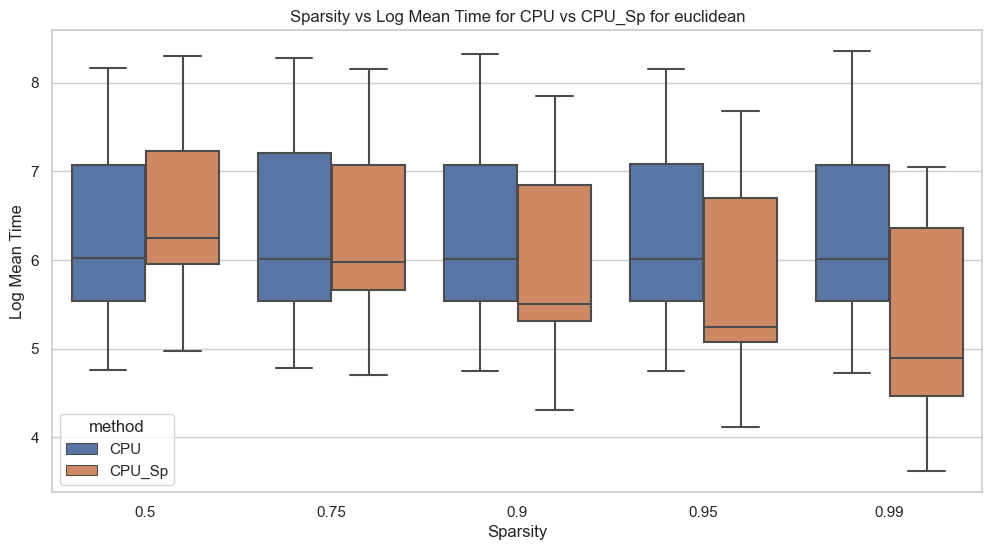

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = matrix

# Filter data for CPU and CPU_Sp methods
filtered_data = data[data['method'].isin(['CPU', 'CPU_Sp'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)

# Add title and labels
plt.title('Sparsity vs Log Mean Time for CPU vs CPU_Sp for euclidean')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


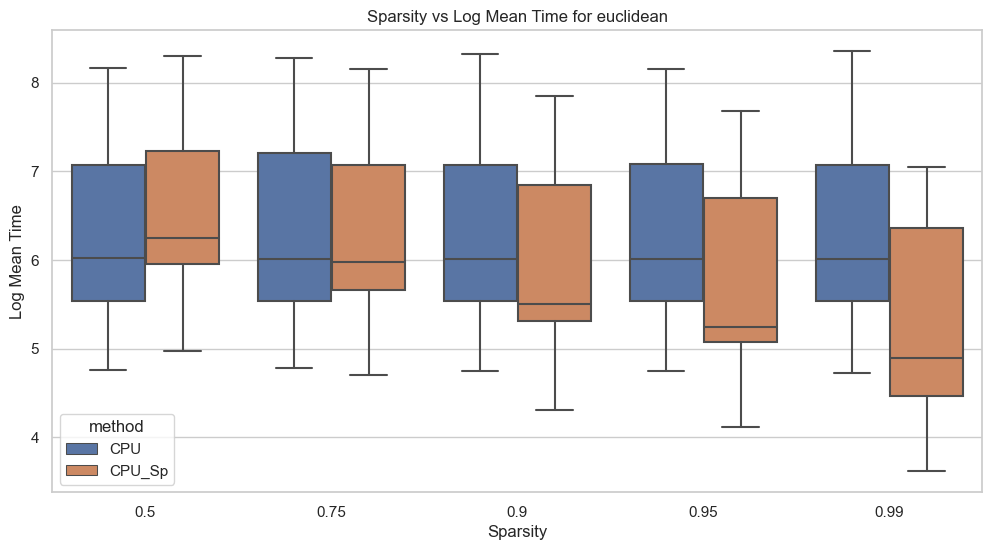

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = matrix

# Filter data for CPU and CPU_Sp methods
filtered_data = data[data['method'].isin(['CPU', 'CPU_Sp'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=data)

# Add title and labels
plt.title('Sparsity vs Log Mean Time for euclidean')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


In [140]:
data

DataFile  method   size  \
31  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
34  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
37  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
40  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
43  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
..                                                ...     ...    ...   
83  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
85  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
86  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
88  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
89  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   

       metric          mean            sd         val_1         val_2  \
31  euclidean  1.060338e+06  4.459567e+04  1.257269e+06  1.053345e+06   
34  euclidean  1.012111e+06  4.056709e+04  1.165730e+06  1.006538e+06   
37  euclidean  1.013288e+06  4.063239e+04  1.186202e+06  1.007016e+06   
40  euclidean  1.019900e+06  3.850973e+04  1.187693e+06  1.002184e+06   
43  euclidean  1.016266e+06  4.012844e+04  1.161683e+06  9.867658e+05   
..        ...           ...           ...           ...           ...   
83  euclidean  1.692883e+07  1.011958e+06  1.929502e+07  1.883440e+07   
85  euclidean  4.817599e+07  8.554826e+06  4.598121e+07  4.191384e+07   
86  euclidean  7.134775e+07  9.993926e+06  9.768541e+07  1.017334e+08   
88  euclidean  1.436580e+08  1.815745e+07  1.544098e+08  2.137308e+08   
89  euclidean  1.984455e+08  1.089220e+07  2.139871e+08  2.375272e+08   

           val_3         val_4  ...  sparsity  logWX  logWY  \
31  1.069194e+06  1.048710e+06  ...      0.50    3.0    3.0   
34  1.005963e+06  1.023877e+06  ...      0.75    3.0    3.0   
37  1.005248e+06  1.017146e+06  ...      0.95    3.0    3.0   
40  1.008278e+06  1.011074e+06  ...      0.99    3.0    3.0   
43  9.899312e+05  1.025038e+06  ...      0.90    3.0    3.0   
..           ...           ...  ...       ...    ...    ...   
83  1.860579e+07  1.861929e+07  ...      0.50    2.0    4.0   
85  5.285951e+07  5.130624e+07  ...      0.95    3.0    4.0   
86  8.965481e+07  7.300138e+07  ...      0.90    3.0    4.0   
88  1.403733e+08  1.808756e+08  ...      0.75    3.0    4.0   
89  1.951034e+08  2.022133e+08  ...      0.50    3.0    4.0   

                       id  logMeanTime  logMinTime  logMaxTime       |W|  \
31  1000_cells_1000_genes     6.025445    6.011221    6.099428   1000000   
34  1000_cells_1000_genes     6.005228    5.957877    6.066598   1000000   
37  1000_cells_1000_genes     6.005733    5.972622    6.074159   1000000   
40  1000_cells_1000_genes     6.008557    5.994771    6.074704   1000000   
43  1000_cells_1000_genes     6.007008    5.961623    6.065088   1000000   
..                    ...          ...         ...         ...       ...   
83                            7.228627    7.208142    7.285445   1000000   
85                            7.682831    7.615695    7.872543  10000000   
86                            7.853380    7.817621    8.007464  10000000   
88                            8.157330    8.119248    8.329867  10000000   
89                            8.297641    8.278701    8.375713  10000000   

              Method  invSparsity  
31     euclidean_CPU          NaN  
34     euclidean_CPU          NaN  
37     euclidean_CPU          NaN  
40     euclidean_CPU          NaN  
43     euclidean_CPU          NaN  
..               ...          ...  
83  euclidean_CPU_Sp     -0.30103  
85  euclidean_CPU_Sp     -1.30103  
86  euclidean_CPU_Sp     -1.00000  
88  euclidean_CPU_Sp     -0.60206  
89  euclidean_CPU_Sp     -0.30103  

[80 rows x 45 columns]

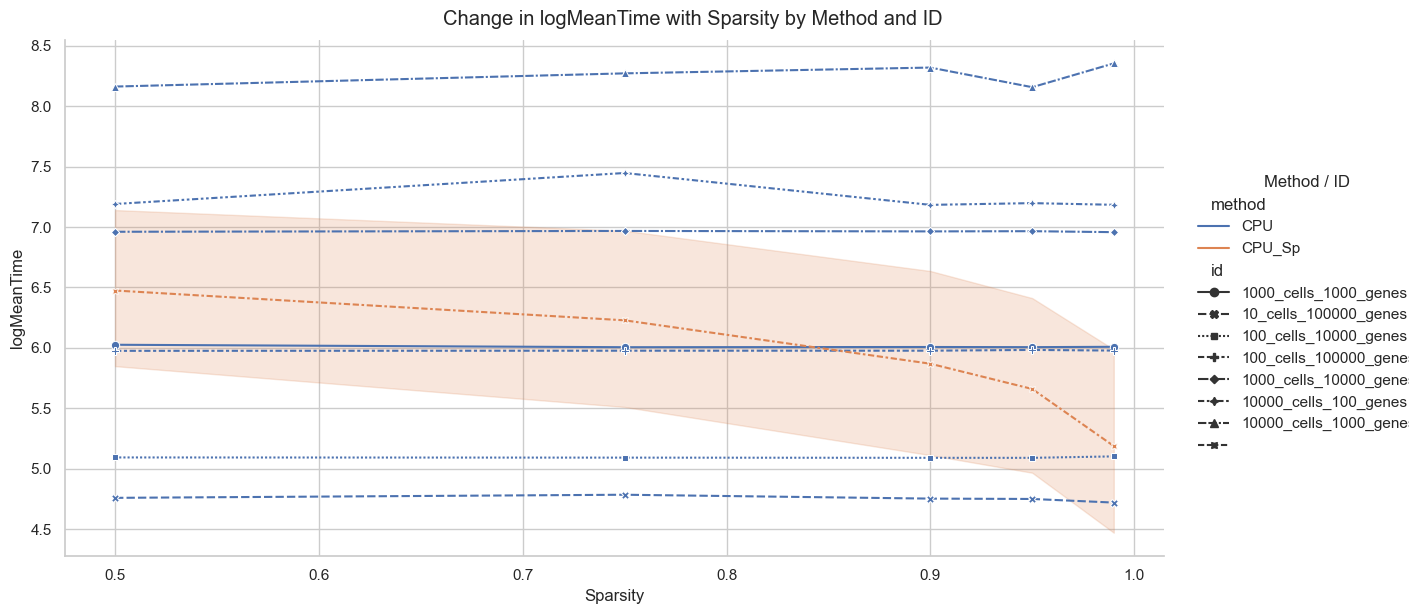

In [141]:
data_columns = ['method', 'sparsity', 'id', 'logMeanTime']
data = matrix[data_columns]
filtered_data = data[data['method'].isin(['CPU','CPU_Sp'])]
# Create the plot using Seaborn's relplot
plot = sns.relplot(
    data=filtered_data,
    x='sparsity', y='logMeanTime', hue='method',
    style='id', kind='line', markers=True,
    aspect=2, height=6
)

# Set plot title and labels
plot.fig.suptitle("Change in logMeanTime with Sparsity by Method and ID", y=1.02)
plot.set(xlabel="Sparsity", ylabel="logMeanTime")

# Customize legend position and title
plot._legend.set_bbox_to_anchor((1, 0.5))
plot._legend.set_title("Method / ID")

# Show the plot
plt.show()

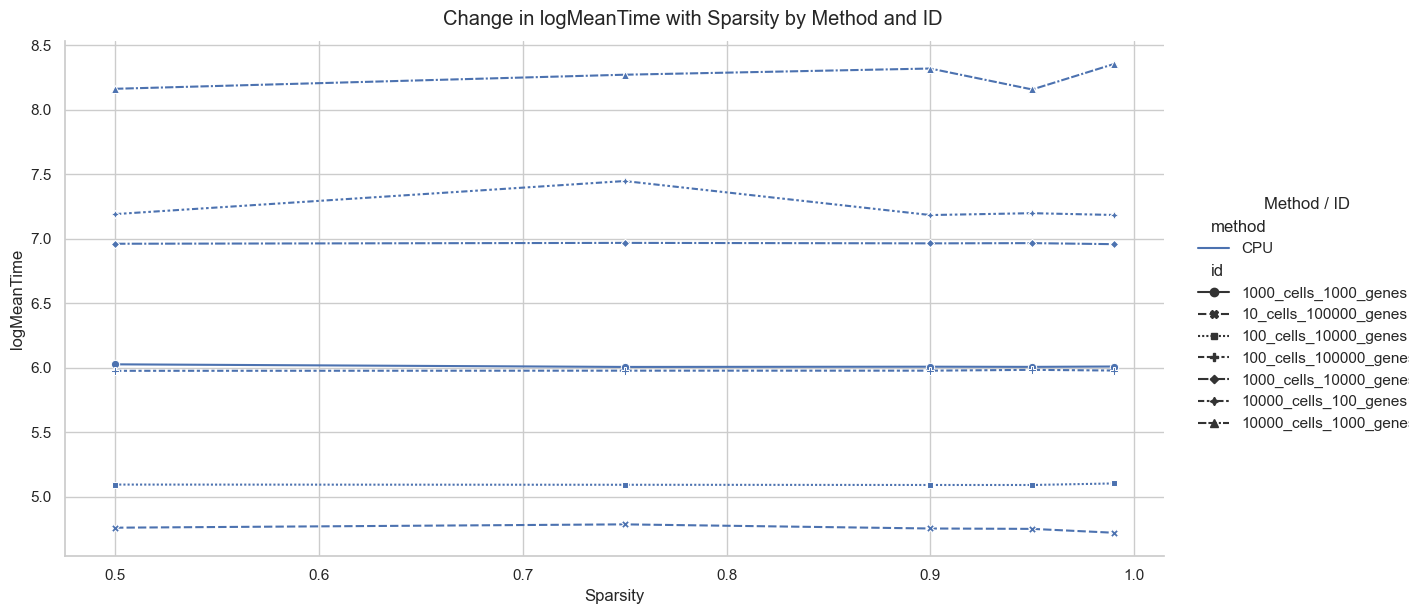

In [142]:
data_columns = ['method', 'sparsity', 'id', 'logMeanTime']
data = matrix[data_columns]
filtered_data = data[data['method'].isin(['CPU'])]
# Create the plot using Seaborn's relplot
plot = sns.relplot(
    data=filtered_data,
    x='sparsity', y='logMeanTime', hue='method',
    style='id', kind='line', markers=True,
    aspect=2, height=6
)

# Set plot title and labels
plot.fig.suptitle("Change in logMeanTime with Sparsity by Method and ID", y=1.02)
plot.set(xlabel="Sparsity", ylabel="logMeanTime")

# Customize legend position and title
plot._legend.set_bbox_to_anchor((1, 0.5))
plot._legend.set_title("Method / ID")

# Show the plot
plt.show()

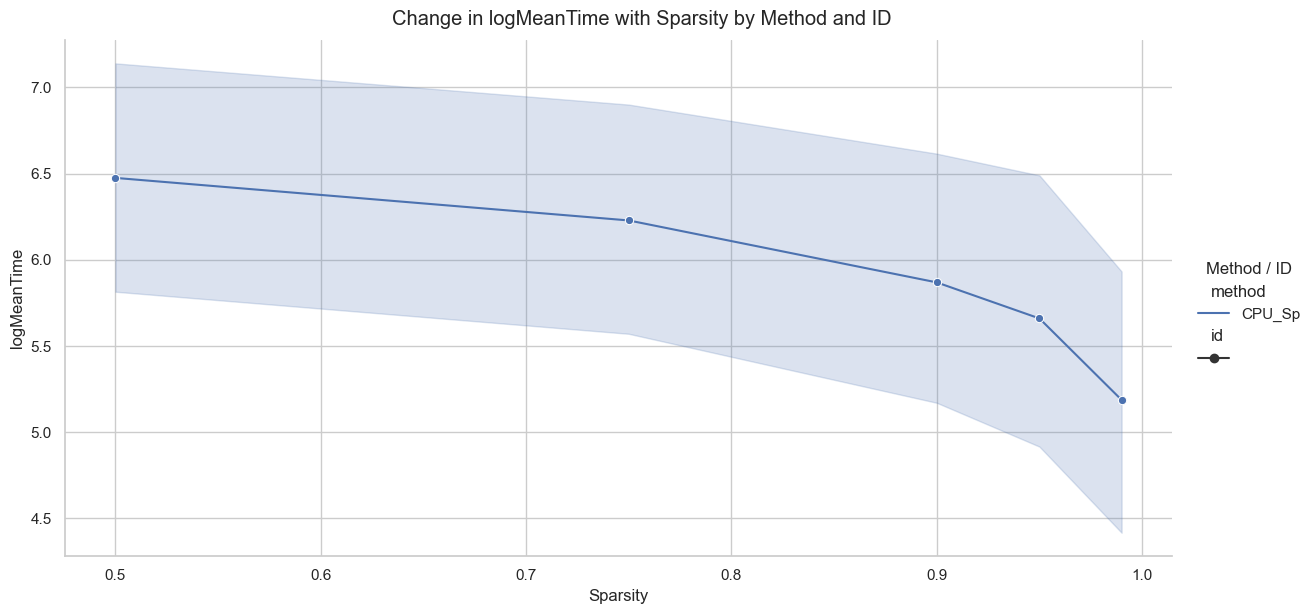

In [143]:
data_columns = ['method', 'sparsity', 'id', 'logMeanTime']
data = matrix[data_columns]
filtered_data = data[data['method'].isin(['CPU_Sp'])]
# Create the plot using Seaborn's relplot
plot = sns.relplot(
    data=filtered_data,
    x='sparsity', y='logMeanTime', hue='method',
    style='id', kind='line', markers=True,
    aspect=2, height=6
)

# Set plot title and labels
plot.fig.suptitle("Change in logMeanTime with Sparsity by Method and ID", y=1.02)
plot.set(xlabel="Sparsity", ylabel="logMeanTime")

# Customize legend position and title
plot._legend.set_bbox_to_anchor((1, 0.5))
plot._legend.set_title("Method / ID")

# Show the plot
plt.show()

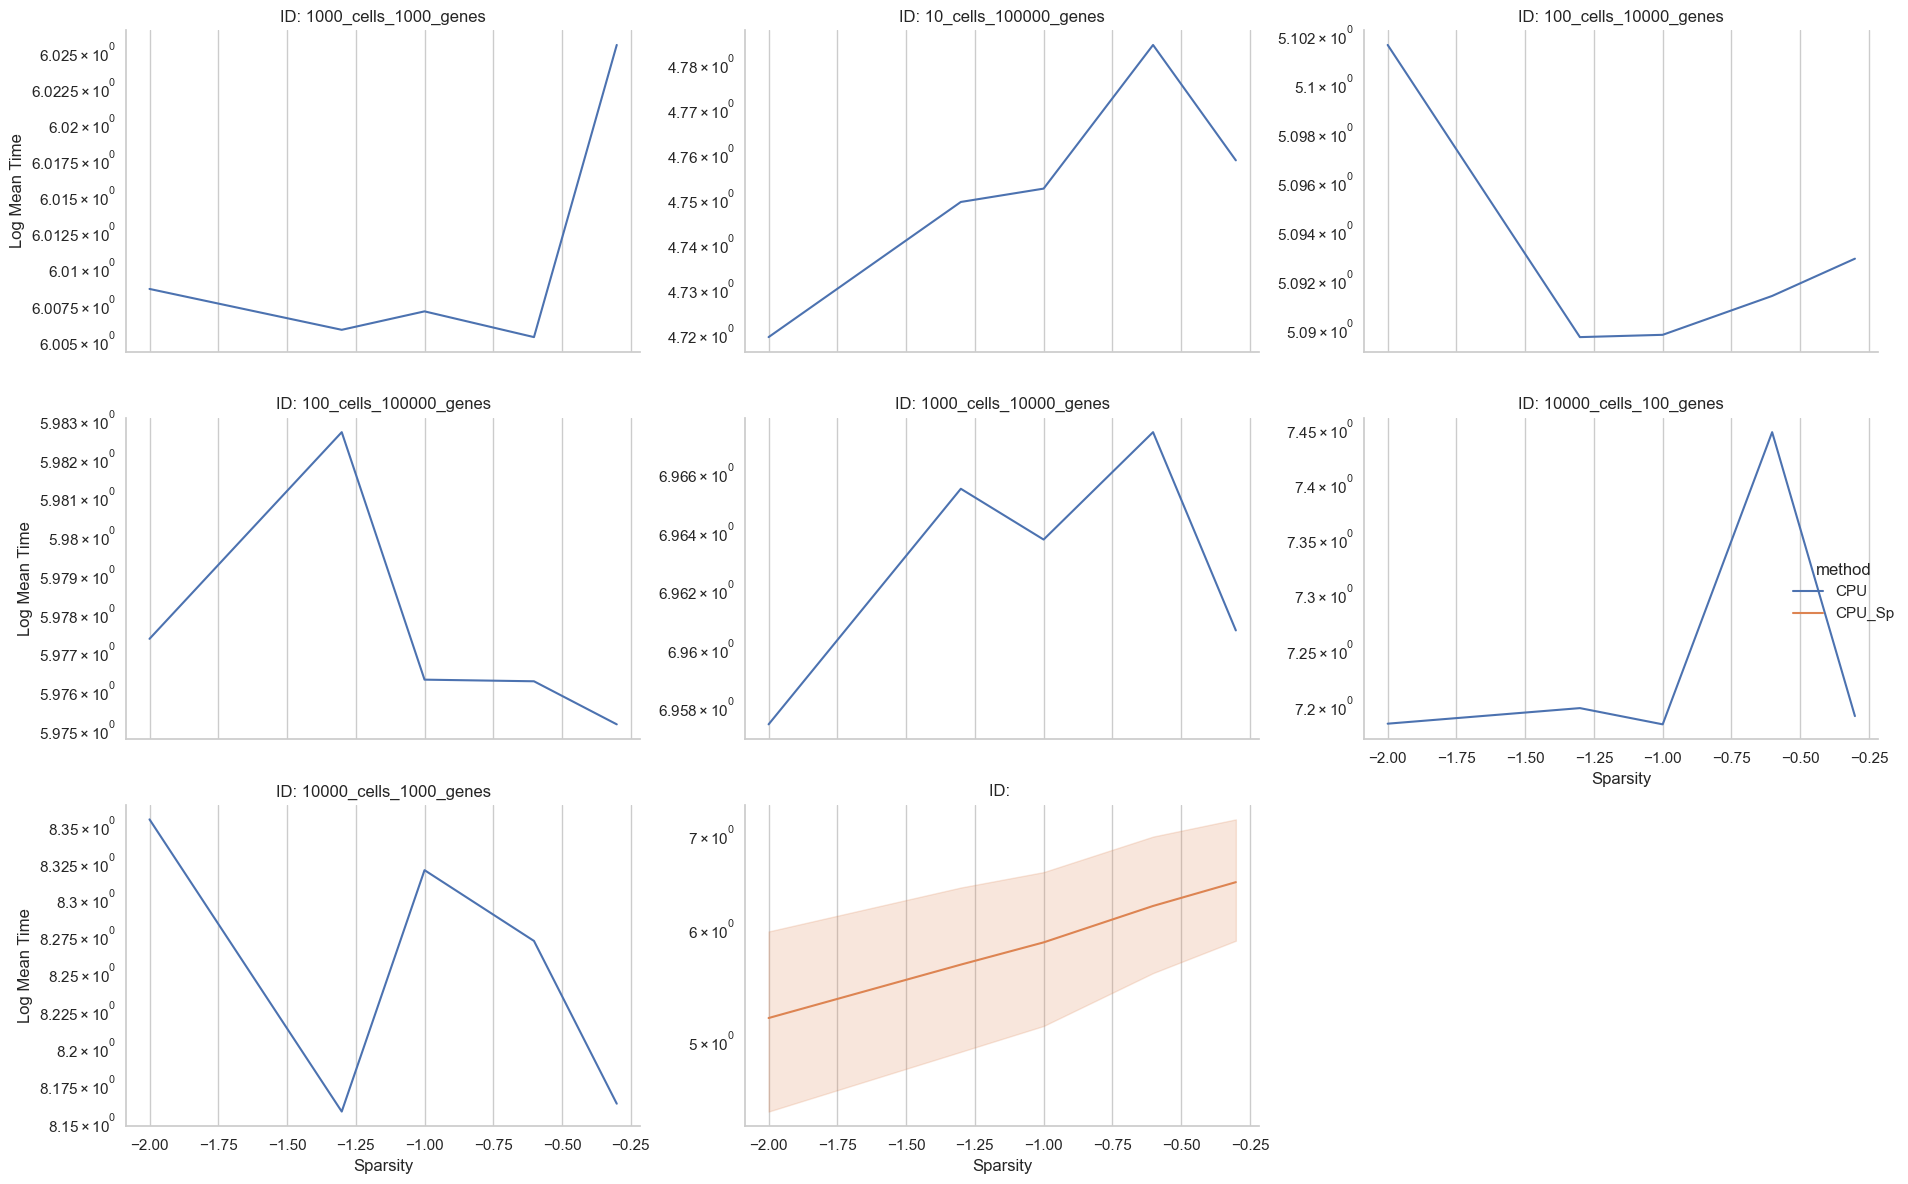

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = matrix
data['invSp'] = np.log10(1-data['sparsity'])

# Create a relplot using Seaborn
g = sns.relplot(
    data=data,
    x="invSp",
    y="logMeanTime",
    hue="method",
    col="id",
    kind="line",
    facet_kws={"sharey": False},  # Allow different y-axes ranges for each subplot
    height=4,  # Height of each subplot
    aspect=1.5,  # Aspect ratio of each subplot
    col_wrap=3
)

# Customize plot aesthetics
g.set_axis_labels("Sparsity", "Log Mean Time")
g.set_titles("ID: {col_name}")
g.set(yscale="log")  # Set y-axis to logarithmic scale

# Show the plot
plt.tight_layout()
plt.show()

In [145]:
df2 = df.dropna()
dfl = pd.DataFrame()
dfl['method'] = df2['Method'] #df2['metric']+'_'+df2['method']
dfl['cells'] = df2['logWX']
dfl['peaks'] = df2['logWY']
dfl['logW'] = np.log10(df2['|W|'])
dfl['time'] = df2['logMeanTime']
dfl['sparsity'] = df2['sparsity']


method = 'euclidean'
method_lower = method.lower()
dfl

method  cells  peaks  logW      time  sparsity
0        pearson_CPU_Sp    3.0    3.0   6.0  4.804370      0.99
1        pearson_CPU_Sp    3.0    3.0   6.0  4.844841      0.95
2      euclidean_CPU_Sp    3.0    3.0   6.0  4.895519      0.99
3        pearson_CPU_Sp    3.0    3.0   6.0  4.975364      0.90
4      euclidean_CPU_Sp    3.0    3.0   6.0  5.141541      0.95
..                  ...    ...    ...   ...       ...       ...
118      kendall_GPU_Sp    4.0    3.0   7.0  8.017935      0.99
119      kendall_GPU_Sp    4.0    3.0   7.0  8.037881      0.90
120  kendall_factoextra    2.0    4.0   6.0  9.742778      0.95
121  kendall_factoextra    2.0    4.0   6.0  9.703870      0.99
122  kendall_factoextra    2.0    4.0   6.0  9.784197      0.90

[123 rows x 6 columns]

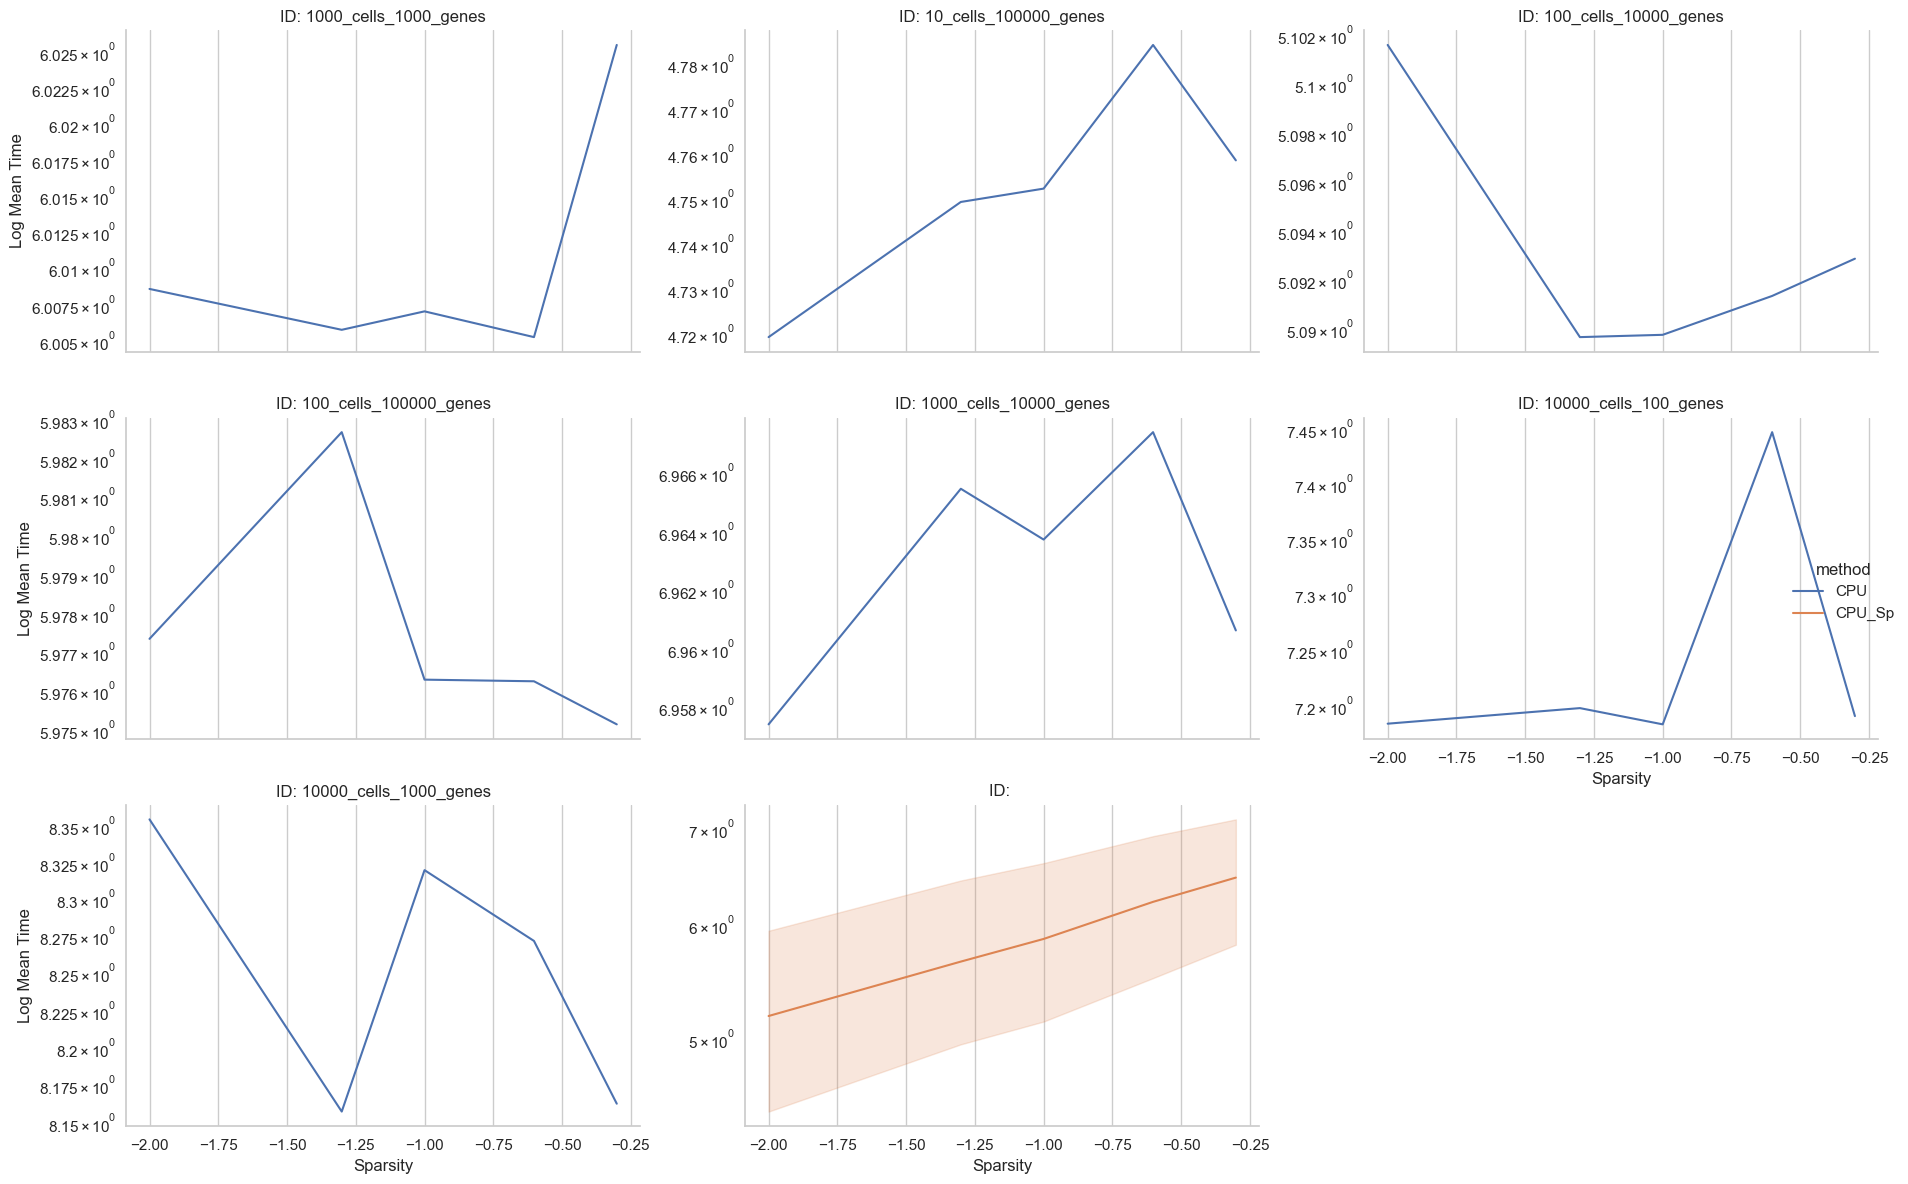

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = matrix
data['invSp'] = np.log10(1-data['sparsity'])
#data['accTime'] = data['']

# Create a relplot using Seaborn
g = sns.relplot(
    data=data,
    x="invSp",
    y="logMeanTime",
    hue="method",
    col="id",
    kind="line",
    facet_kws={"sharey": False},  # Allow different y-axes ranges for each subplot
    height=4,  # Height of each subplot
    aspect=1.5,  # Aspect ratio of each subplot
    col_wrap=3
)

# Customize plot aesthetics
g.set_axis_labels("Sparsity", "Log Mean Time")
g.set_titles("ID: {col_name}")
g.set(yscale="log")  # Set y-axis to logarithmic scale

# Show the plot
plt.tight_layout()
plt.show()

In [147]:
matrix_sp = df[df['metric']=="pearson"]
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']
matrix = matrix_2.append(matrix_sp)


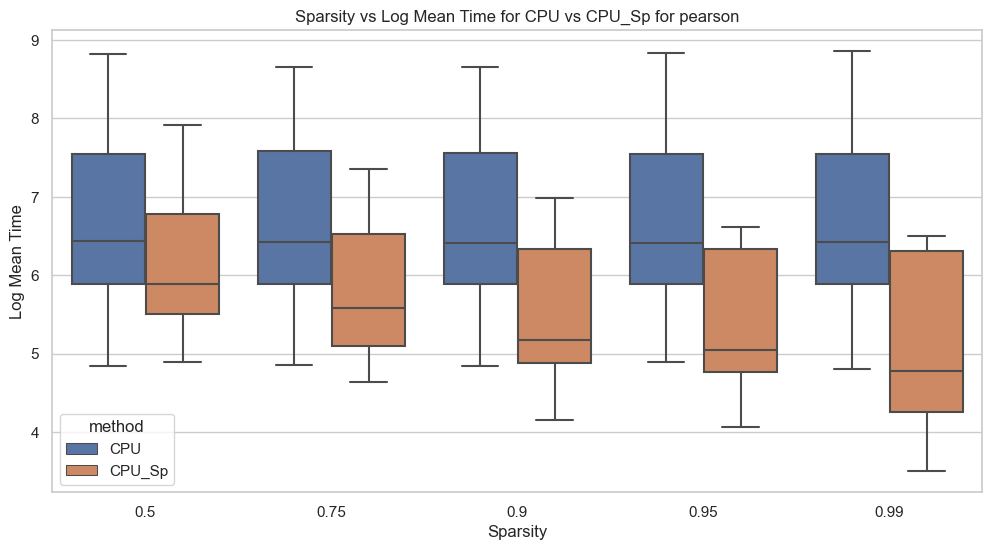

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = matrix

# Filter data for CPU and CPU_Sp methods
filtered_data = data[data['method'].isin(['CPU', 'CPU_Sp'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)

# Add title and labels
plt.title('Sparsity vs Log Mean Time for CPU vs CPU_Sp for pearson')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


In [149]:
matrix_sp = df[df['metric']=="pearson"]
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']
matrix = matrix_2.append(matrix_sp)
matrix

DataFile  method   size   metric  \
32  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0  pearson   
35  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0  pearson   
38  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0  pearson   
41  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0  pearson   
44  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0  pearson   
..                                                ...     ...    ...      ...   
73  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0  pearson   
75  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0  pearson   
79  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0  pearson   
84  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0  pearson   
87  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0  pearson   

           mean            sd        val_1        val_2        val_3  \
32   2702028.65  3.195064e+05   3691310.50   3039853.75   3647316.00   
35   2626039.50  7.452660e+04   2762594.25   2618154.50   2624524.75   
38   2583277.50  8.013915e+04   2788513.25   2532512.00   2585982.50   
41   2684489.18  4.337816e+05   4728872.00   2576250.25   2515585.00   
44   2612739.13  1.521875e+05   3202575.50   2578283.25   2670545.00   
..          ...           ...          ...          ...          ...   
73    151821.66  9.421821e+04    522441.25    201163.00    197792.25   
75   2964472.92  3.959562e+05   3514572.25   3142321.75   2906194.50   
79   9682608.53  9.990549e+05   8409367.75   8354638.25   7911415.50   
84  22438770.41  4.928453e+06  22057124.50  22986960.25  29813681.25   
87  81571493.53  4.065022e+06  84406140.00  83625455.25  79689248.00   

          val_4  ...  sparsity  logWX  logWY                     id  \
32   2574368.25  ...      0.50    3.0    3.0  1000_cells_1000_genes   
35   2768850.50  ...      0.75    3.0    3.0  1000_cells_1000_genes   
38   2543845.50  ...      0.95    3.0    3.0  1000_cells_1000_genes   
41   2687737.00  ...      0.99    3.0    3.0  1000_cells_1000_genes   
44   2510112.25  ...      0.90    3.0    3.0  1000_cells_1000_genes   
..          ...  ...       ...    ...    ...                    ...   
73    206646.75  ...      0.90    5.0    2.0                          
75   2881593.00  ...      0.50    4.0    3.0                          
79  10168358.00  ...      0.90    3.0    4.0                          
84  28125218.25  ...      0.75    3.0    4.0                          
87  81265781.00  ...      0.50    3.0    4.0                          

    logMeanTime  logMinTime  logMaxTime       |W|          Method  invSparsity  
32     6.431690    6.396197    6.567181   1000000     pearson_CPU          NaN  
35     6.419301    6.397404    6.442300   1000000     pearson_CPU          NaN  
38     6.412171    6.396764    6.445373   1000000     pearson_CPU          NaN  
41     6.428862    6.400531    6.674758   1000000     pearson_CPU          NaN  
44     6.417096    6.382724    6.505499   1000000     pearson_CPU          NaN  
..          ...         ...         ...       ...             ...          ...  
73     5.181334    4.955828    5.718037  10000000  pearson_CPU_Sp     -1.00000  
75     6.471947    6.416651    6.627418  10000000  pearson_CPU_Sp     -0.30103  
79     6.985992    6.898254    7.061840  10000000  pearson_CPU_Sp     -1.00000  
84     7.350999    7.255209    7.521845  10000000  pearson_CPU_Sp     -0.60206  
87     7.911538    7.878566    7.966874  10000000  pearson_CPU_Sp     -0.30103  

[80 rows x 45 columns]

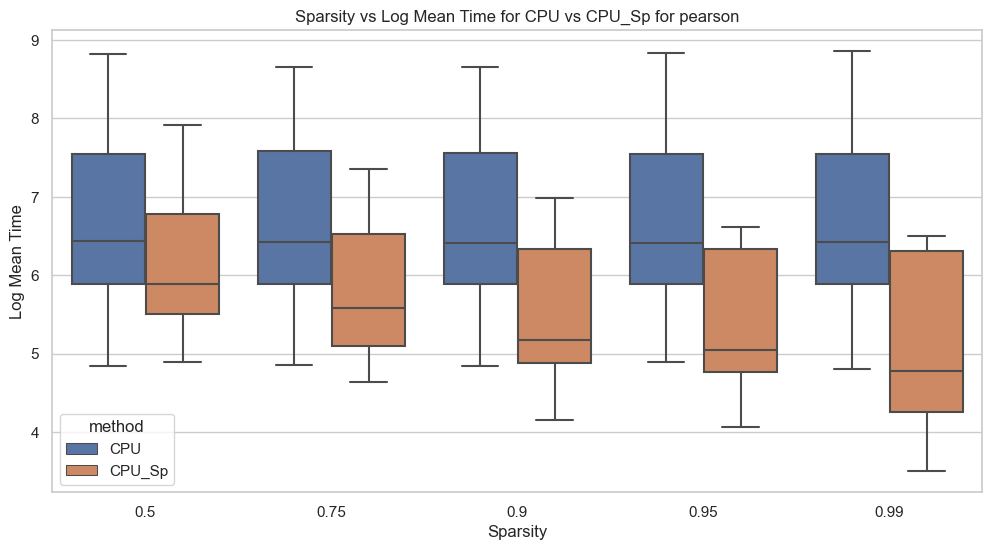

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = matrix

# Filter data for CPU and CPU_Sp methods
filtered_data = data[data['method'].isin(['CPU', 'CPU_Sp'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)

# Add title and labels
plt.title('Sparsity vs Log Mean Time for CPU vs CPU_Sp for pearson')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


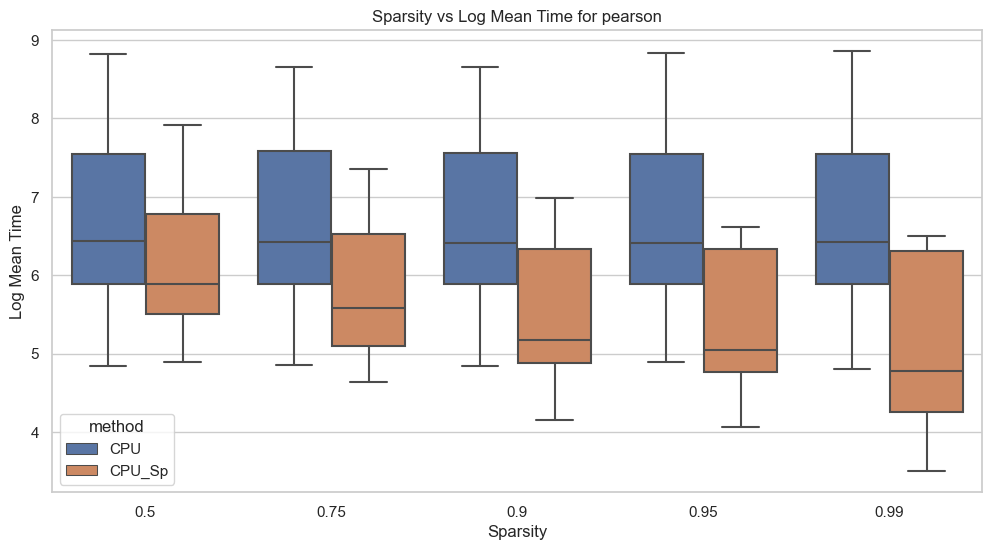

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = matrix

# Filter data for CPU and CPU_Sp methods
filtered_data = data[data['method'].isin(['CPU', 'CPU_Sp'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=data)

# Add title and labels
plt.title('Sparsity vs Log Mean Time for pearson')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


In [152]:
matrix_sp = df[df['metric']=="kendall"]
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']
matrix = matrix_3.append(matrix_sp)
matrix

DataFile  method   size  \
30   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
33   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
36   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
39   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
42   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
85   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
86   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
87   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
88   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
89   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
165  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
166  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
167  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
174  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
177  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
290  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
291  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
292  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
293  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
294  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
90   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
91   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
92   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
93   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
94   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
95   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
96   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
97   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
98   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
99   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
100  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
101  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
102  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
103  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
104  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
110  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
111  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
112  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
113  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
114  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   

      metric          mean            sd         val_1         val_2  \
30   kendall  4.372717e+08  9.356218e+05  4.395836e+08  4.403153e+08   
33   kendall  3.593494e+08  1.335040e+06  3.645882e+08  3.589770e+08   
36   kendall  3.035095e+08  1.785344e+05  3.040420e+08  3.037051e+08   
39   kendall  2.946130e+08  2.149481e+05  2.949258e+08  2.949182e+08   
42   kendall  3.165952e+08  2.222591e+05  3.173956e+08  3.166672e+08   
85   kendall  2.734474e+08  2.944720e+06  2.732622e+08  2.752915e+08   
86   kendall  2.797883e+08  3.861705e+06  2.964164e+08  2.829414e+08   
87   kendall  3.085652e+08  3.417367e+06  3.145502e+08  3.201566e+08   
88   kendall  4.601962e+08  2.165143e+06  4.629244e+08  4.629231e+08   
89   kendall  8.128928e+08  4.336163e+06  8.114239e+08  8.119680e+08   
165  kendall  2.060990e+08  3.607331e+06  2.069148e+08  2.049479e+08   
166  kendall  2.197540e+08  2.015936e+06  2.204246e+08  2.183111e+08   
167  kendall  2.545653e+08  2.343522e+06  2.550329e+08  2.529419e+08   
174  kendall  4.604105e+08  4.705345e+06  4.

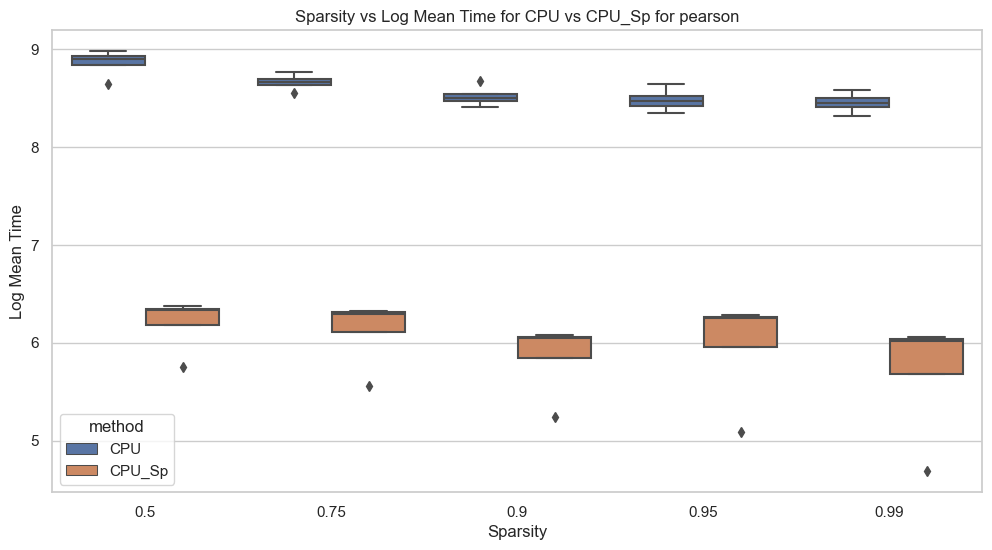

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = matrix

# Filter data for CPU and CPU_Sp methods
filtered_data = data[data['method'].isin(['CPU', 'CPU_Sp'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)

# Add title and labels
plt.title('Sparsity vs Log Mean Time for CPU vs CPU_Sp for pearson')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


In [154]:
data

DataFile  method   size  \
30   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
33   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
36   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
39   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
42   ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
85   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
86   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
87   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
88   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
89   ../../DistanceBenchmarking/GeneratedSparse/10_...     CPU  100.0   
165  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
166  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
167  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
174  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
177  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
290  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
291  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
292  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
293  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
294  ../../DistanceBenchmarking/GeneratedSparse/100...     CPU  100.0   
90   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
91   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
92   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
93   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
94   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
95   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
96   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
97   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
98   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
99   ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
100  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
101  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
102  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
103  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
104  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
110  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
111  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
112  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
113  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
114  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   

      metric          mean            sd         val_1         val_2  \
30   kendall  4.372717e+08  9.356218e+05  4.395836e+08  4.403153e+08   
33   kendall  3.593494e+08  1.335040e+06  3.645882e+08  3.589770e+08   
36   kendall  3.035095e+08  1.785344e+05  3.040420e+08  3.037051e+08   
39   kendall  2.946130e+08  2.149481e+05  2.949258e+08  2.949182e+08   
42   kendall  3.165952e+08  2.222591e+05  3.173956e+08  3.166672e+08   
85   kendall  2.734474e+08  2.944720e+06  2.732622e+08  2.752915e+08   
86   kendall  2.797883e+08  3.861705e+06  2.964164e+08  2.829414e+08   
87   kendall  3.085652e+08  3.417367e+06  3.145502e+08  3.201566e+08   
88   kendall  4.601962e+08  2.165143e+06  4.629244e+08  4.629231e+08   
89   kendall  8.128928e+08  4.336163e+06  8.114239e+08  8.119680e+08   
165  kendall  2.060990e+08  3.607331e+06  2.069148e+08  2.049479e+08   
166  kendall  2.197540e+08  2.015936e+06  2.204246e+08  2.183111e+08   
167  kendall  2.545653e+08  2.343522e+06  2.550329e+08  2.529419e+08   
174  kendall  4.604105e+08  4.705345e+06  4.

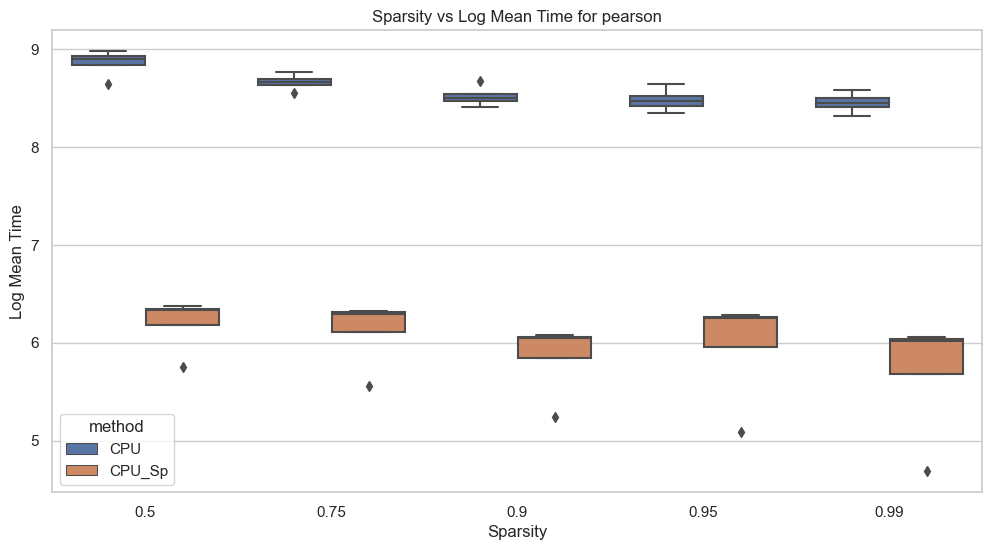

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = matrix

# Filter data for CPU and CPU_Sp methods
filtered_data = data[data['method'].isin(['CPU', 'CPU_Sp'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=data)

# Add title and labels
plt.title('Sparsity vs Log Mean Time for pearson')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


In [156]:
df_full

DataFile  method   size  \
0    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
1    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
2    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
3    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
4    ../../DistanceBenchmarking/GeneratedSparse/100...     GPU  100.0   
..                                                 ...     ...    ...   
110  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
111  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
112  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
113  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   
114  ../../DistanceBenchmarking/GeneratedSparse/100...  CPU_Sp  100.0   

        metric        mean            sd        val_1       val_2       val_3  \
0      kendall  7621184.88  1.448788e+06  14548260.25  7146084.75  7471550.50   
1    euclidean  1107940.69  1.498401e+06   8300060.25   843103.75   808935.75   
2      pearson  4610701.78  1.501138e+06  11815922.75  4346568.50  4312413.50   
3      kendall  6784364.62  1.524808e+06  14094113.75  6623969.50  6440376.25   
4    euclidean  1120901.48  1.510871e+06   8371800.00   856583.25   811199.00   
..         ...         ...           ...          ...         ...         ...   
110    kendall    48658.71  4.714571e+04     43797.50    62226.25   125355.00   
111    kendall   120971.24  7.306413e+04    338462.25   170273.50   168756.00   
112    kendall   173755.70  9.921557e+04    508599.50   333263.25    99434.50   
113    kendall   358822.79  8.237999e+04    716335.50   465950.25   359270.75   
114    kendall   560306.96  1.333262e+05   1137354.75   717632.25   573993.25   

          val_4  ...  sparsity  logWX  logWY                     id  \
0    7480540.50  ...      0.50    3.0    3.0  1000_cells_1000_genes   
1     812474.00  ...      0.50    3.0    3.0  1000_cells_1000_genes   
2    4337095.00  ...      0.50    3.0    3.0  1000_cells_1000_genes   
3    6510551.00  ...      0.75    3.0    3.0  1000_cells_1000_genes   
4     817529.00  ...      0.75    3.0    3.0  1000_cells_1000_genes   
..          ...  ...       ...    ...    ...                    ...   
110    23468.50  ...      0.99    4.0    3.0                          
111    52821.75  ...      0.95    4.0    3.0                          
112   221112.00  ...      0.90    4.0    3.0                          
113   364167.50  ...      0.75    4.0    3.0                          
114   563003.50  ...      0.50    4.0    3.0                          

     logMeanTime  logMinTime  logMaxTime       |W|          Method  \
0       6.882022    6.852996    7.162811   1000000     kendall_GPU   
1       6.044517    5.900791    6.919081   1000000   euclidean_GPU   
2       6.663767    6.633393    7.072468   1000000     pearson_GPU   
3       6.831509    6.802929    7.149038   1000000     kendall_GPU   
4       6.049567    5.843307    6.922819   1000000   euclidean_GPU   
..           ...         ...         ...       ...             ...   
110     4.687161    4.177580    5.127028  10000000  kendall_CPU_Sp   
111     5.082682    4.695545    5.529510  10000000  kendall_CPU_Sp   
112     5.239939    4.973211    5.706376  10000000  kendall_CPU_Sp   
113     5.554880    5.362326    5.855116  10000000  kendall_CPU_Sp   
114     5.748426    5.633498    6.055896  10000000  kendall_CPU_Sp   

     invSparsity  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
110     -2.00000  
111     -1.30103  
112     -1.00000  
113     -0.60206  
114     -0.30103  

[683 rows x 45 columns]

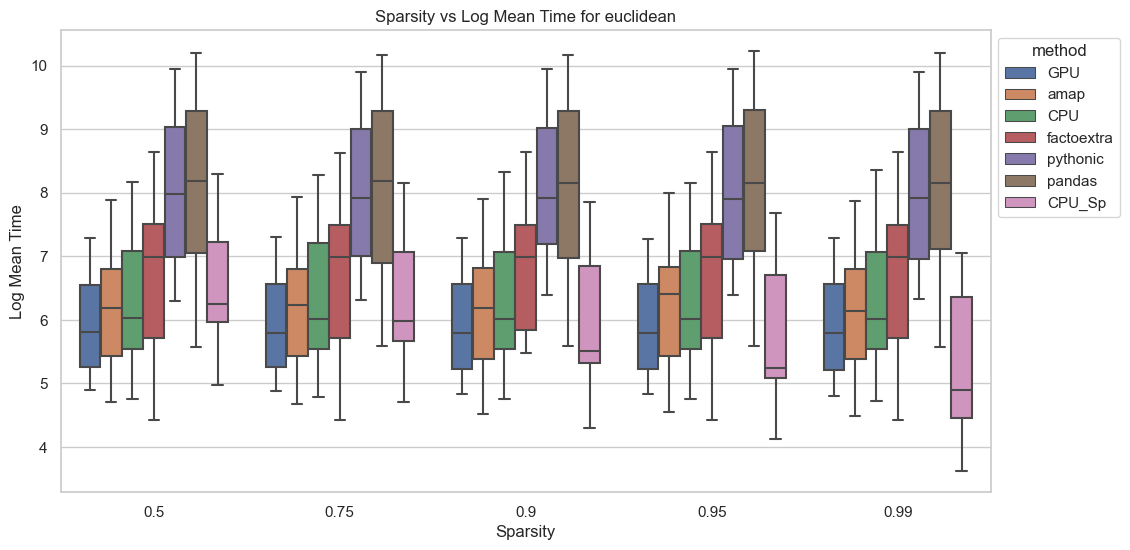

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_full

# Filter data for CPU and CPU_Sp methods

filtered_data = data[data['metric'].isin(['euclidean'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Add title and labels
plt.title('Sparsity vs Log Mean Time for euclidean')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


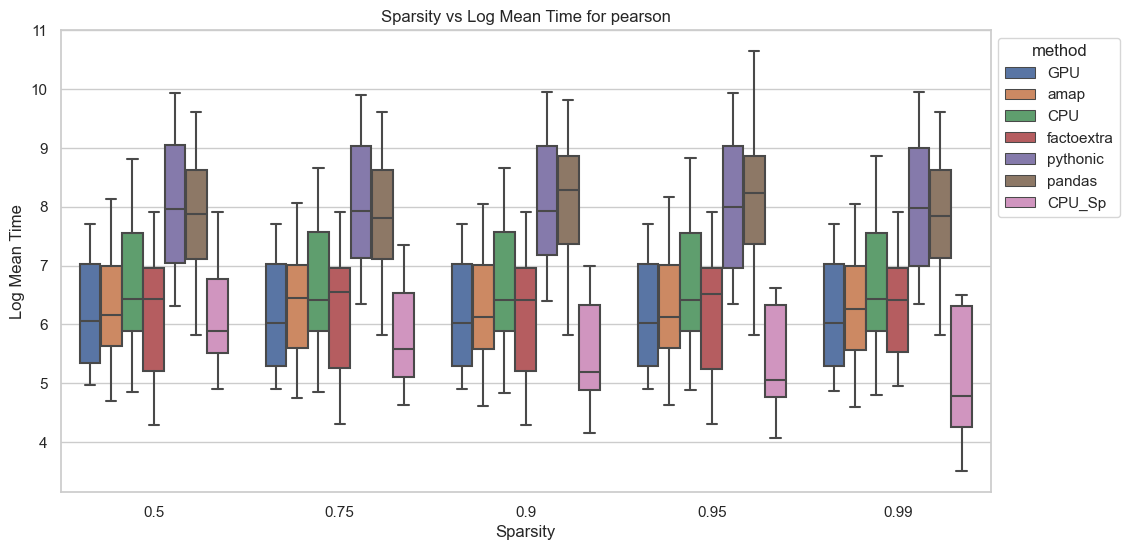

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_full

# Filter data fosns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))r CPU and CPU_Sp methods

filtered_data = data[data['metric'].isin(['pearson'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Add title and labels
plt.title('Sparsity vs Log Mean Time for pearson')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


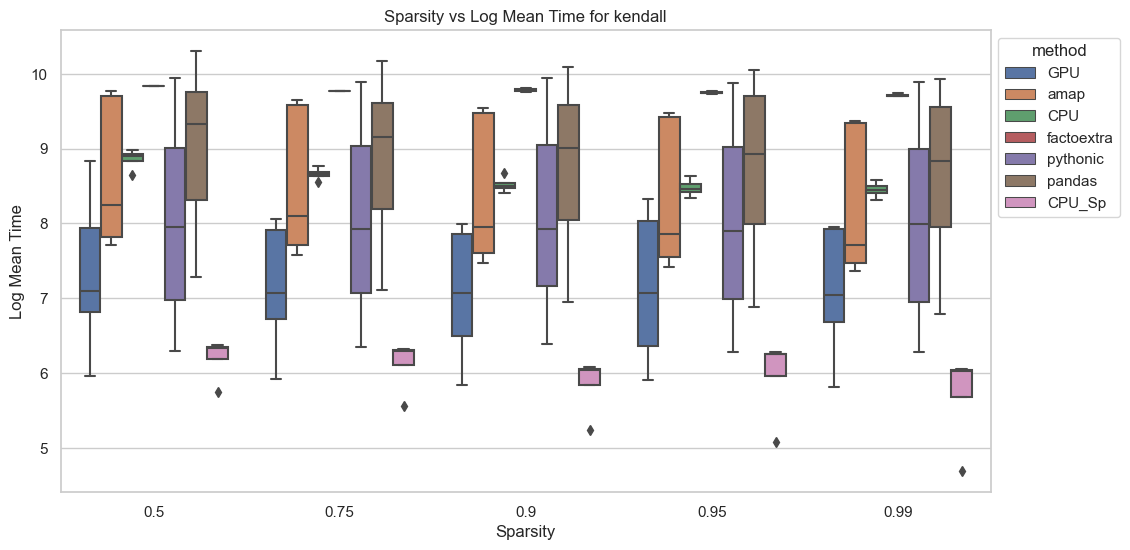

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_full

# Filter data for CPU and CPU_Sp methods

filtered_data = data[data['metric'].isin(['kendall'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Add title and labels
plt.title('Sparsity vs Log Mean Time for kendall')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


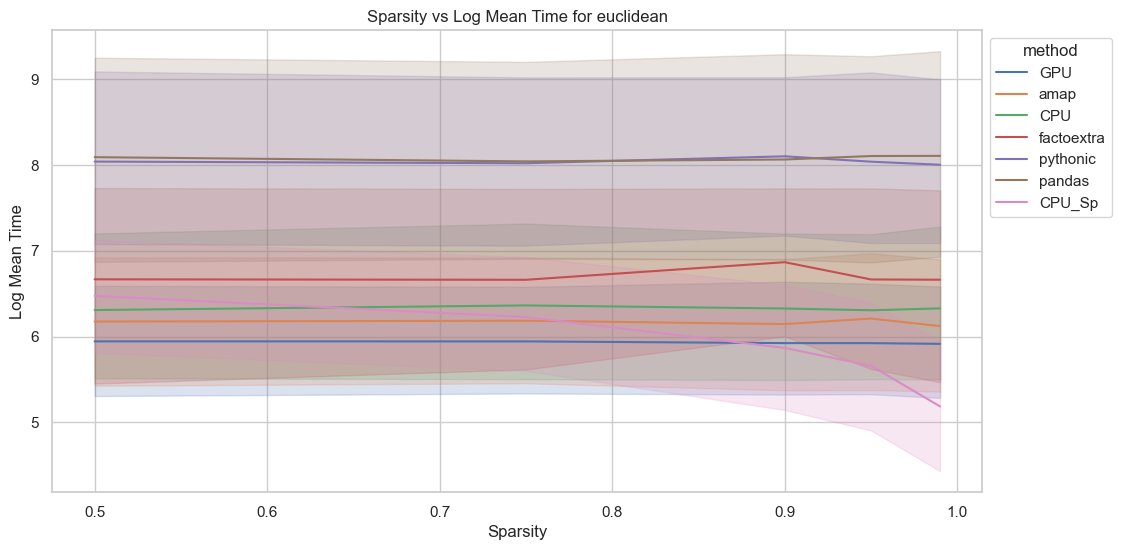

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_full

# Filter data for CPU and CPU_Sp methods

filtered_data = data[data['metric'].isin(['euclidean'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.lineplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Add title and labels
plt.title('Sparsity vs Log Mean Time for euclidean')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


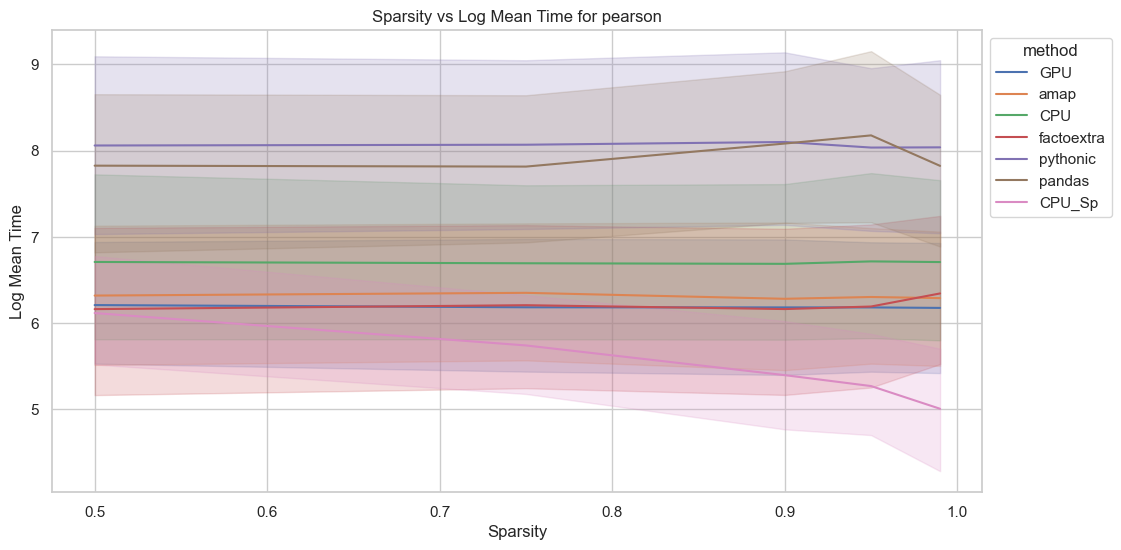

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_full

# Filter data for CPU and CPU_Sp methods

filtered_data = data[data['metric'].isin(['pearson'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.lineplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Add title and labels
plt.title('Sparsity vs Log Mean Time for pearson')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


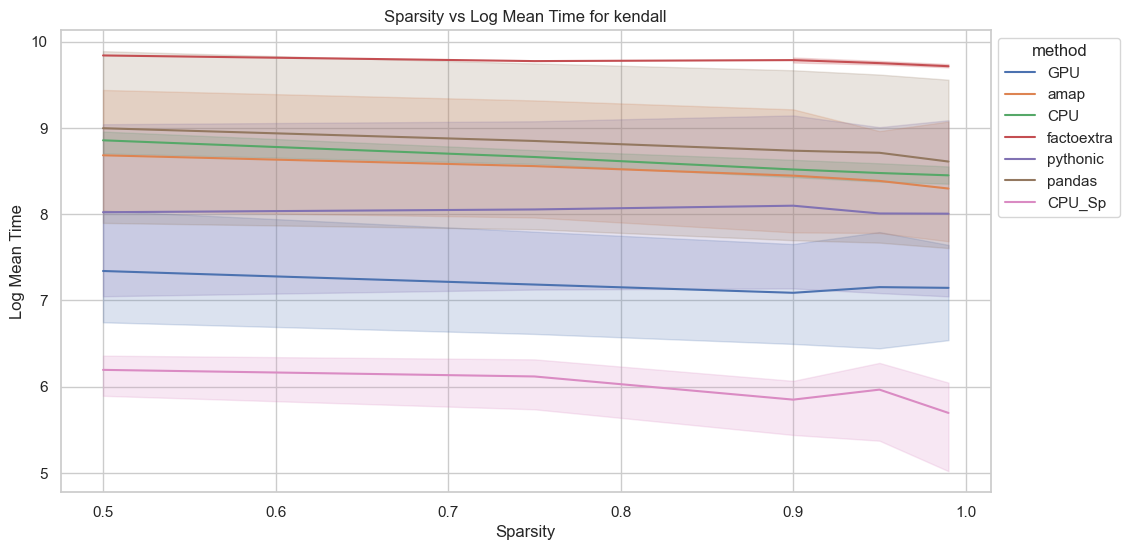

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_full

# Filter data for CPU and CPU_Sp methods

filtered_data = data[data['metric'].isin(['kendall'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.lineplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Add title and labels
plt.title('Sparsity vs Log Mean Time for kendall')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


# Real Datasets

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(REAL_BENCHMARKS)
# Sample data preparation
df

DataFile  method     metric  \
0        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap  euclidean   
1        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    pearson   
2        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    kendall   
3      ../../DistanceBenchmarking/Real/HLCA/Marrow.csv    amap  euclidean   
4       ../../DistanceBenchmarking/Real/HLCA/aorta.csv    amap    kendall   
..                                                 ...     ...        ...   
339  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp    pearson   
340  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp  euclidean   
341  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp  euclidean   
342  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp    pearson   
343  ../../DistanceBenchmarking/RealSparse/HLCA_aor...  CPU_Sp  euclidean   

            mean            sd        val_1        val_2        val_3  \
0    24998942.70  3.232651e+06  28894350.25  21359876.50  22712151.75   
1    26468861.08  5.457040e+06  23941645.25  18692943.25  19533291.50   
2    26669185.88  1.762192e+06  24912110.75  20575015.00  28347021.75   
3    24609721.73  2.982867e+06  24437832.00  18258887.50  24656041.00   
4    26035437.32  1.670125e+06  25810766.50  22206932.75  24661794.00   
..           ...           ...          ...          ...          ...   
339      4140.03  2.037252e+03     11704.50      3904.75      3580.25   
340      8680.42  2.103333e+03     16476.00      8518.75      8216.25   
341    315726.70  1.552411e+06   7767292.25      5511.50      4467.75   
342    308122.79  1.510800e+06   7559947.25      6339.75      5139.25   
343      7361.57  2.415540e+04     10648.50      2288.50      2161.50   

           val_4        val_5  ...  Unnamed: 49  Unnamed: 50  Unnamed: 51  \
0    22123638.75  23026159.75  ...          NaN          NaN          NaN   
1    23119165.00  20009992.50  ...          NaN          NaN          NaN   
2    27400907.00  26285953.00  ...          NaN          NaN          NaN   
3    25381963.75  19251446.25  ...          NaN          NaN          NaN   
4    27624690.25  25326055.50  ...          NaN          NaN          NaN   
..           ...          ...  ...          ...          ...          ...   
339      3674.00      9188.75  ...          NaN          NaN          NaN   
340      8136.75     13980.25  ...          NaN          NaN          NaN   
341      4294.25     14747.00  ...          NaN          NaN          NaN   
342      4999.50     19202.50  ...          NaN          NaN          NaN   
343      2167.25      2129.00  ...       1253.5       1223.5      1199.25   

     Unnamed: 52  Unnamed: 53  Unnamed: 54  Unnamed: 55  Unnamed: 56  \
0            NaN          NaN          NaN          NaN          NaN   
1            NaN          NaN          NaN          NaN          NaN   
2            NaN          NaN          NaN          NaN          NaN   
3            NaN          NaN          NaN          NaN          NaN   
4            NaN          NaN          NaN          NaN          NaN   
..           ...          ...          ...          ...          ...   
339          NaN          NaN          NaN          NaN          NaN   
340          NaN          NaN          NaN          NaN          NaN   
341          NaN          NaN          NaN          NaN          NaN   
342          NaN          NaN          NaN          NaN          NaN   
343      1208.25      1260.75       1211.0      1694.25      1538.75   

     Unnamed: 57  Unnamed: 58  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
..           ...          ...  
339          NaN          NaN  
340          NaN          NaN  
341          NaN          NaN  
342          NaN          NaN  
343       1508.0      1504.75  

[344 rows x 59 columns]

In [194]:
weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-1].split('.')
    l= i.split("/")[-2]
    w1.append(k[0])
    w2.append(str(l+'_'+k[0]))

df['type'] = w1
df['ID'] = w2
df['ID2'] = df['ID']+'_'+df['metric']
# df['logWX'] = np.log10(df['wX'])
# df['logWY'] = np.log10(df['wY'])
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
# df['logMinTime']=np.log10(df['minTime'])
# df['logMaxTime']=np.log10(df['maxTime'])
# df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
#df['IDtag'] = unID
#print(df[df['DataFile']])
df

DataFile  method     metric  \
0        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap  euclidean   
1        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    pearson   
2        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    kendall   
3      ../../DistanceBenchmarking/Real/HLCA/Marrow.csv    amap  euclidean   
4       ../../DistanceBenchmarking/Real/HLCA/aorta.csv    amap    kendall   
..                                                 ...     ...        ...   
339  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp    pearson   
340  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp  euclidean   
341  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp  euclidean   
342  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp    pearson   
343  ../../DistanceBenchmarking/RealSparse/HLCA_aor...  CPU_Sp  euclidean   

            mean            sd        val_1        val_2        val_3  \
0    24998942.70  3.232651e+06  28894350.25  21359876.50  22712151.75   
1    26468861.08  5.457040e+06  23941645.25  18692943.25  19533291.50   
2    26669185.88  1.762192e+06  24912110.75  20575015.00  28347021.75   
3    24609721.73  2.982867e+06  24437832.00  18258887.50  24656041.00   
4    26035437.32  1.670125e+06  25810766.50  22206932.75  24661794.00   
..           ...           ...          ...          ...          ...   
339      4140.03  2.037252e+03     11704.50      3904.75      3580.25   
340      8680.42  2.103333e+03     16476.00      8518.75      8216.25   
341    315726.70  1.552411e+06   7767292.25      5511.50      4467.75   
342    308122.79  1.510800e+06   7559947.25      6339.75      5139.25   
343      7361.57  2.415540e+04     10648.50      2288.50      2161.50   

           val_4        val_5  ...  Unnamed: 54  Unnamed: 55  Unnamed: 56  \
0    22123638.75  23026159.75  ...          NaN          NaN          NaN   
1    23119165.00  20009992.50  ...          NaN          NaN          NaN   
2    27400907.00  26285953.00  ...          NaN          NaN          NaN   
3    25381963.75  19251446.25  ...          NaN          NaN          NaN   
4    27624690.25  25326055.50  ...          NaN          NaN          NaN   
..           ...          ...  ...          ...          ...          ...   
339      3674.00      9188.75  ...          NaN          NaN          NaN   
340      8136.75     13980.25  ...          NaN          NaN          NaN   
341      4294.25     14747.00  ...          NaN          NaN          NaN   
342      4999.50     19202.50  ...          NaN          NaN          NaN   
343      2167.25      2129.00  ...       1211.0      1694.25      1538.75   

     Unnamed: 57  Unnamed: 58    type                 ID  \
0            NaN          NaN    lung          HLCA_lung   
1            NaN          NaN    lung          HLCA_lung   
2            NaN          NaN    lung          HLCA_lung   
3            NaN          NaN  Marrow        HLCA_Marrow   
4            NaN          NaN   aorta         HLCA_aorta   
..           ...          ...     ...                ...   
339          NaN          NaN  matrix   HLCA_lung_matrix   
340          NaN          NaN  matrix   HLCA_lung_matrix   
341          NaN          NaN  matrix   HLCA_lung_matrix   
342          NaN          NaN  matrix   HLCA_lung_matrix   
343       1508.0      1504.75  matrix  HLCA_aorta_matrix   

                             ID2  logMeanTime            Method  
0            HLCA_lung_euclidean     7.397922    euclidean_amap  
1              HLCA_lung_pearson     7.422735      pearson_amap  
2              HLCA_lung_kendall     7.426010      kendall_amap  
3          HLCA_Marrow_euclidean     7.391107    euclidean_amap  
4             HLCA_aorta_kendall     7.415565      kendall_amap  
..                           ...          ...               ...  
339     HLCA_lung_matrix_pearson     3.617003    pearson_CPU_Sp  
340   HLCA_lung_matrix_euclidean     3.938541  euclidean_CPU_Sp  
341 

In [195]:
df['mean'] = np.where(df['method'].isin(['pandas','pythonic']), df['mean']*24000000,df['mean'])


In [196]:
df

DataFile  method     metric  \
0        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap  euclidean   
1        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    pearson   
2        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    kendall   
3      ../../DistanceBenchmarking/Real/HLCA/Marrow.csv    amap  euclidean   
4       ../../DistanceBenchmarking/Real/HLCA/aorta.csv    amap    kendall   
..                                                 ...     ...        ...   
339  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp    pearson   
340  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp  euclidean   
341  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp  euclidean   
342  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp    pearson   
343  ../../DistanceBenchmarking/RealSparse/HLCA_aor...  CPU_Sp  euclidean   

            mean            sd        val_1        val_2        val_3  \
0    24998942.70  3.232651e+06  28894350.25  21359876.50  22712151.75   
1    26468861.08  5.457040e+06  23941645.25  18692943.25  19533291.50   
2    26669185.88  1.762192e+06  24912110.75  20575015.00  28347021.75   
3    24609721.73  2.982867e+06  24437832.00  18258887.50  24656041.00   
4    26035437.32  1.670125e+06  25810766.50  22206932.75  24661794.00   
..           ...           ...          ...          ...          ...   
339      4140.03  2.037252e+03     11704.50      3904.75      3580.25   
340      8680.42  2.103333e+03     16476.00      8518.75      8216.25   
341    315726.70  1.552411e+06   7767292.25      5511.50      4467.75   
342    308122.79  1.510800e+06   7559947.25      6339.75      5139.25   
343      7361.57  2.415540e+04     10648.50      2288.50      2161.50   

           val_4        val_5  ...  Unnamed: 54  Unnamed: 55  Unnamed: 56  \
0    22123638.75  23026159.75  ...          NaN          NaN          NaN   
1    23119165.00  20009992.50  ...          NaN          NaN          NaN   
2    27400907.00  26285953.00  ...          NaN          NaN          NaN   
3    25381963.75  19251446.25  ...          NaN          NaN          NaN   
4    27624690.25  25326055.50  ...          NaN          NaN          NaN   
..           ...          ...  ...          ...          ...          ...   
339      3674.00      9188.75  ...          NaN          NaN          NaN   
340      8136.75     13980.25  ...          NaN          NaN          NaN   
341      4294.25     14747.00  ...          NaN          NaN          NaN   
342      4999.50     19202.50  ...          NaN          NaN          NaN   
343      2167.25      2129.00  ...       1211.0      1694.25      1538.75   

     Unnamed: 57  Unnamed: 58    type                 ID  \
0            NaN          NaN    lung          HLCA_lung   
1            NaN          NaN    lung          HLCA_lung   
2            NaN          NaN    lung          HLCA_lung   
3            NaN          NaN  Marrow        HLCA_Marrow   
4            NaN          NaN   aorta         HLCA_aorta   
..           ...          ...     ...                ...   
339          NaN          NaN  matrix   HLCA_lung_matrix   
340          NaN          NaN  matrix   HLCA_lung_matrix   
341          NaN          NaN  matrix   HLCA_lung_matrix   
342          NaN          NaN  matrix   HLCA_lung_matrix   
343       1508.0      1504.75  matrix  HLCA_aorta_matrix   

                             ID2  logMeanTime            Method  
0            HLCA_lung_euclidean     7.397922    euclidean_amap  
1              HLCA_lung_pearson     7.422735      pearson_amap  
2              HLCA_lung_kendall     7.426010      kendall_amap  
3          HLCA_Marrow_euclidean     7.391107    euclidean_amap  
4             HLCA_aorta_kendall     7.415565      kendall_amap  
..                           ...          ...               ...  
339     HLCA_lung_matrix_pearson     3.617003    pearson_CPU_Sp  
340   HLCA_lung_matrix_euclidean     3.938541  euclidean_CPU_Sp  
341 

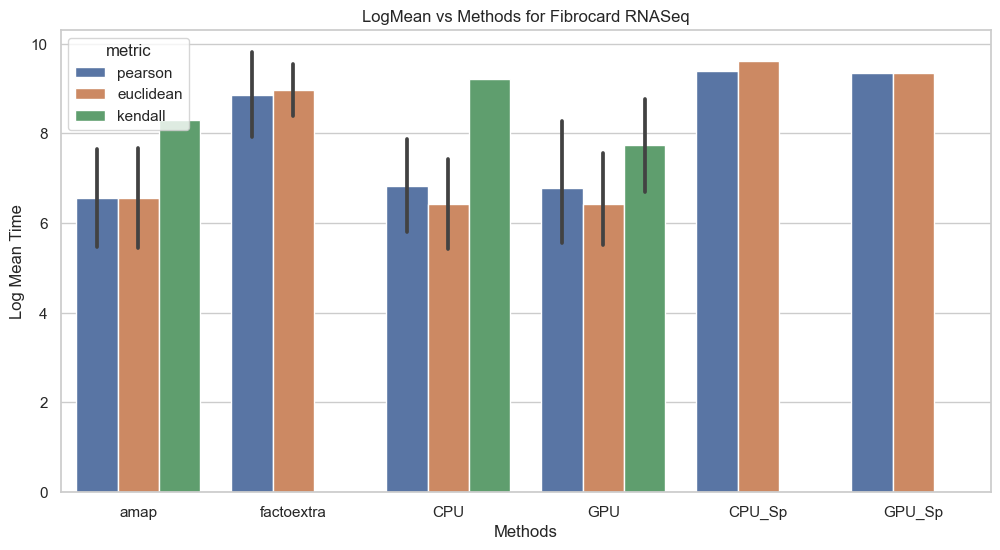

In [197]:
filtered_data = df[df['type'].isin(['snRNA_Heart_counts_matrix'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.barplot(x='method', y='logMeanTime', hue='metric', data=filtered_data)

# Add title and labels
plt.title('LogMean vs Methods for Fibrocard RNASeq')
plt.xlabel('Methods')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()

In [198]:
df_grouped = df.groupby(['method'])
acc = df_grouped.get_group(("GPU"))
v1 =  df_grouped.get_group(("CPU"))
v1.head()
v1["Ratio"] = acc['mean']/v1['mean']
print(acc['mean']*v1['mean'])
d3 = pd.DataFrame
for dat in acc.index:
    for ind in df.index:
        if acc["ID2"][dat] == df['ID2'][ind]:
            print(df['DataFile'][ind],df['method'][ind],df['metric'][ind],acc['mean'][dat]/df['mean'][ind])
        
#v1.head()
# df_grouped['Mean(GPU)'] = df_grouped['GPU'].mean()
#df_grouped['Mean(Method)'] = df_grouped['method'].mean()

121   NaN
122   NaN
123   NaN
124   NaN
125   NaN
       ..
237   NaN
238   NaN
239   NaN
240   NaN
241   NaN
Name: mean, Length: 121, dtype: float64
../../DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt amap kendall 14.420652121656902
../../DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt CPU kendall 18.246643910995903
../../DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt CPU kendall 18.246643910995903
../../DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt GPU kendall 1.0
DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt pandas kendall 0.013718051835162679
DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt pythonic kendall 0.0063642160593381505
../../DistanceBenchmarking/Real/Chen/GSE87544_Merged_17samples_14437cells_count.txt amap kendall 0.4543942751922273
../../DistanceBenchmarking/Real/Chen/GSE87544_Merged_17samples_14437cells_count.txt GPU

d:\ai-ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [199]:
df_real_acc = pd.read_csv('Acceleration_real_datasets.csv')
df_real_acc

DataFile    method     metric  \
0    ../../DistanceBenchmarking/Real/Camp/GSE75140_...      amap    kendall   
1    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
2    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
3    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       GPU    kendall   
4    DistanceBenchmarking/Real/Camp/GSE75140_hOrg.f...    pandas    kendall   
..                                                 ...       ...        ...   
321  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic    kendall   
322  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...      amap  euclidean   
323  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...       GPU  euclidean   
324  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic  euclidean   
325  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...    pandas  euclidean   

     acceleration  
0       14.420652  
1       18.246644  
2       18.246644  
3        1.000000  
4        0.013718  
..            ...  
321      0.000886  
322      1.625943  
323      1.000000  
324      0.001106  
325      0.000630  

[326 rows x 4 columns]

In [200]:
weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df_real_acc['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df_real_acc['DataFile']:
    k=i.split('/')[-1].split('.')
    l= i.split("/")[-2]
    w1.append(k[0])
    w2.append(str(l+'_'+k[0]))

df_real_acc['type'] = w1
df_real_acc['ID'] = w2

# df_real_acc['logWX'] = np.log10(df_real_acc['wX'])
# df_real_acc['logWY'] = np.log10(df_real_acc['wY'])
# df_real_acc['weight'] = weight
# #df_real_acc['minTime'] = df_real_acc[['val_1':'val_25']].min(axis=1)
# df_real_acc['logW'] = np.log10(df_real_acc['weight'])
df_real_acc['logAcceleration'] = np.log10(df_real_acc['acceleration'])
# df_real_acc['logMinTime']=np.log10(df_real_acc['minTime'])
# df_real_acc['logMaxTime']=np.log10(df_real_acc['maxTime'])
# df_real_acc['|W|'] = df_real_acc['wX']*df_real_acc['wY']
df_real_acc['Method'] = df_real_acc['metric']+'_'+df_real_acc['method']
#df_real_acc['IDtag'] = unID
#print(df_real_acc[df_real_acc['DataFile']])
df_real_acc

DataFile    method     metric  \
0    ../../DistanceBenchmarking/Real/Camp/GSE75140_...      amap    kendall   
1    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
2    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
3    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       GPU    kendall   
4    DistanceBenchmarking/Real/Camp/GSE75140_hOrg.f...    pandas    kendall   
..                                                 ...       ...        ...   
321  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic    kendall   
322  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...      amap  euclidean   
323  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...       GPU  euclidean   
324  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic  euclidean   
325  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...    pandas  euclidean   

     acceleration                  type                         ID  \
0       14.420652         GSE75140_hOrg         Camp_GSE75140_hOrg   
1       18.246644         GSE75140_hOrg         Camp_GSE75140_hOrg   
2       18.246644         GSE75140_hOrg         Camp_GSE75140_hOrg   
3        1.000000         GSE75140_hOrg         Camp_GSE75140_hOrg   
4        0.013718         GSE75140_hOrg         Camp_GSE75140_hOrg   
..            ...                   ...                        ...   
321      0.000886  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
322      1.625943  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
323      1.000000  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
324      0.001106  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
325      0.000630  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   

     logAcceleration              Method  
0           1.158985        kendall_amap  
1           1.261183         kendall_CPU  
2           1.261183         kendall_CPU  
3           0.000000         kendall_GPU  
4          -1.862708      kendall_pandas  
..               ...                 ...  
321        -3.052417    kendall_pythonic  
322         0.211105      euclidean_amap  
323         0.000000       euclidean_GPU  
324        -2.956204  euclidean_pythonic  
325        -3.200995    euclidean_pandas  

[326 rows x 8 columns]

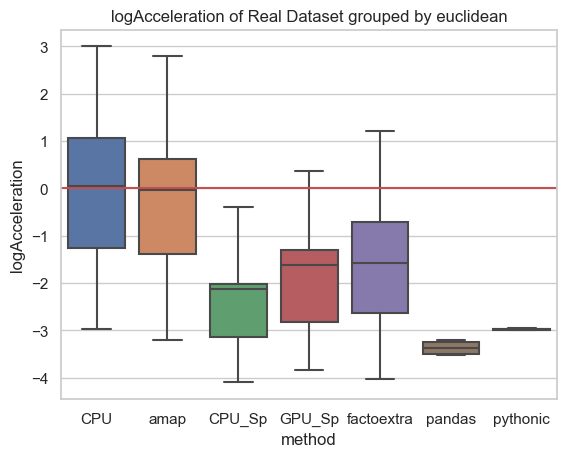

In [203]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["euclidean"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by euclidean')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

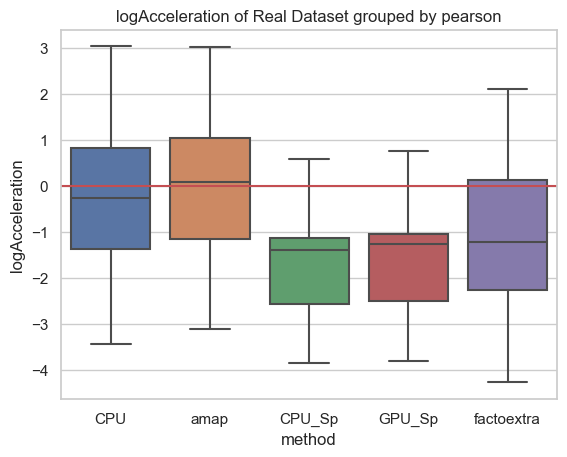

In [204]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by pearson')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

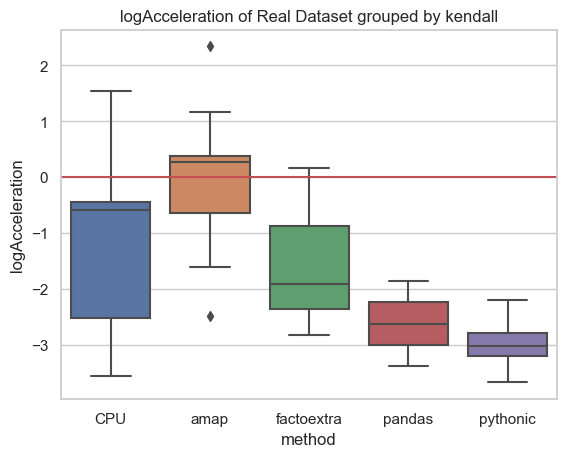

In [205]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["kendall"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by kendall')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH}boxplot_bench_generated_euc_on_WY.png',dpi=200)

#### Build the plots for the subsets only that run faster.